Archivo: N1.jpg


C:\Users\Daphne\AppData\Local\Temp\ipykernel_24212\3136962559.py:51: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  diferencia = np.abs(mitad_izquierda.astype(np.int) - mitad_derecha_espejo.astype(np.int))


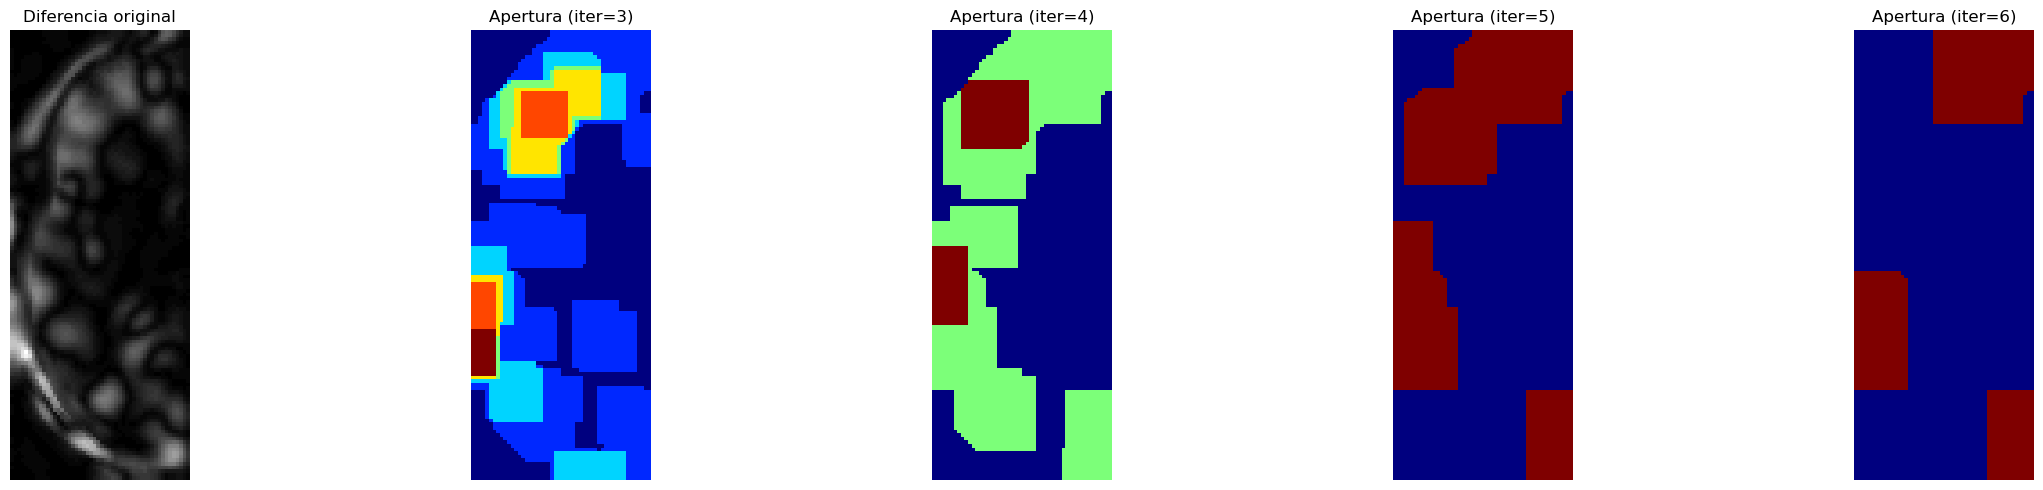

Archivo: N10.jpg


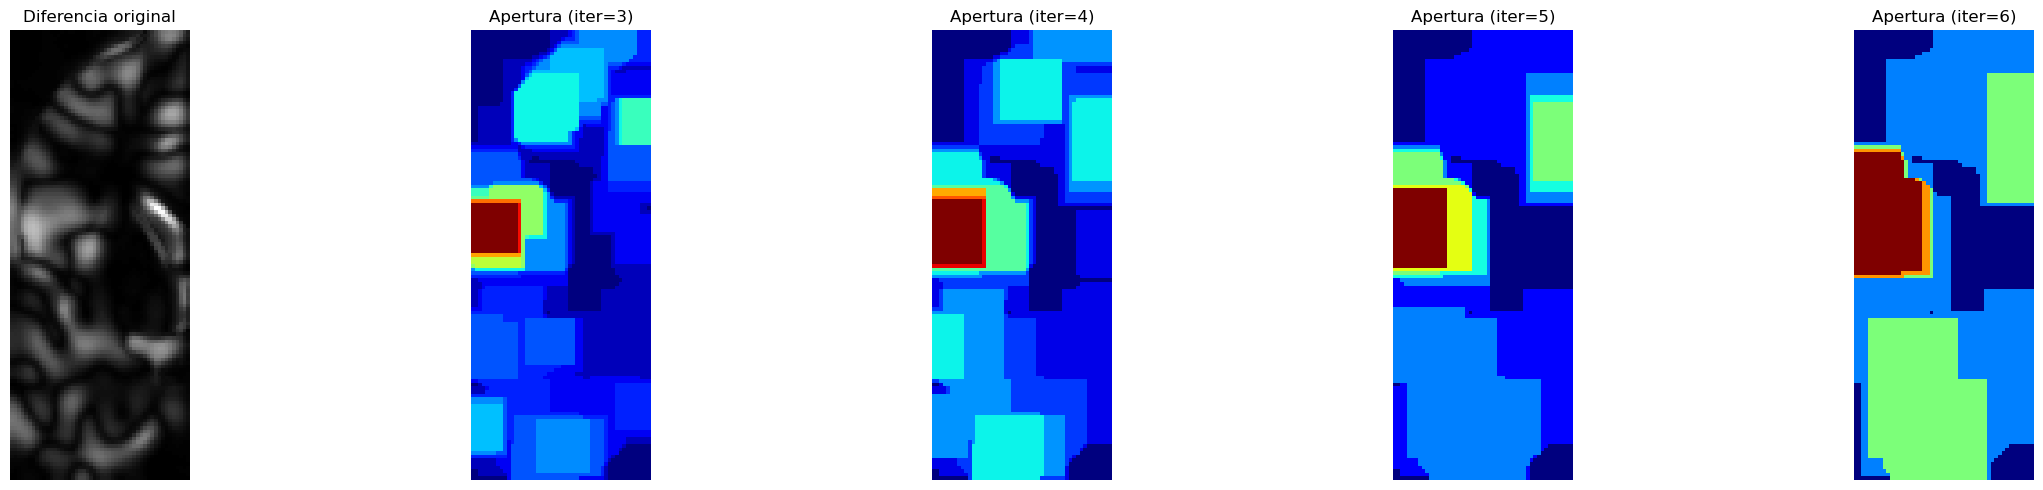

Archivo: N11.jpg


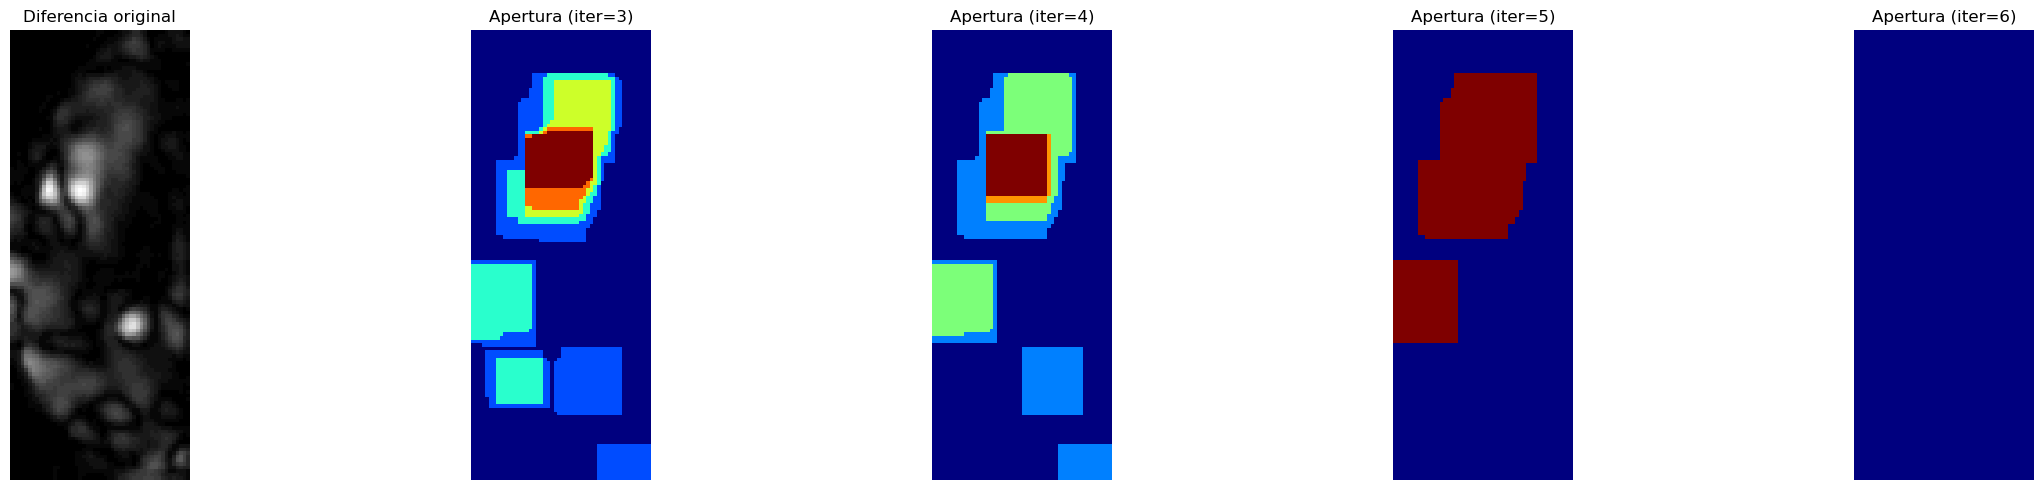

Archivo: N12.jpg


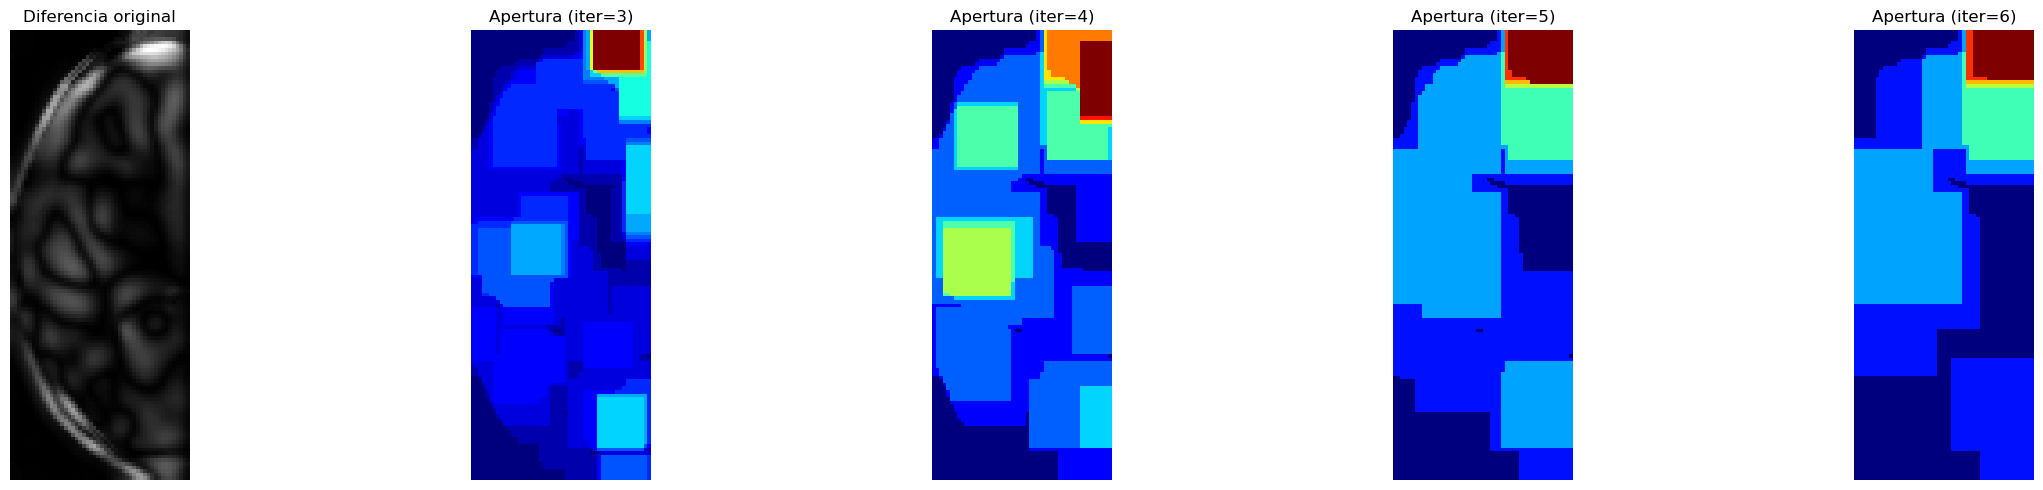

Archivo: N13.jpg


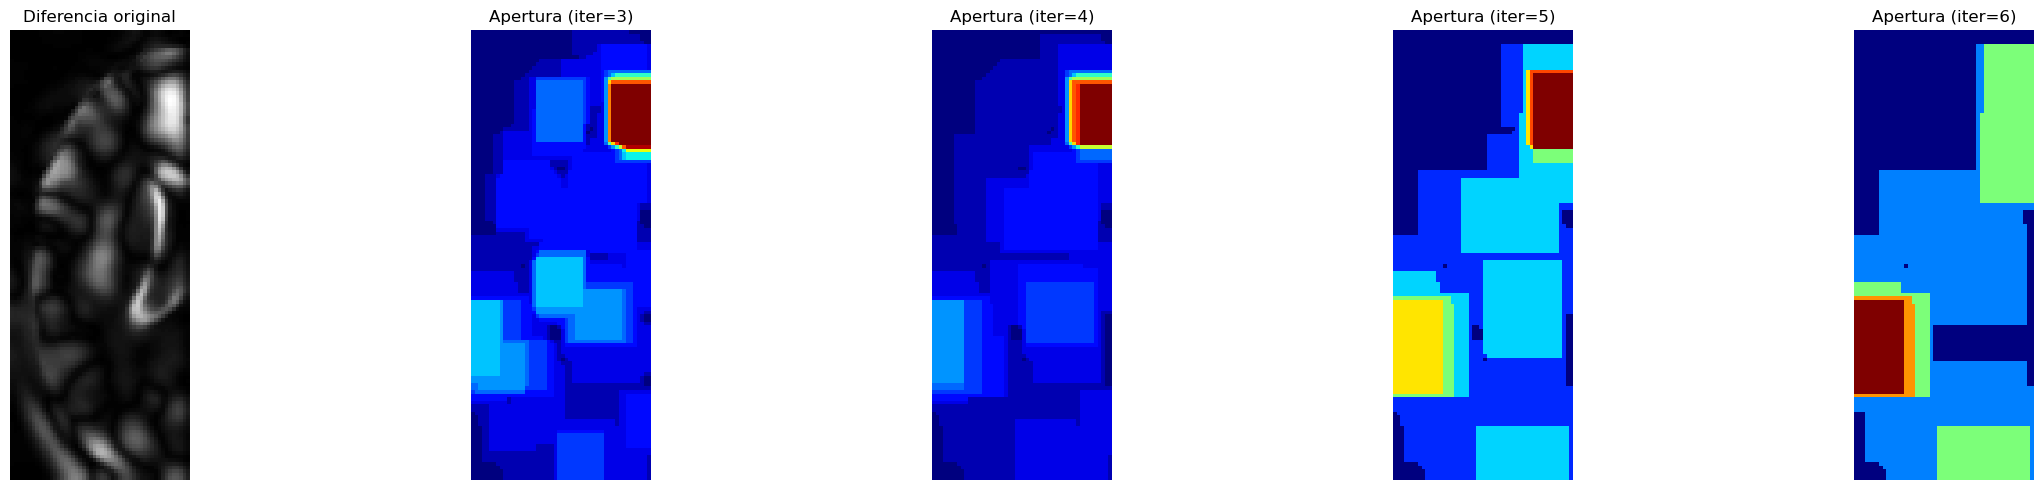

Archivo: N14.jpg


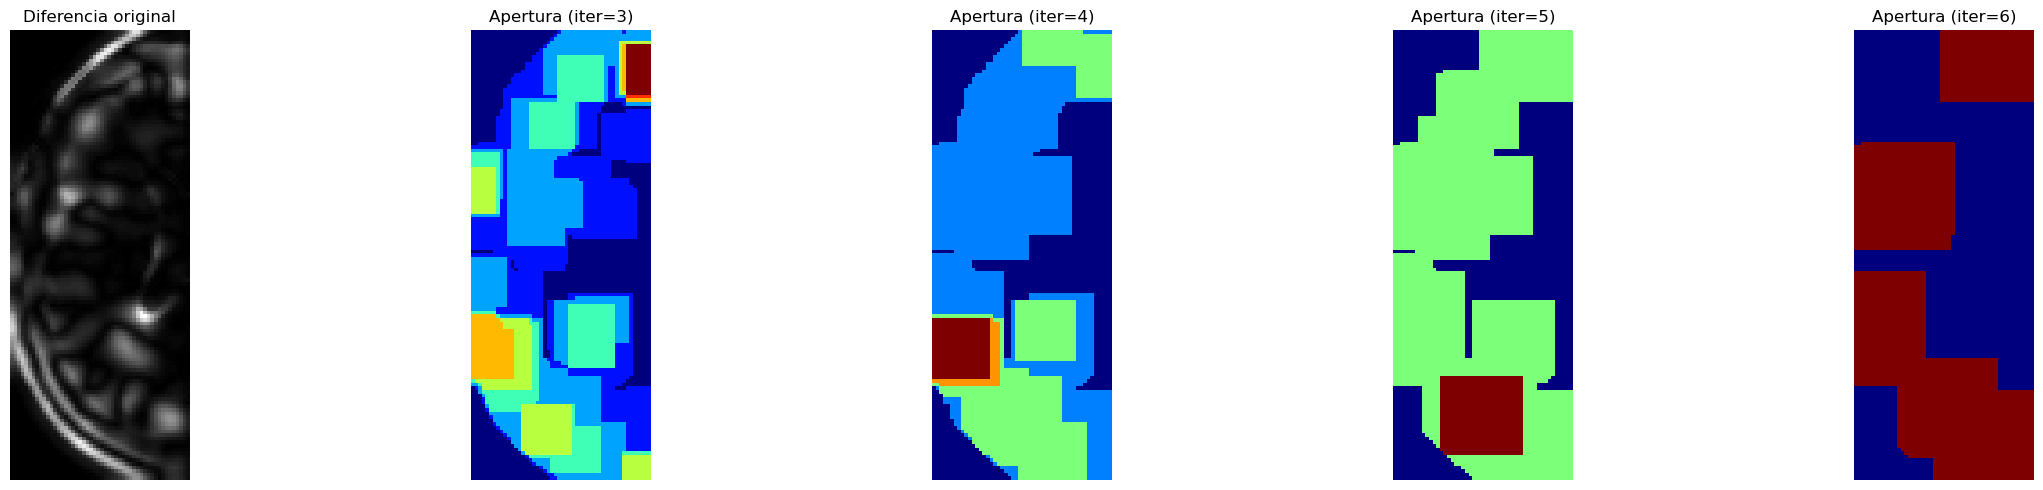

Archivo: N15.jpg


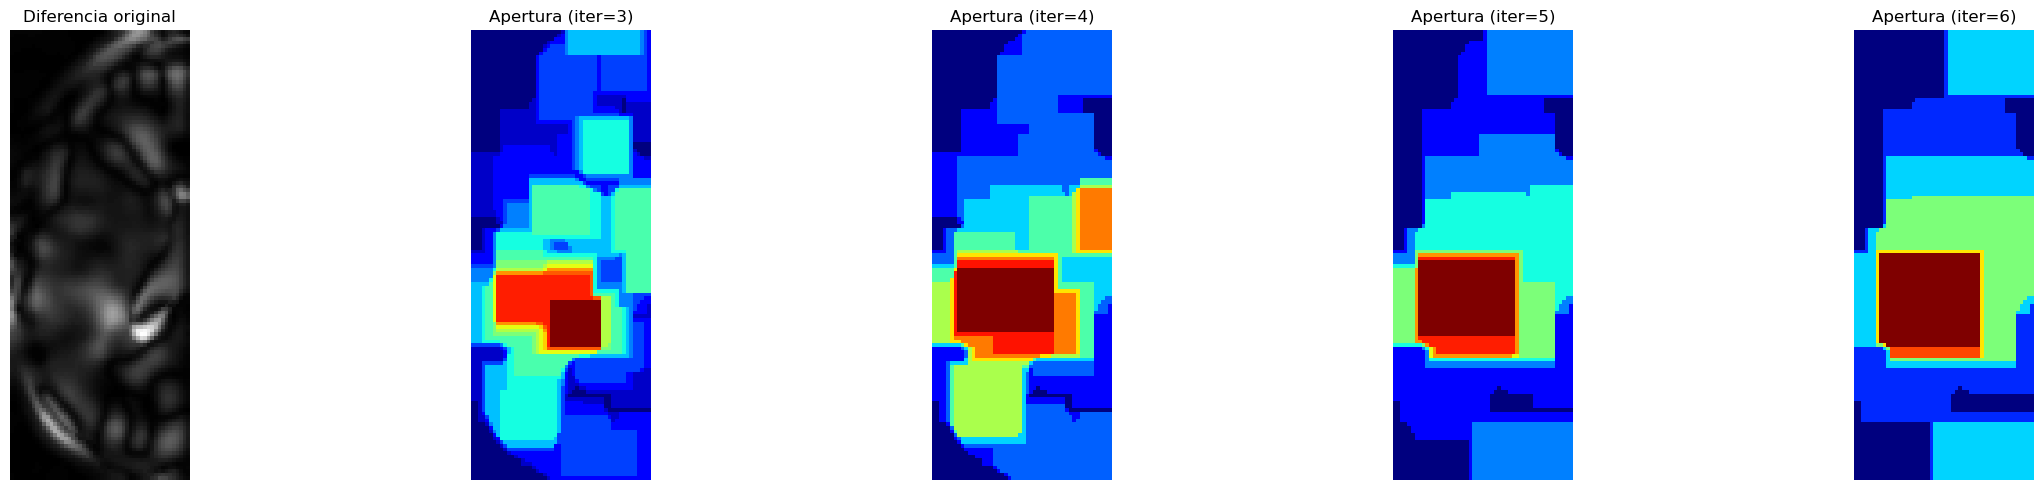

Archivo: N16.jpg


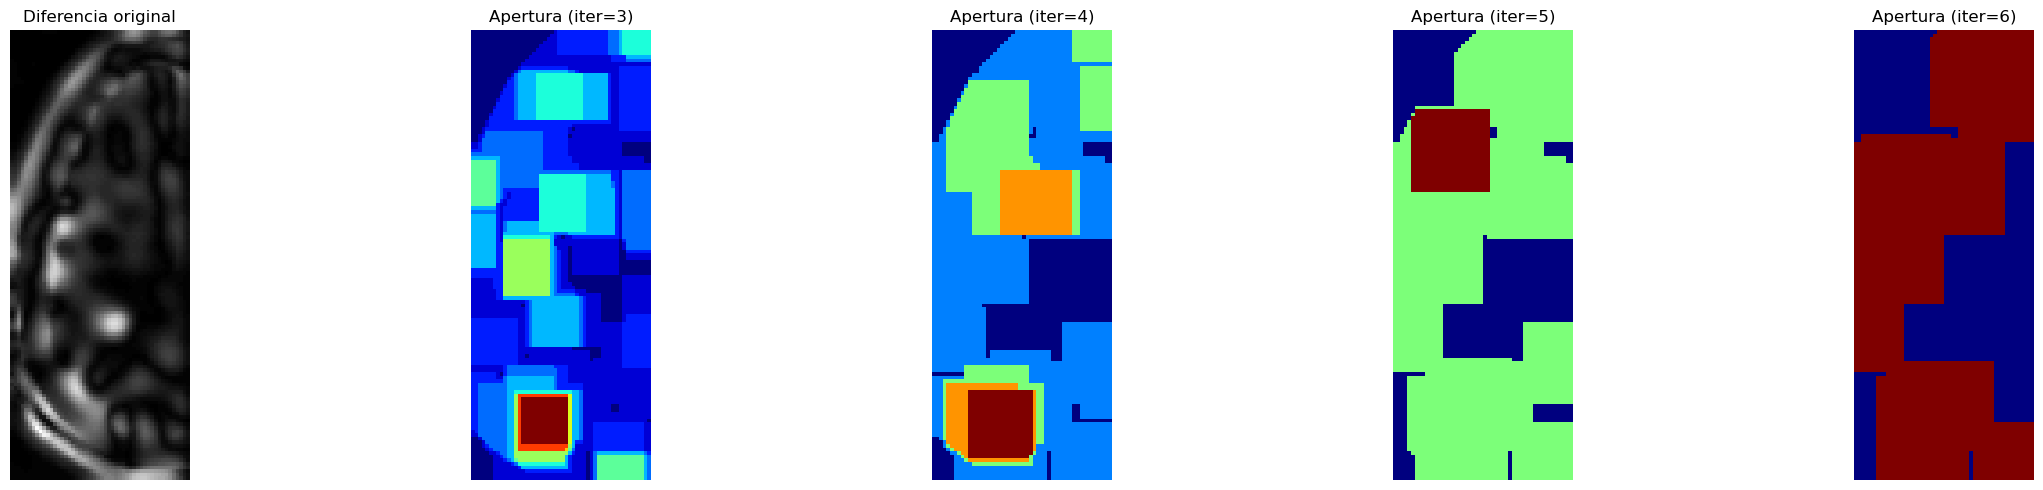

Archivo: N17.jpg


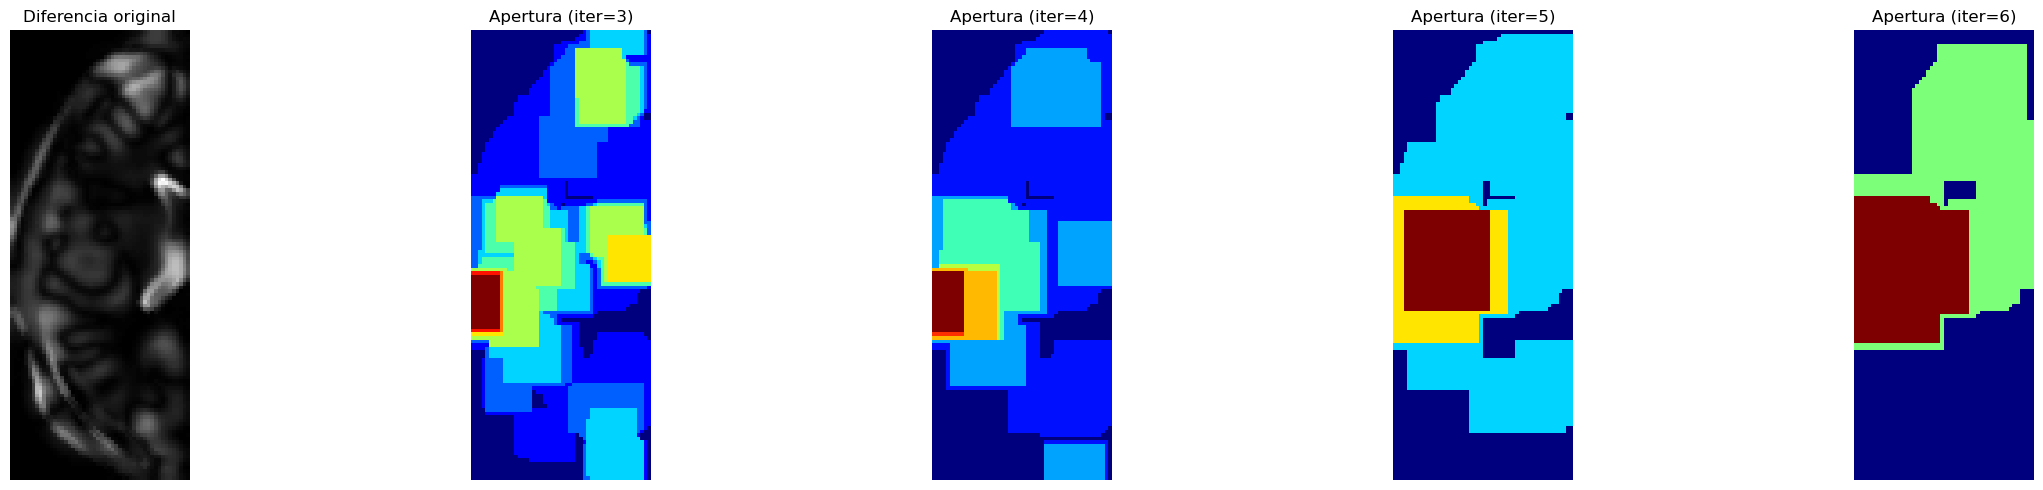

Archivo: N18.jpg


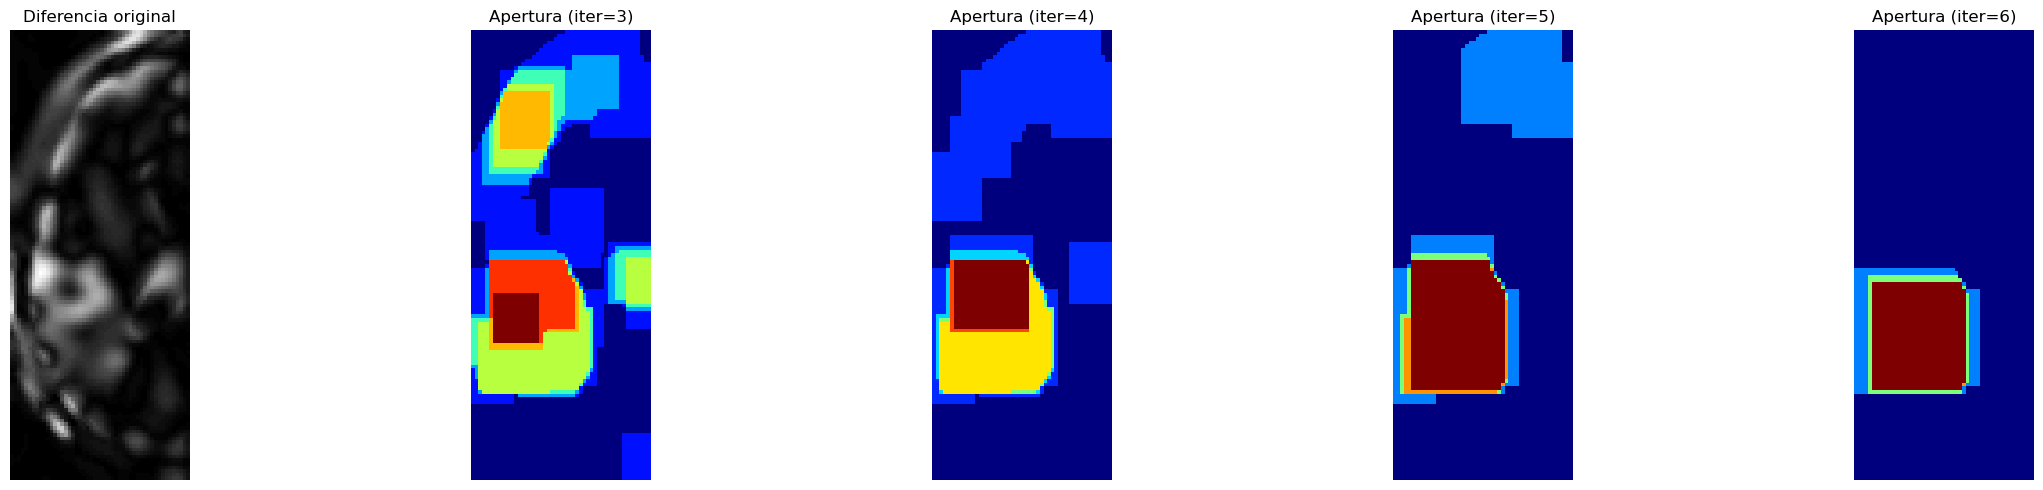

Archivo: N19.jpg


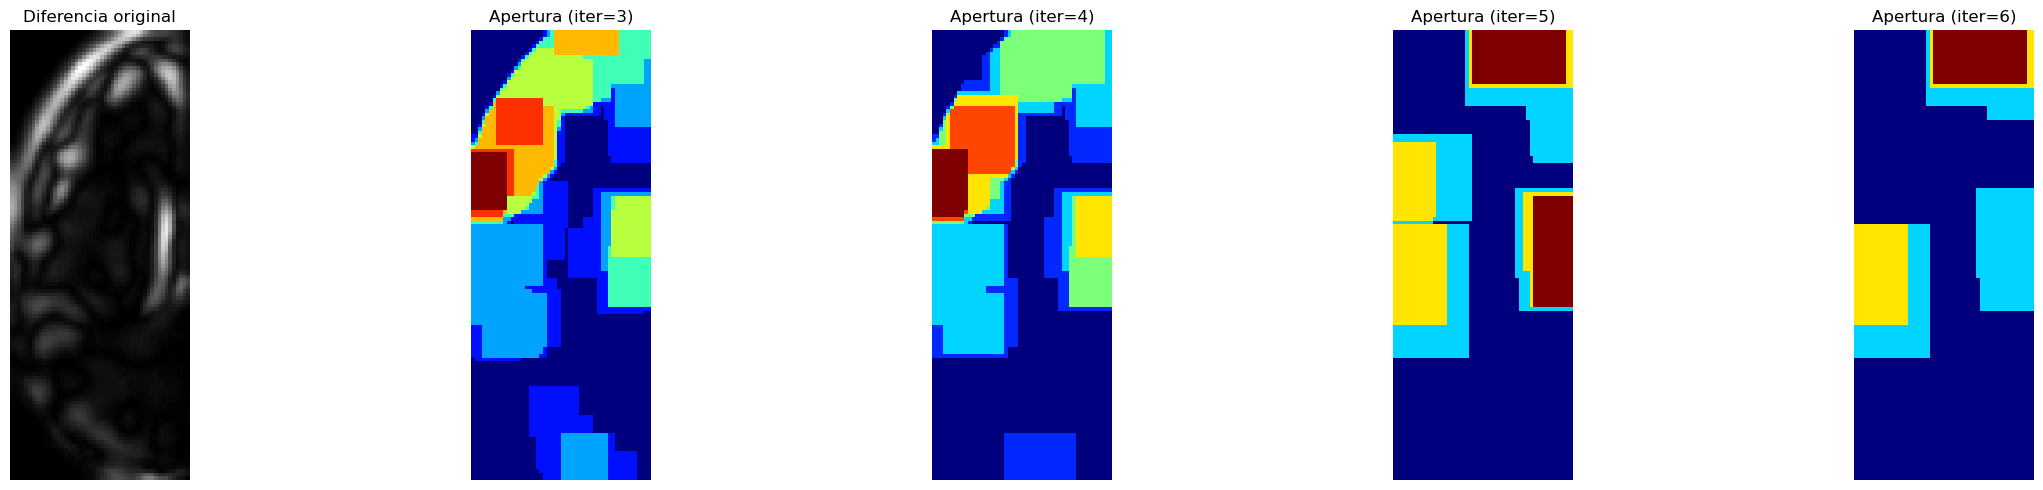

Archivo: N2.jpg


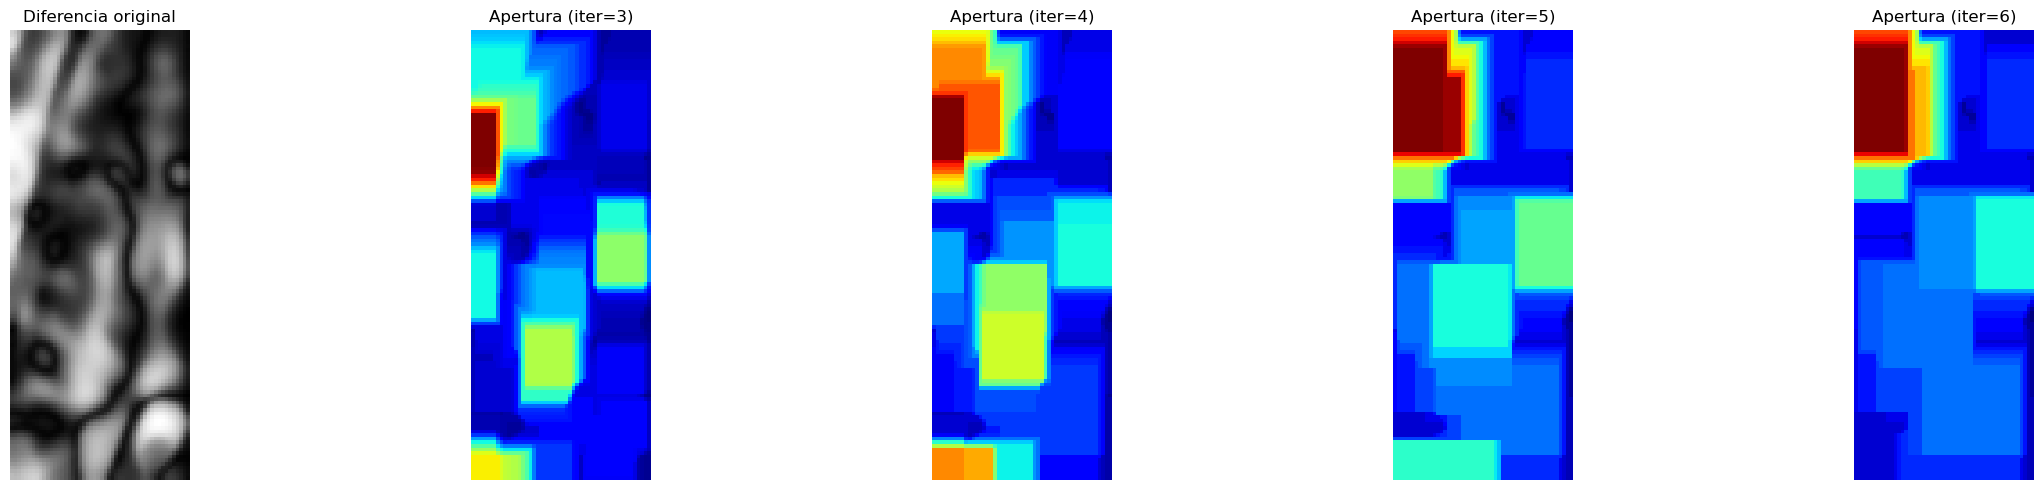

Archivo: N20.jpg


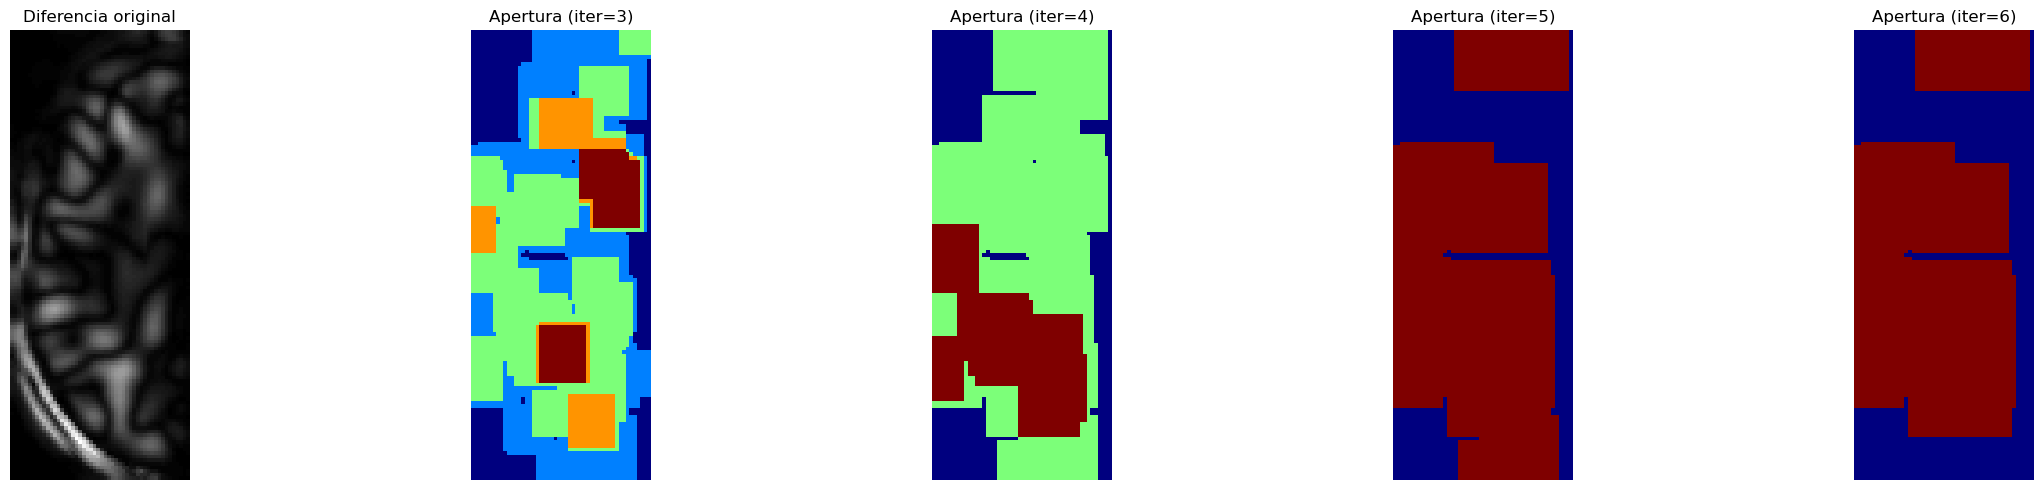

Archivo: N21.jpg


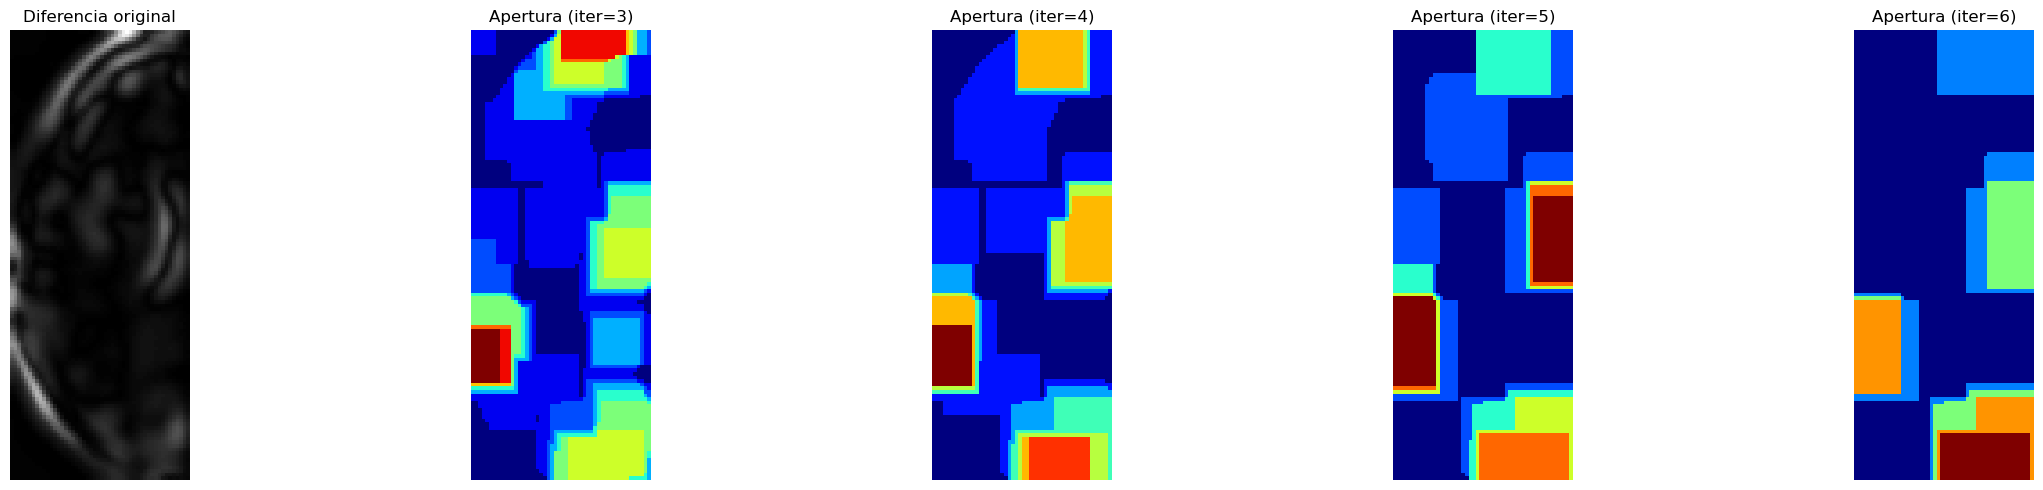

Archivo: N22.jpg


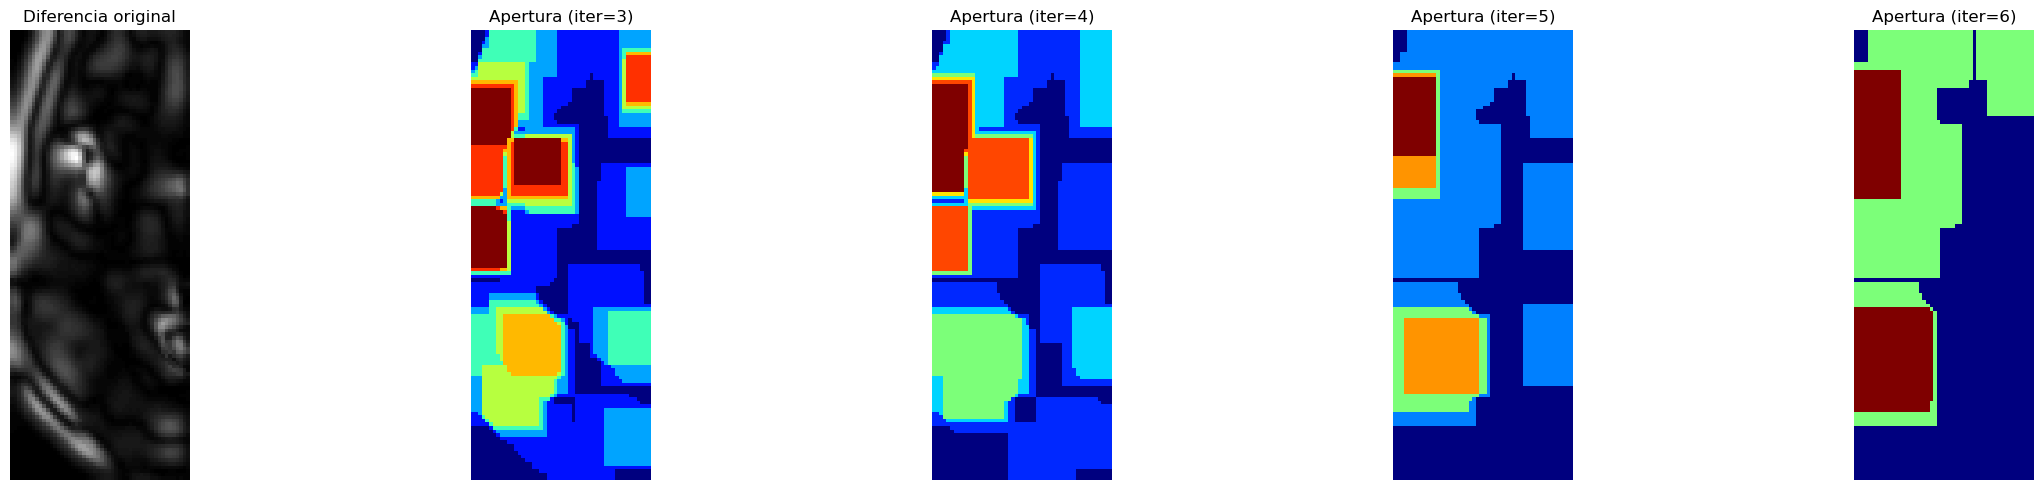

Archivo: N23.jpg


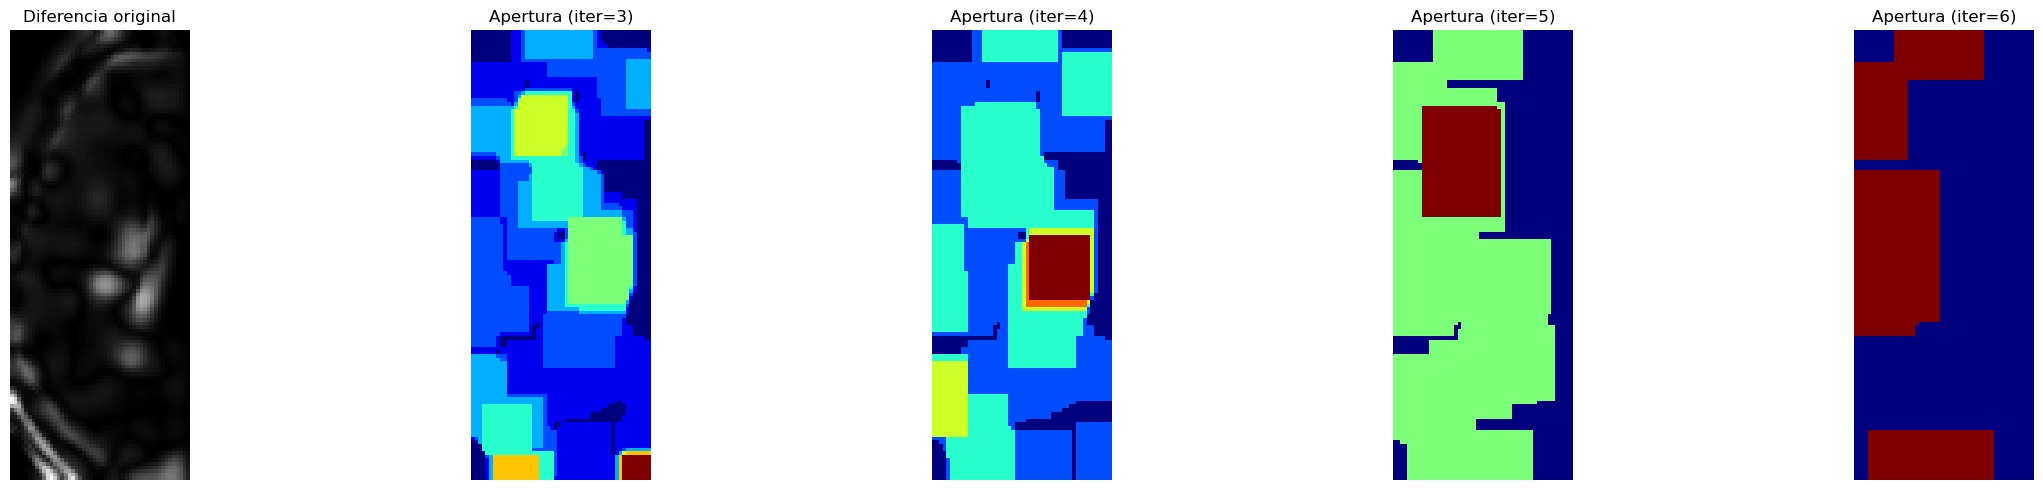

Archivo: N24.jpg


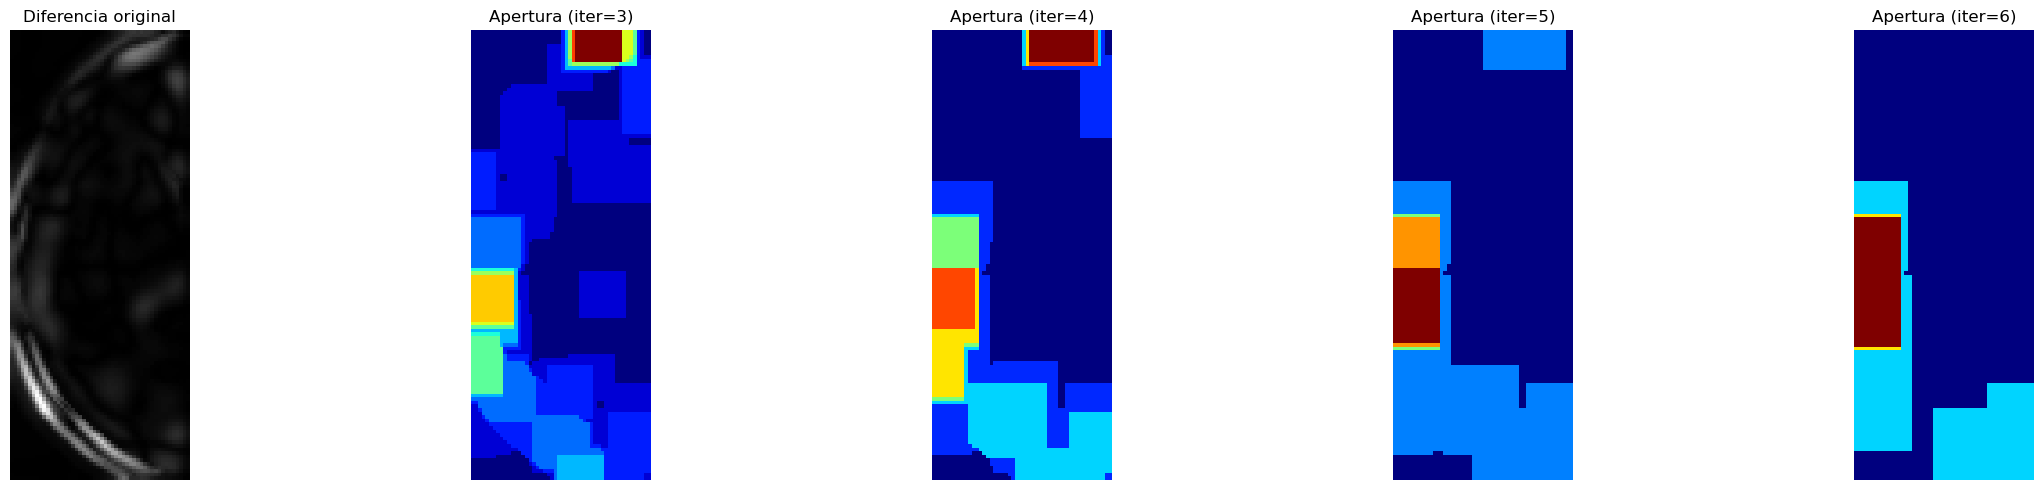

Archivo: N25.jpg


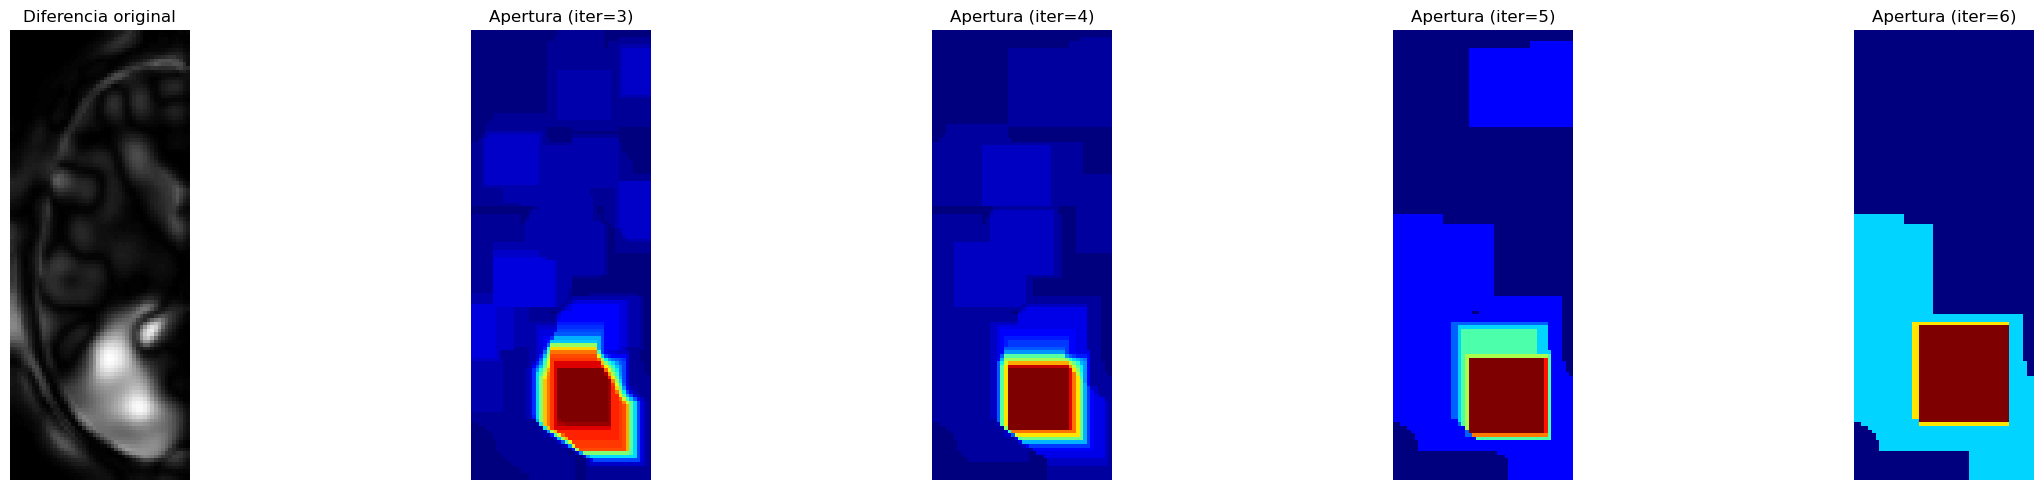

Archivo: N26.jpg


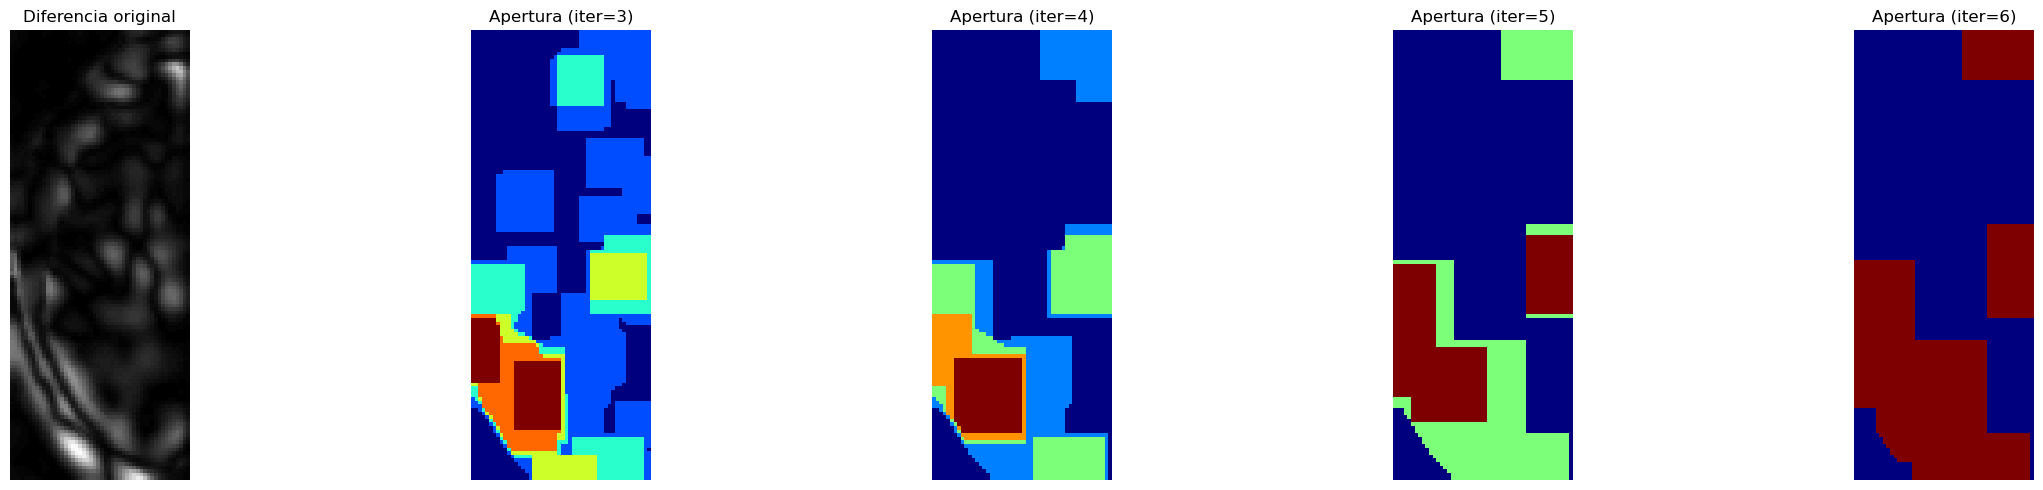

Archivo: N27.jpg


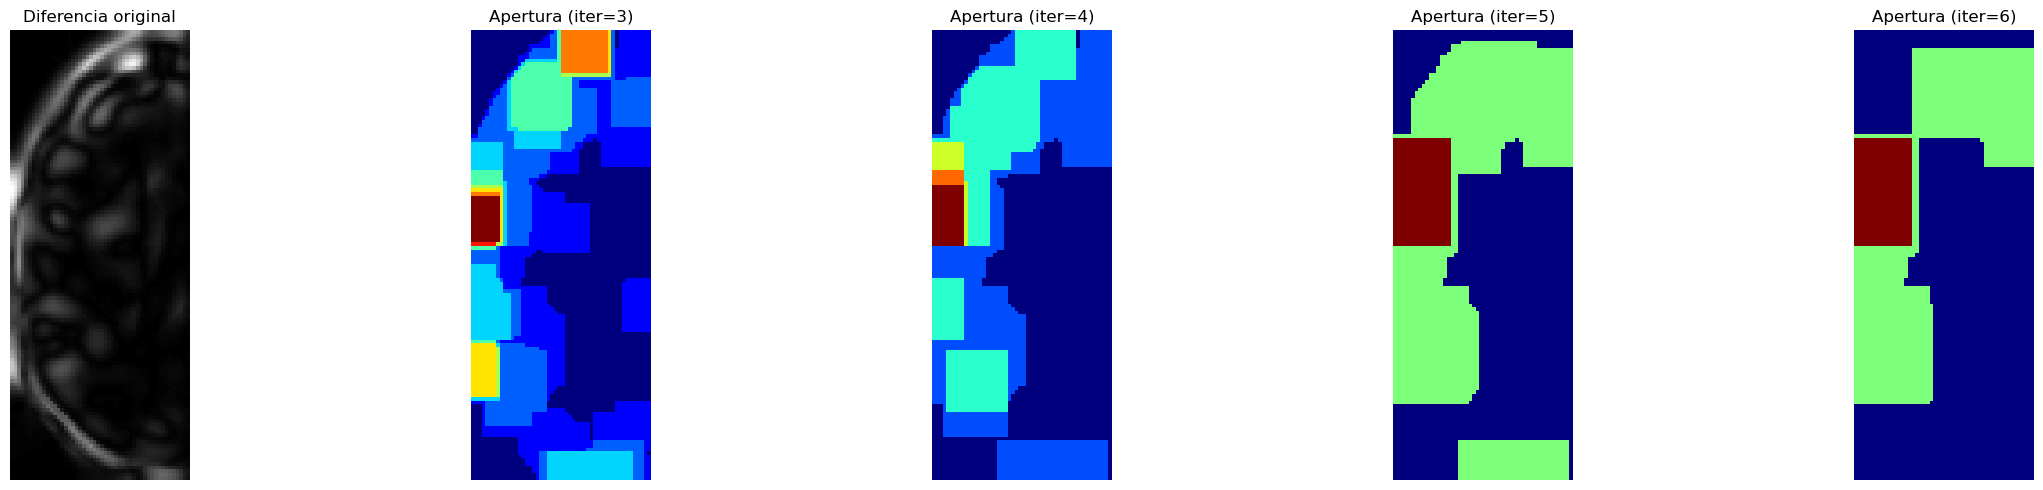

Archivo: N28.jpg


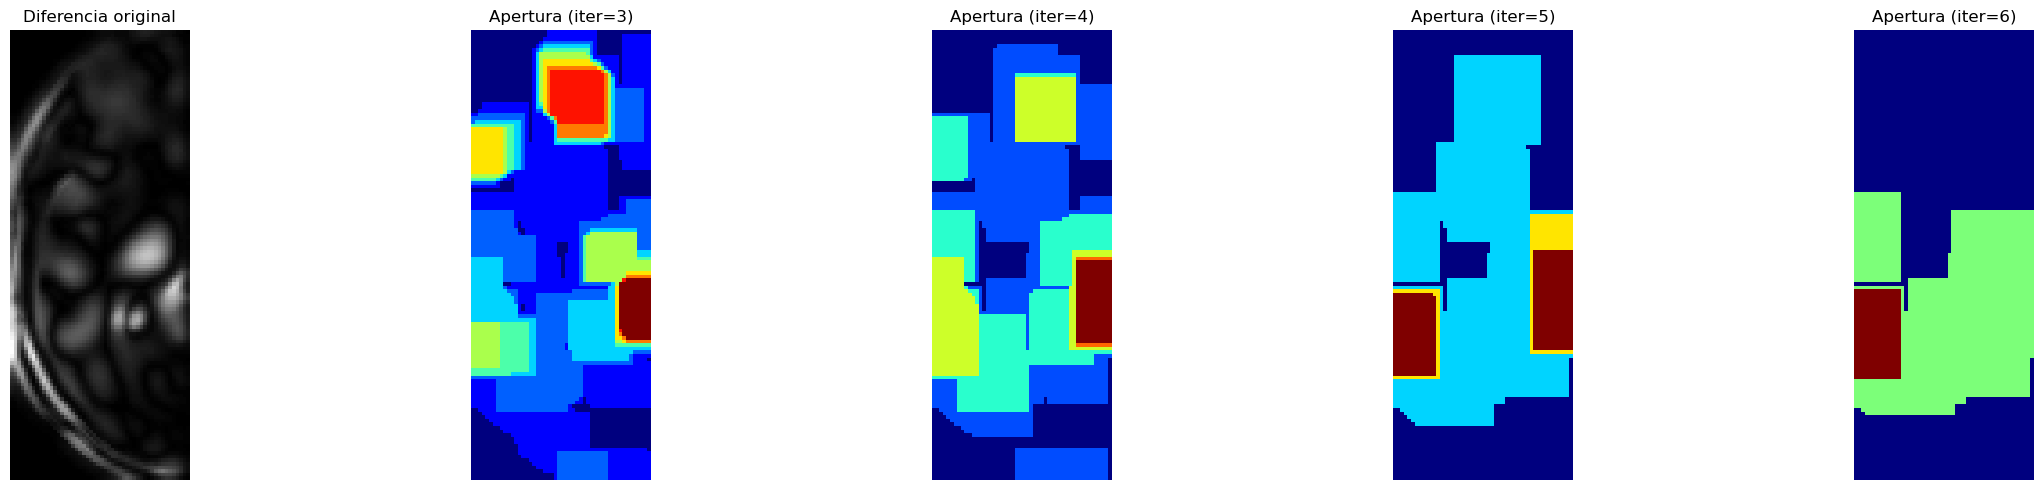

Archivo: N29.jpg


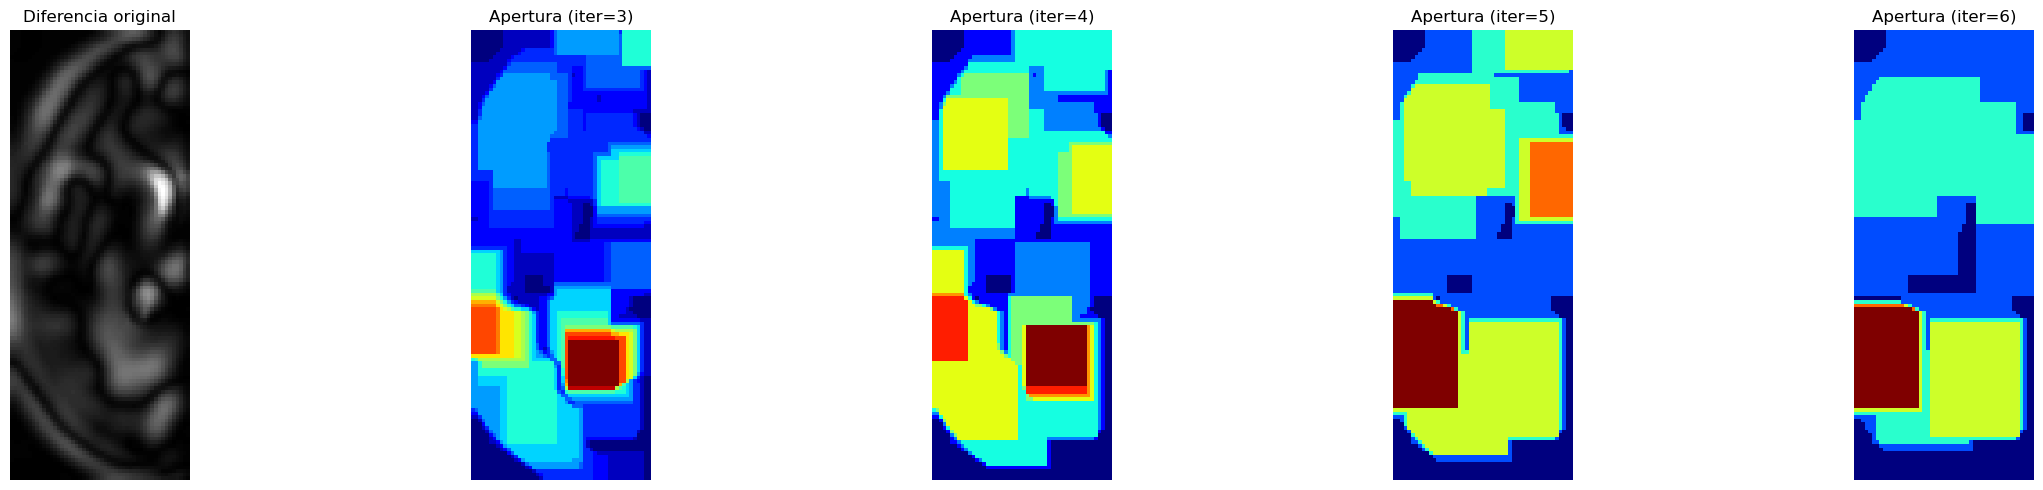

Archivo: N3.jpg


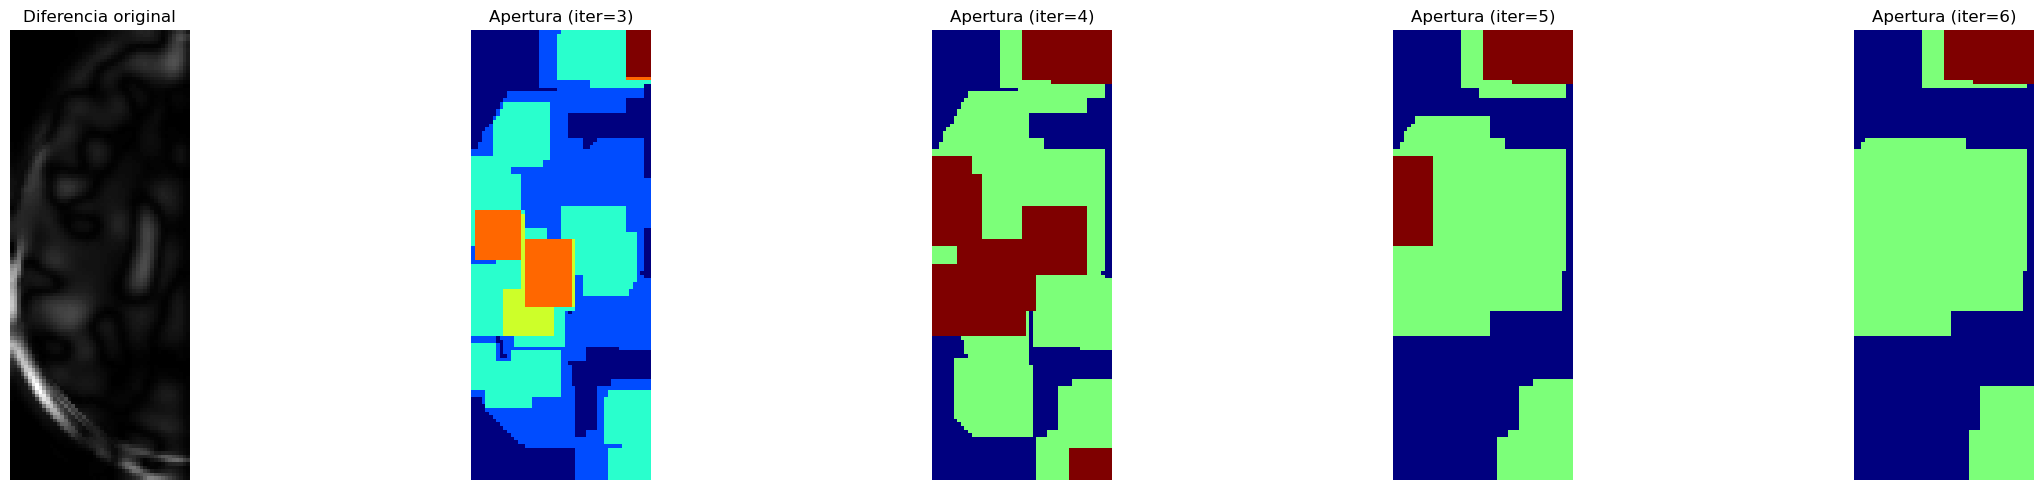

Archivo: N30.jpg


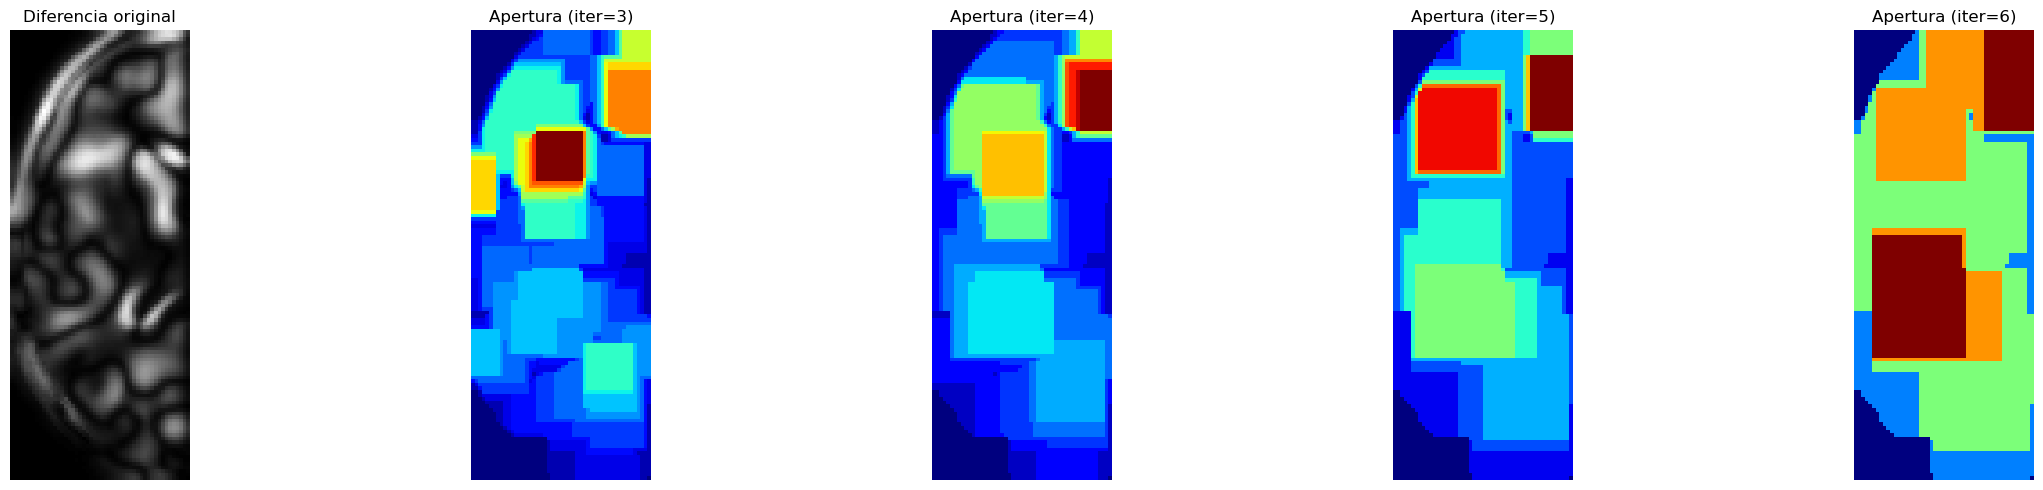

Archivo: N31.jpg


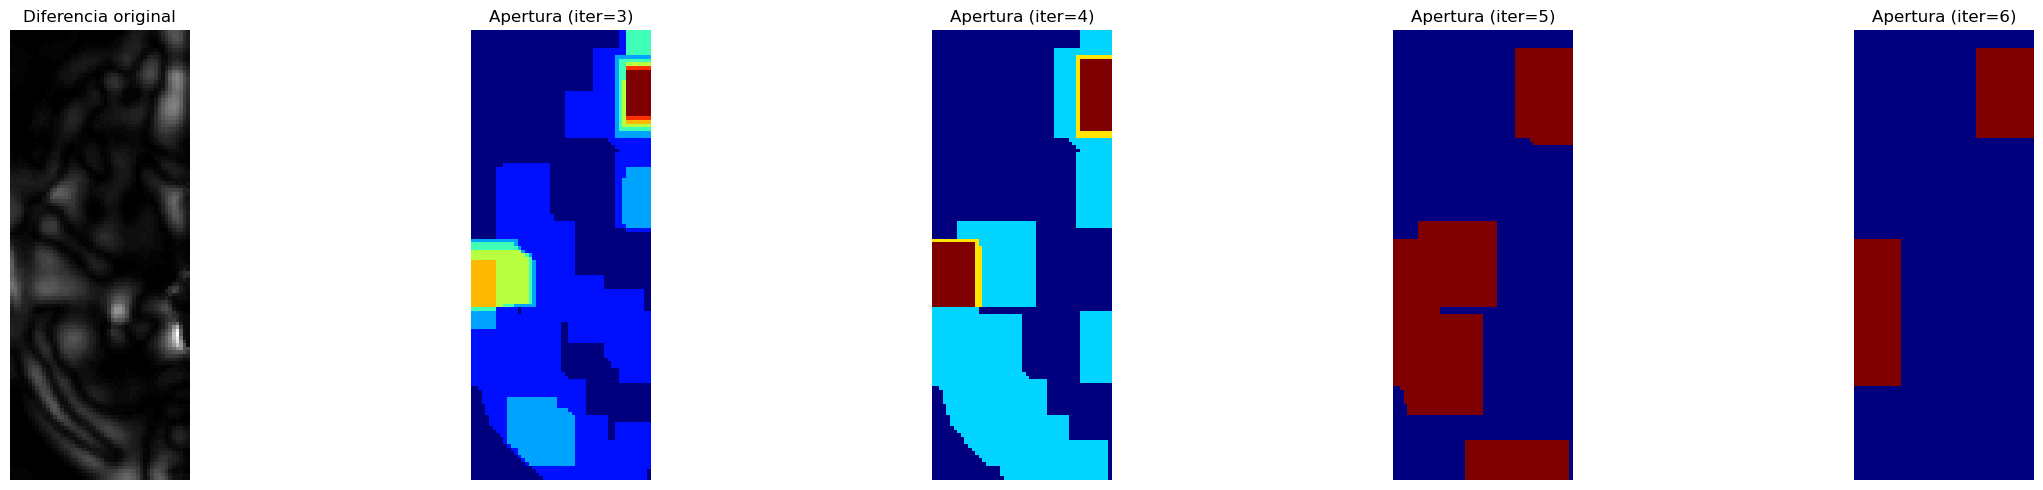

Archivo: N32.jpg


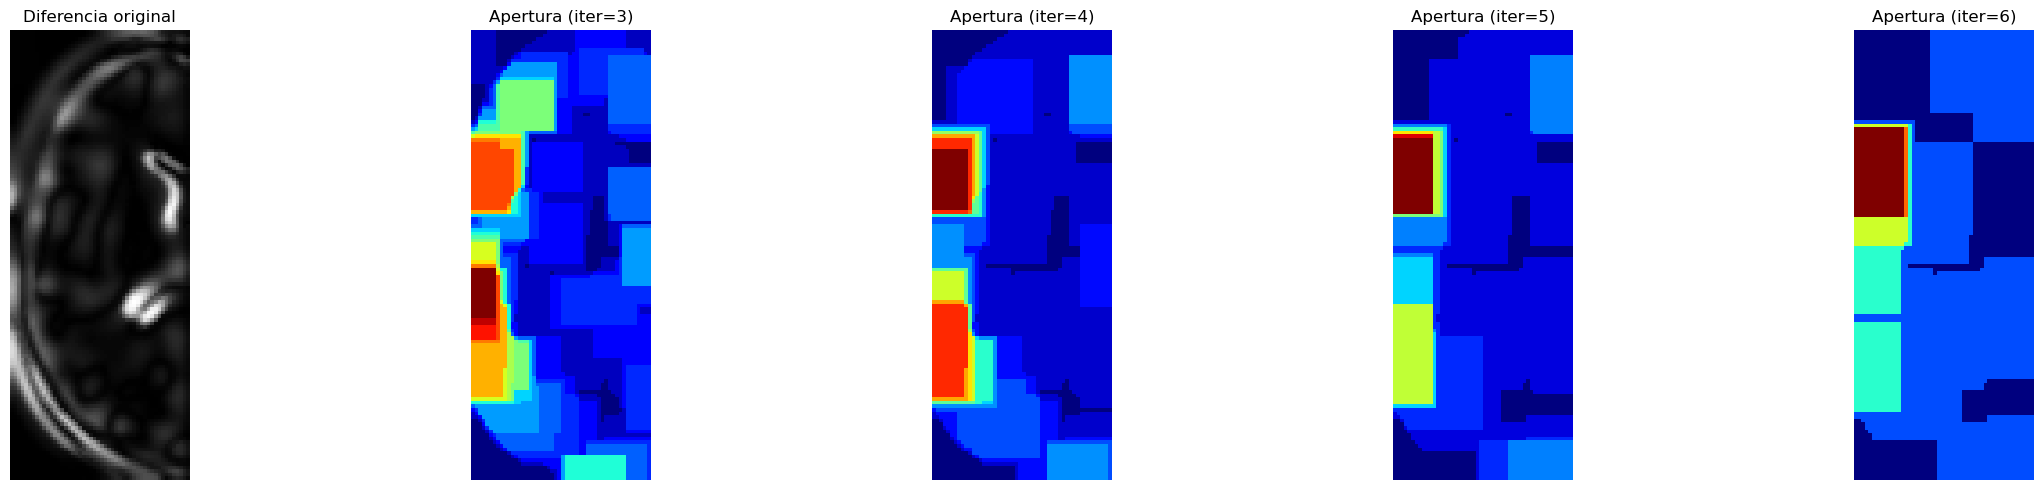

Archivo: N33.jpg


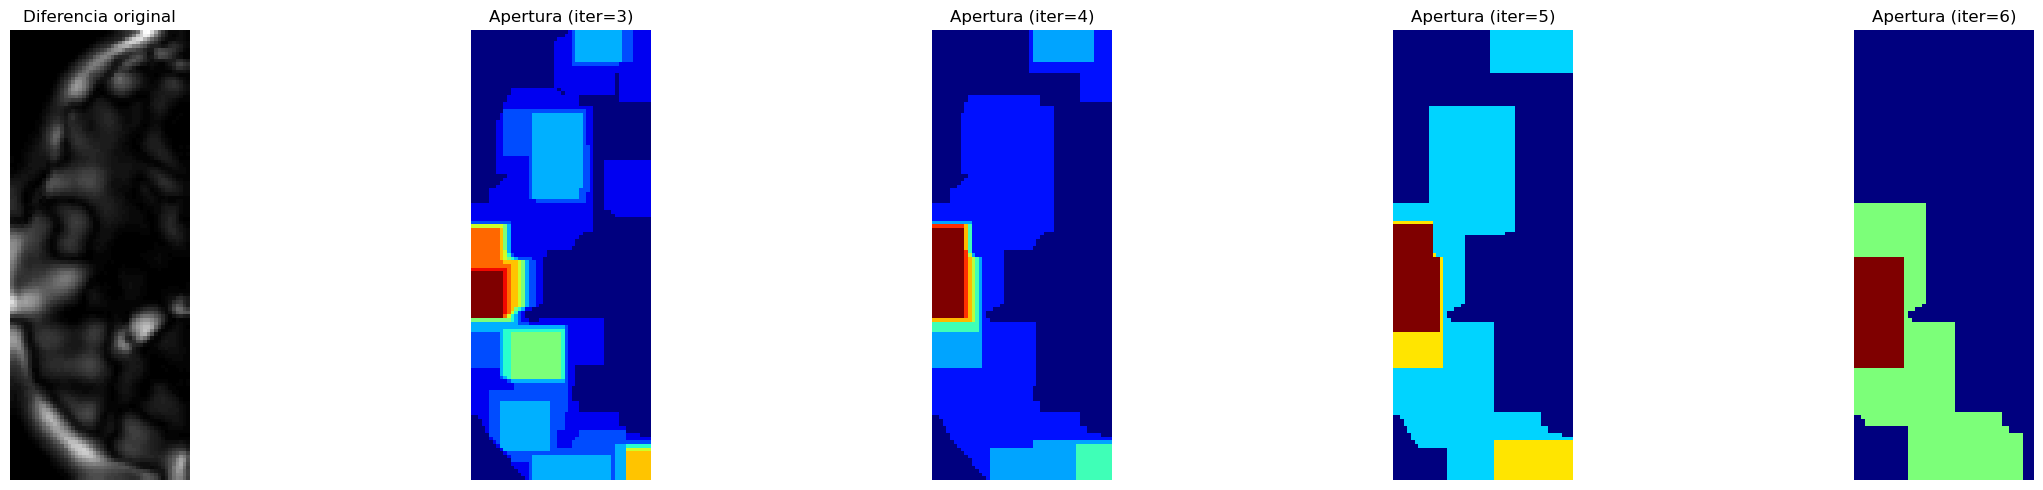

Archivo: N34.jpg


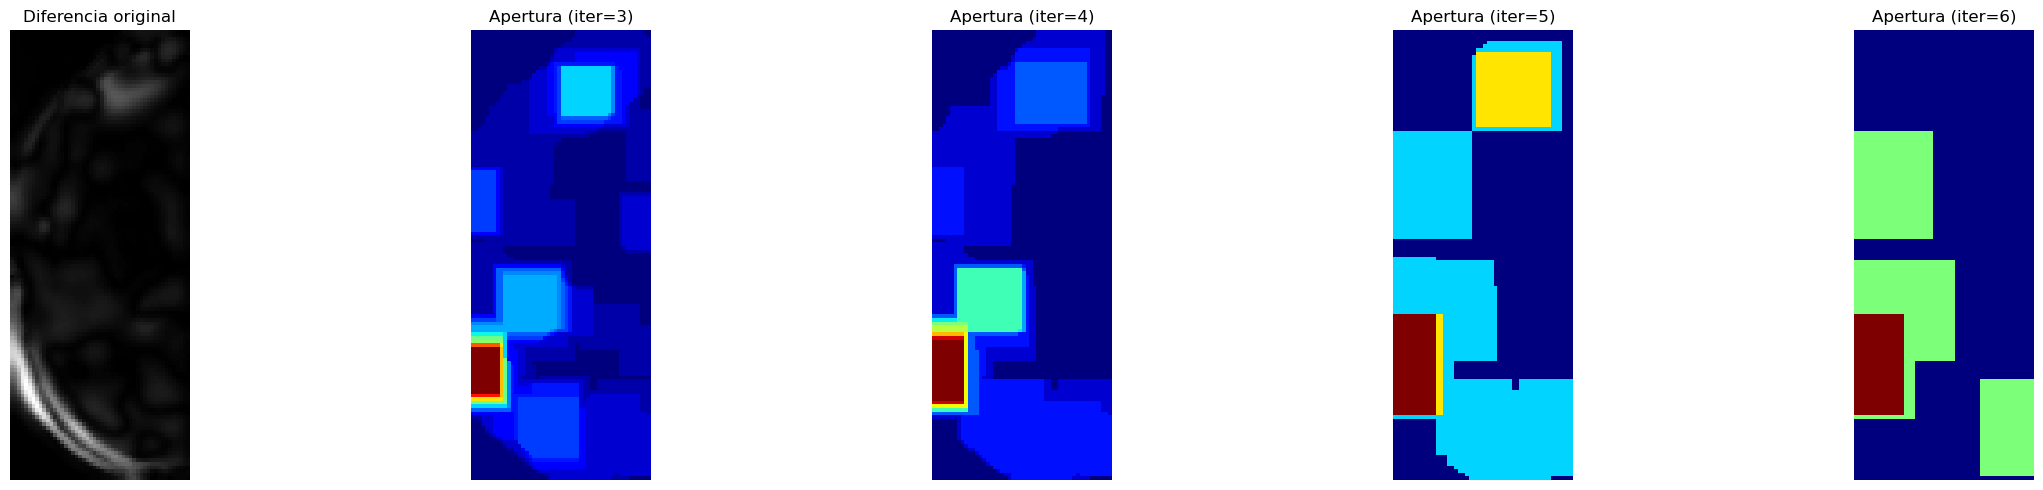

Archivo: N35.jpg


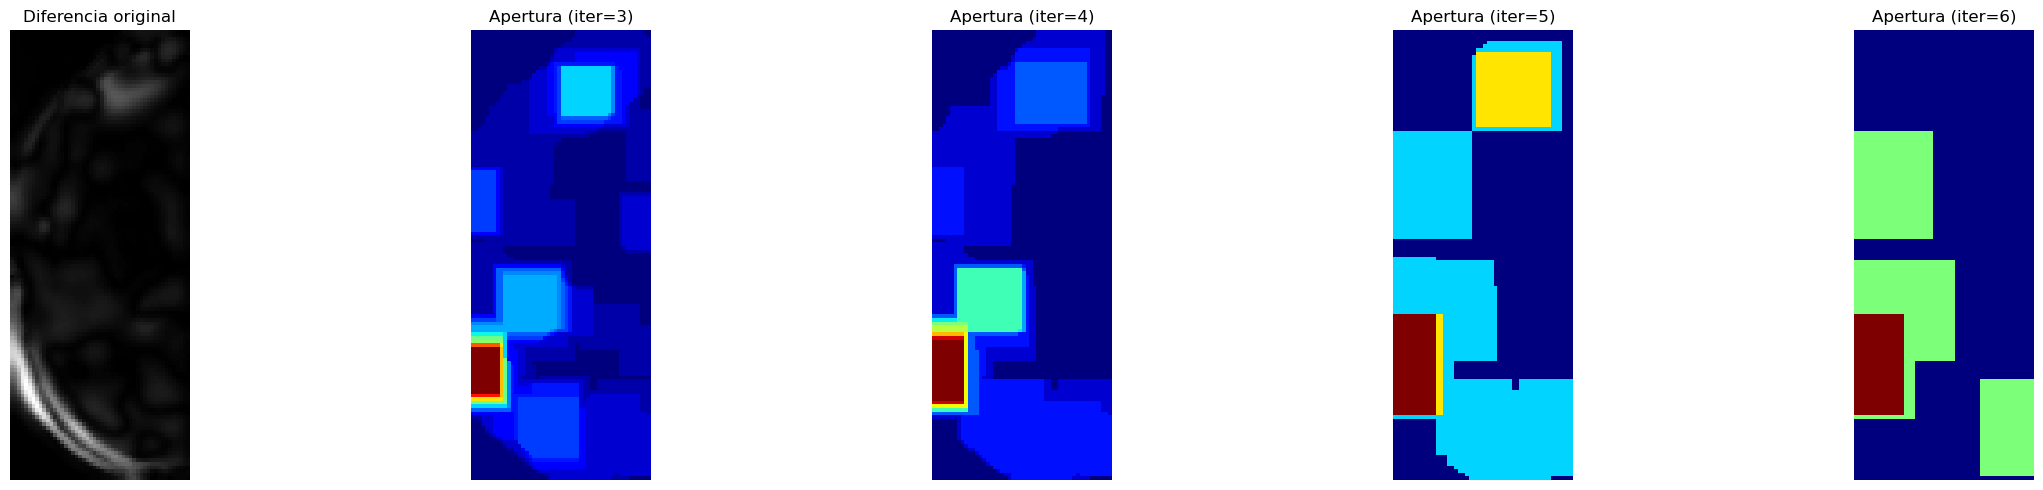

Archivo: N36.jpg


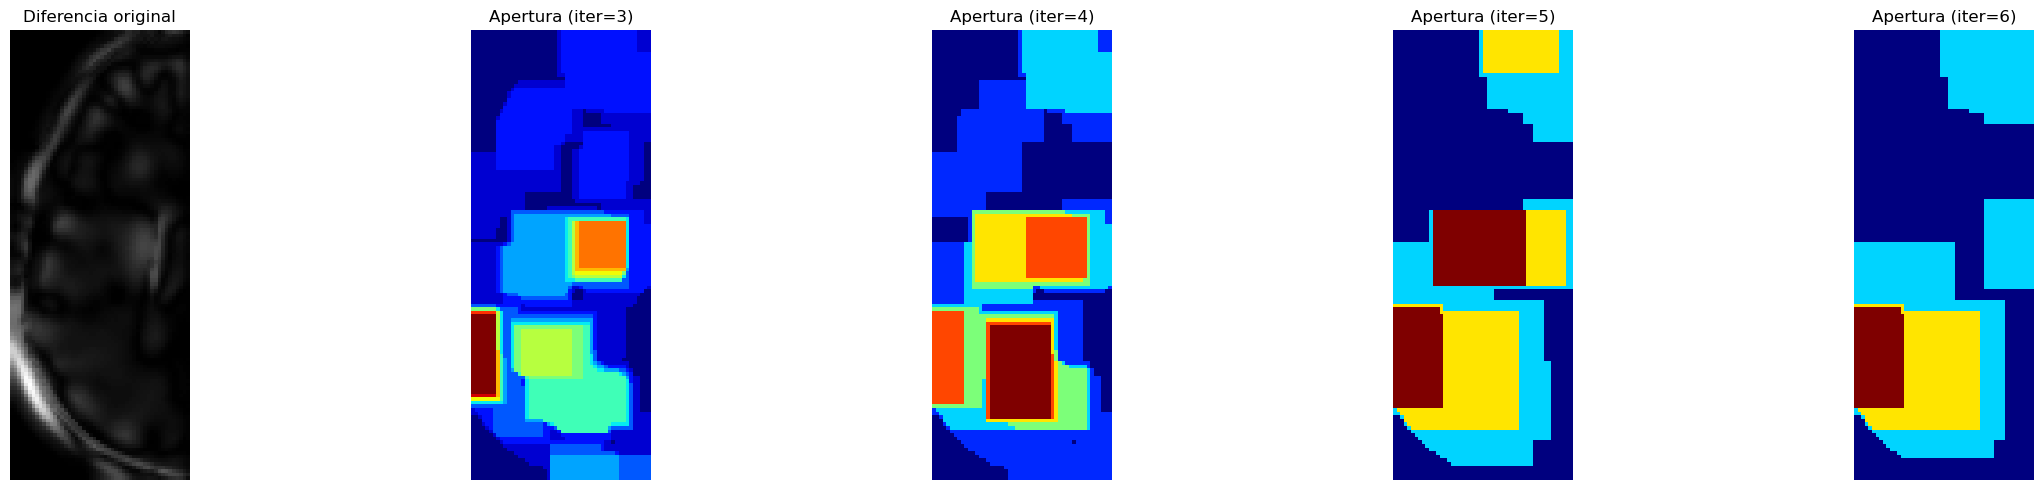

Archivo: N38.jpg


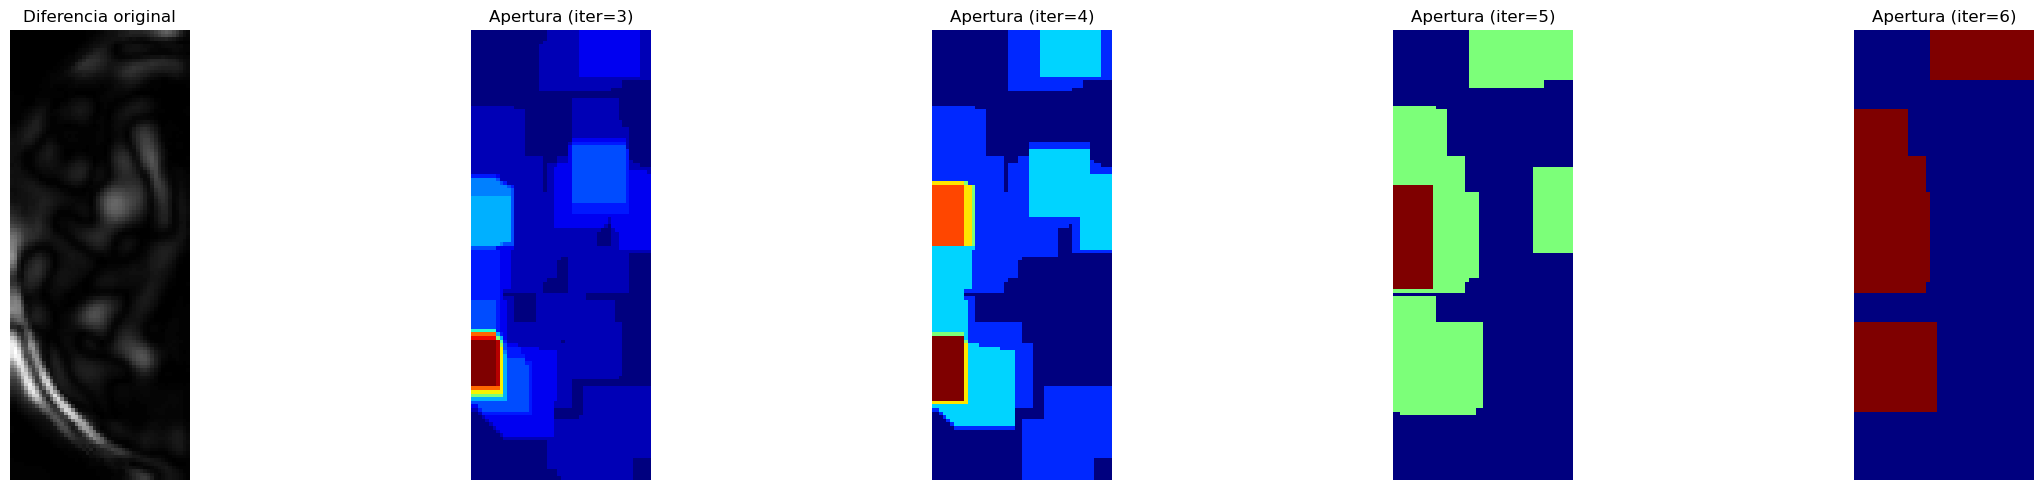

Archivo: N39.jpg


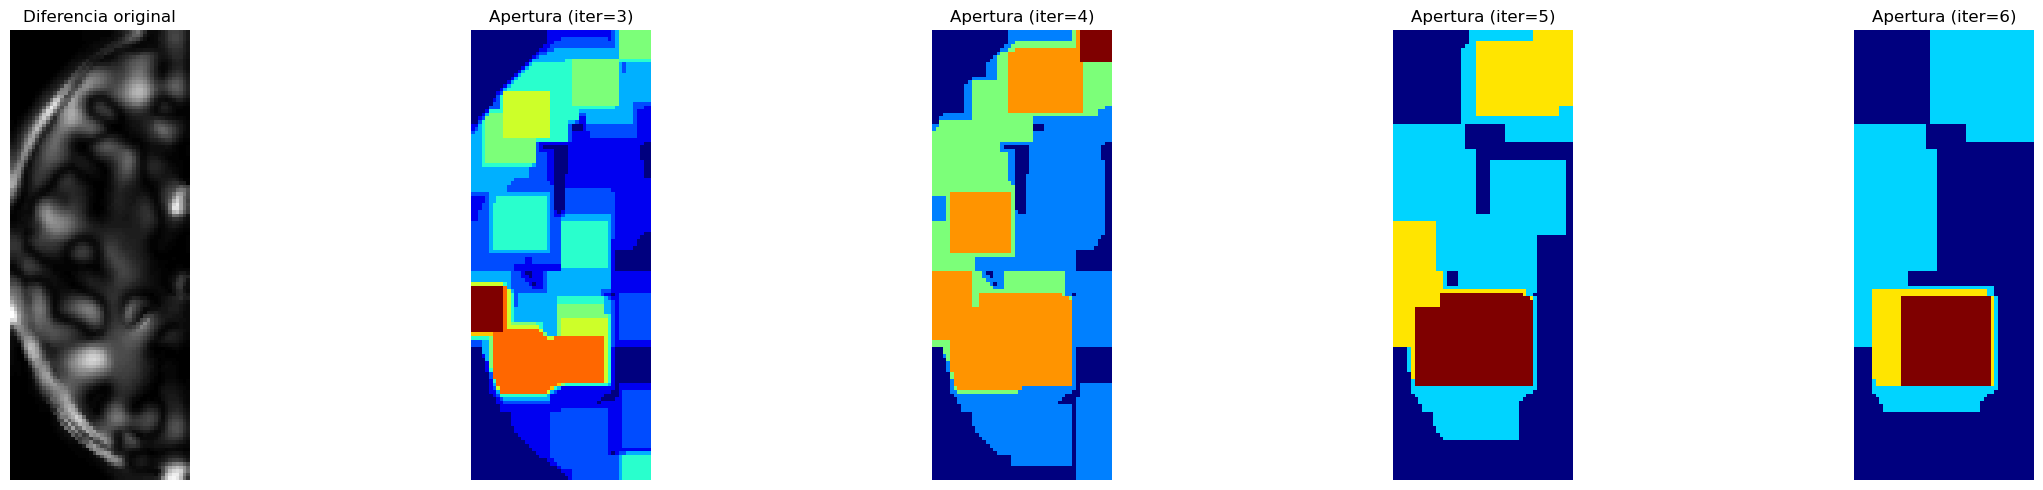

Archivo: N4.jpg


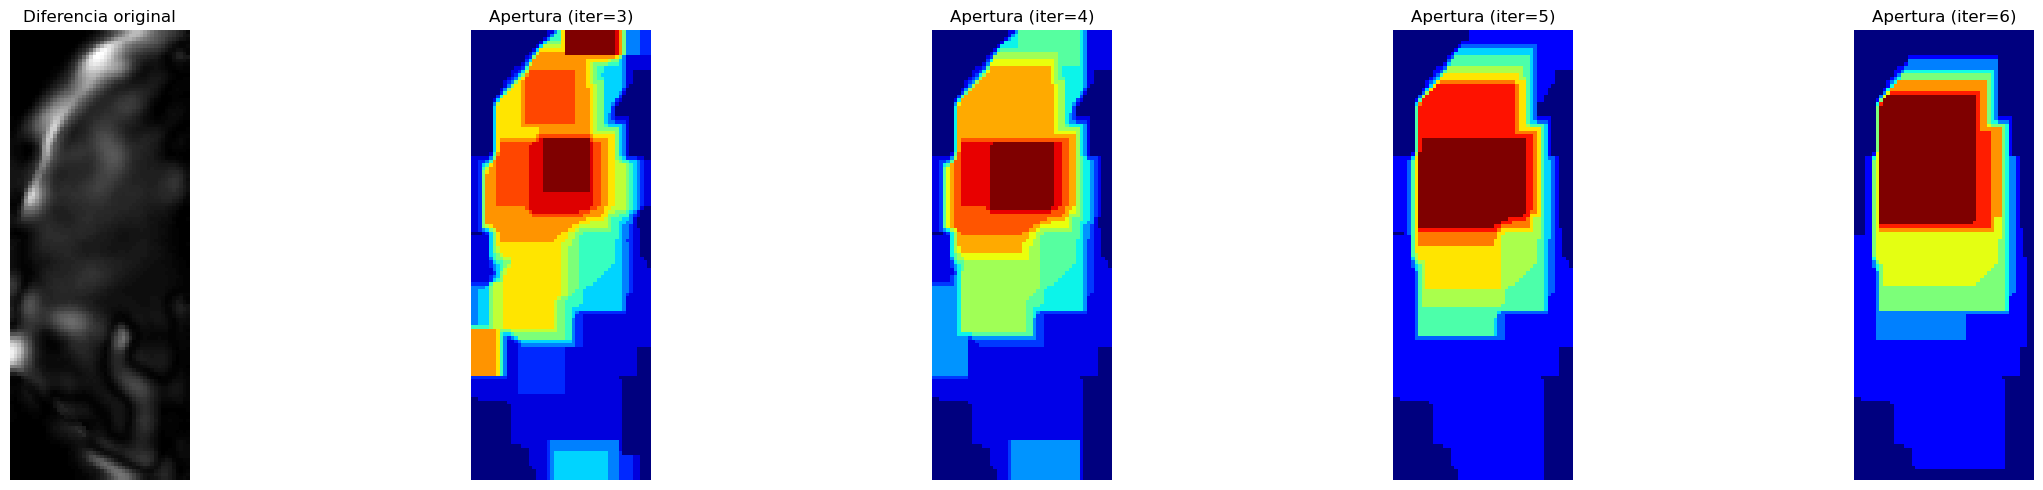

Archivo: N40.jpg


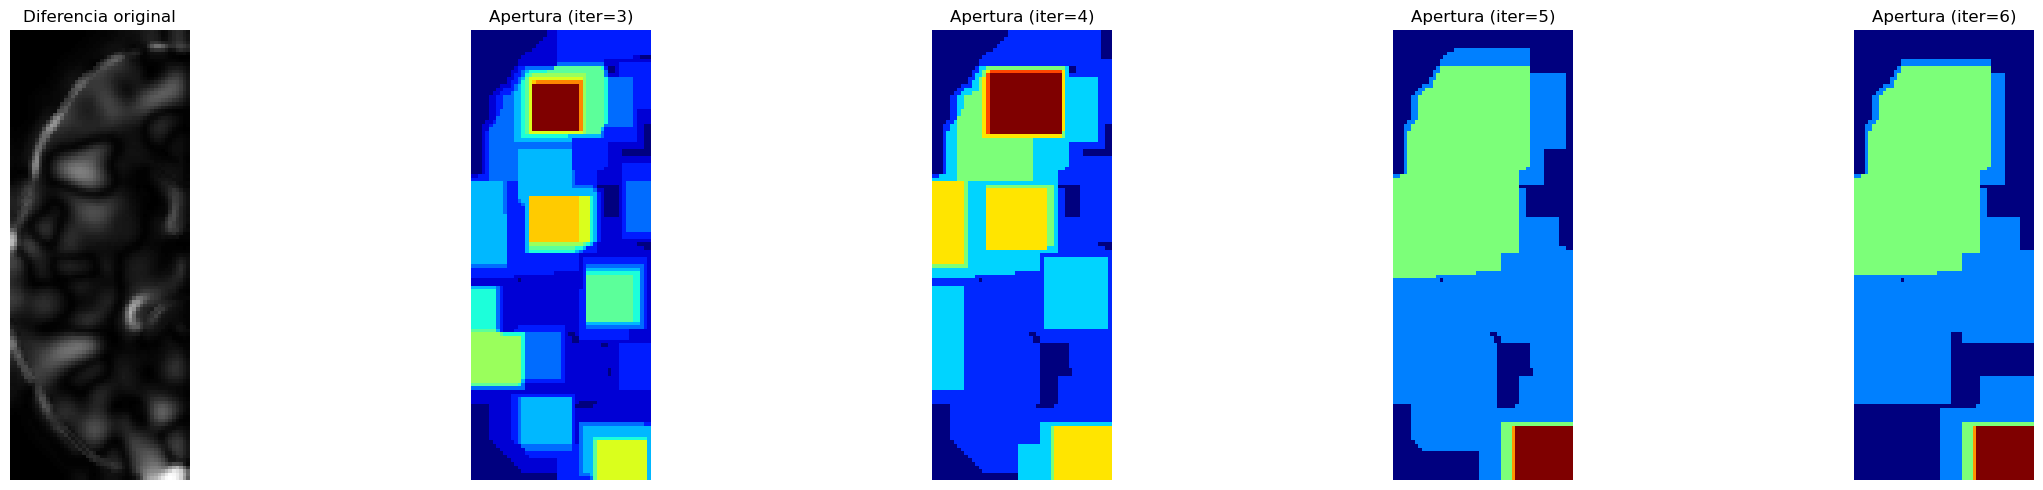

Archivo: N41.jpg


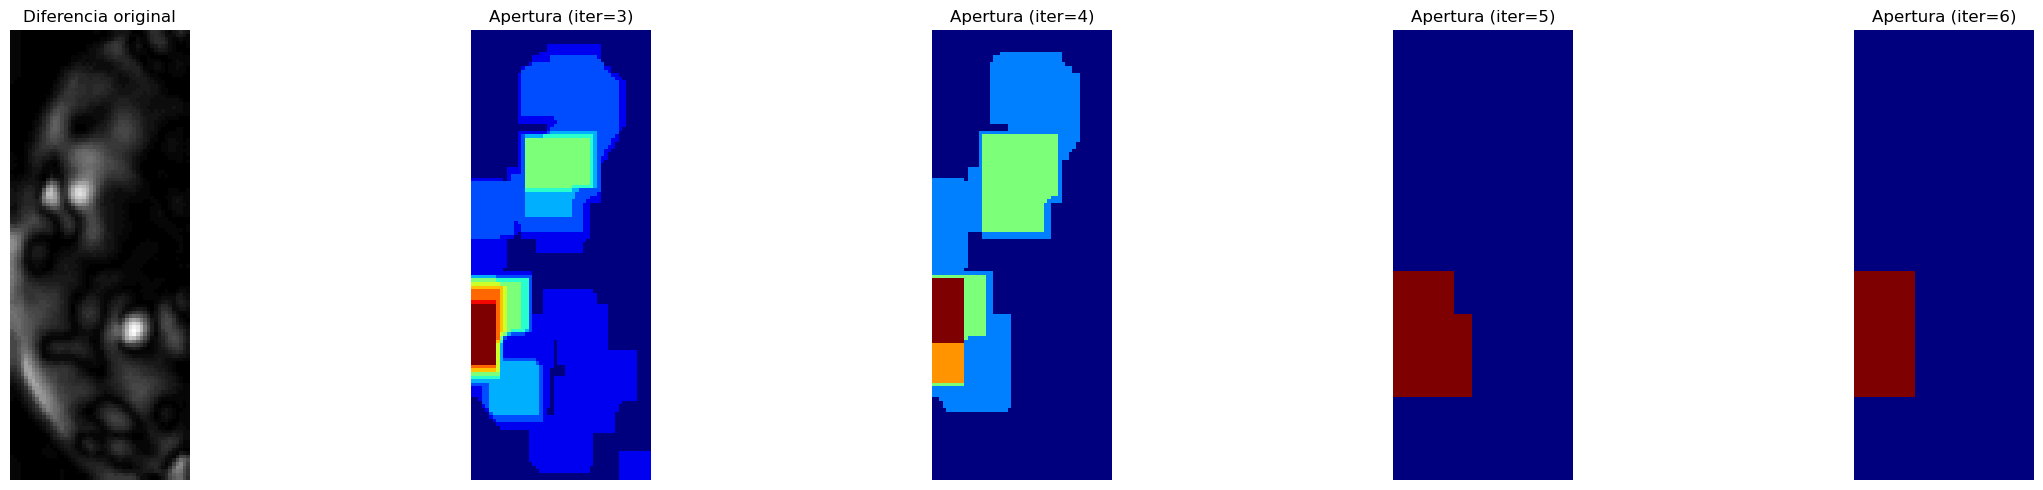

Archivo: N42.jpg


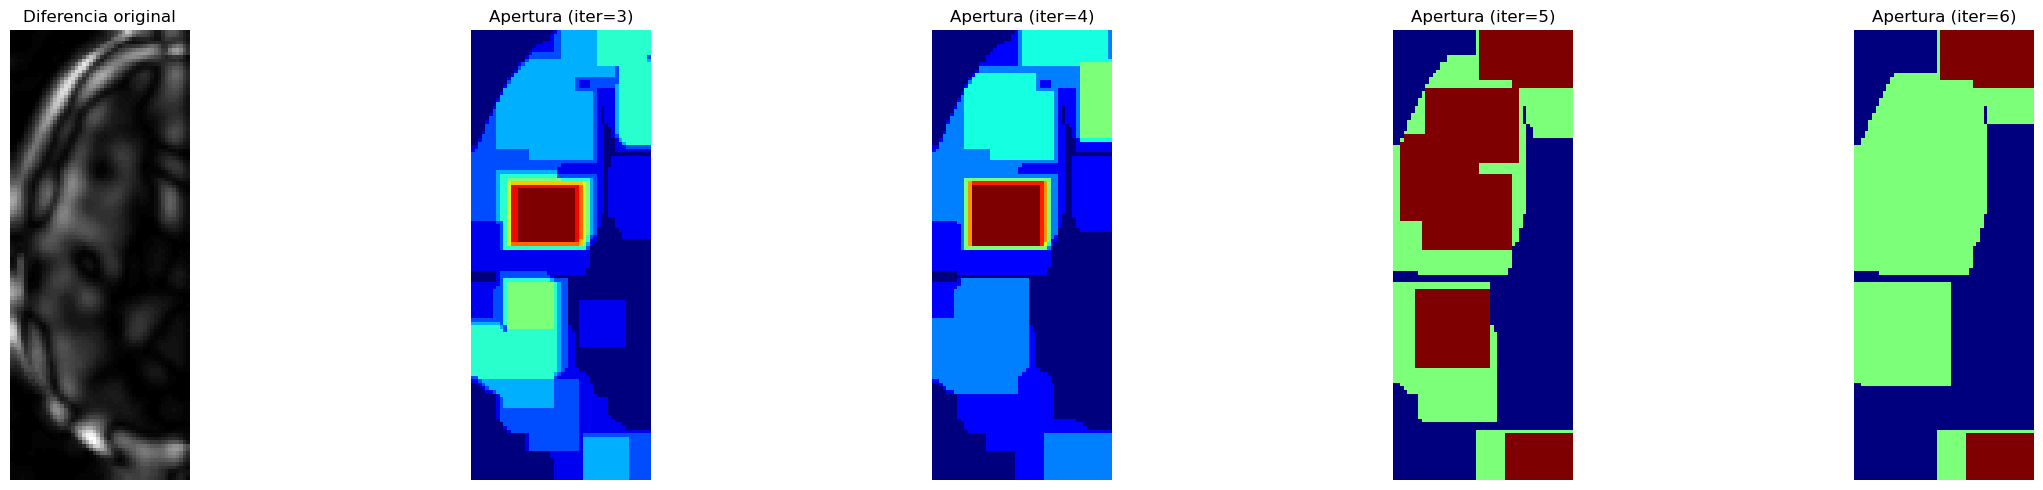

Archivo: N43.jpg


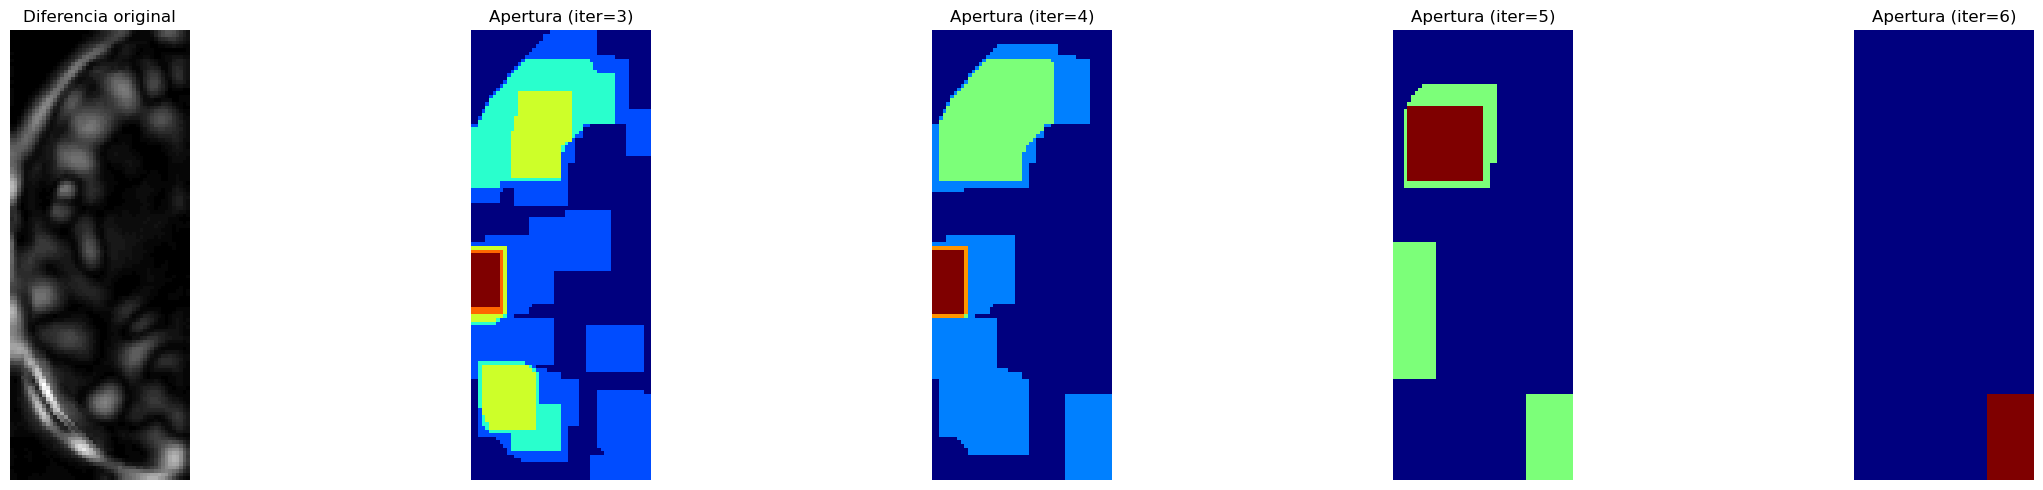

Archivo: N44.jpg


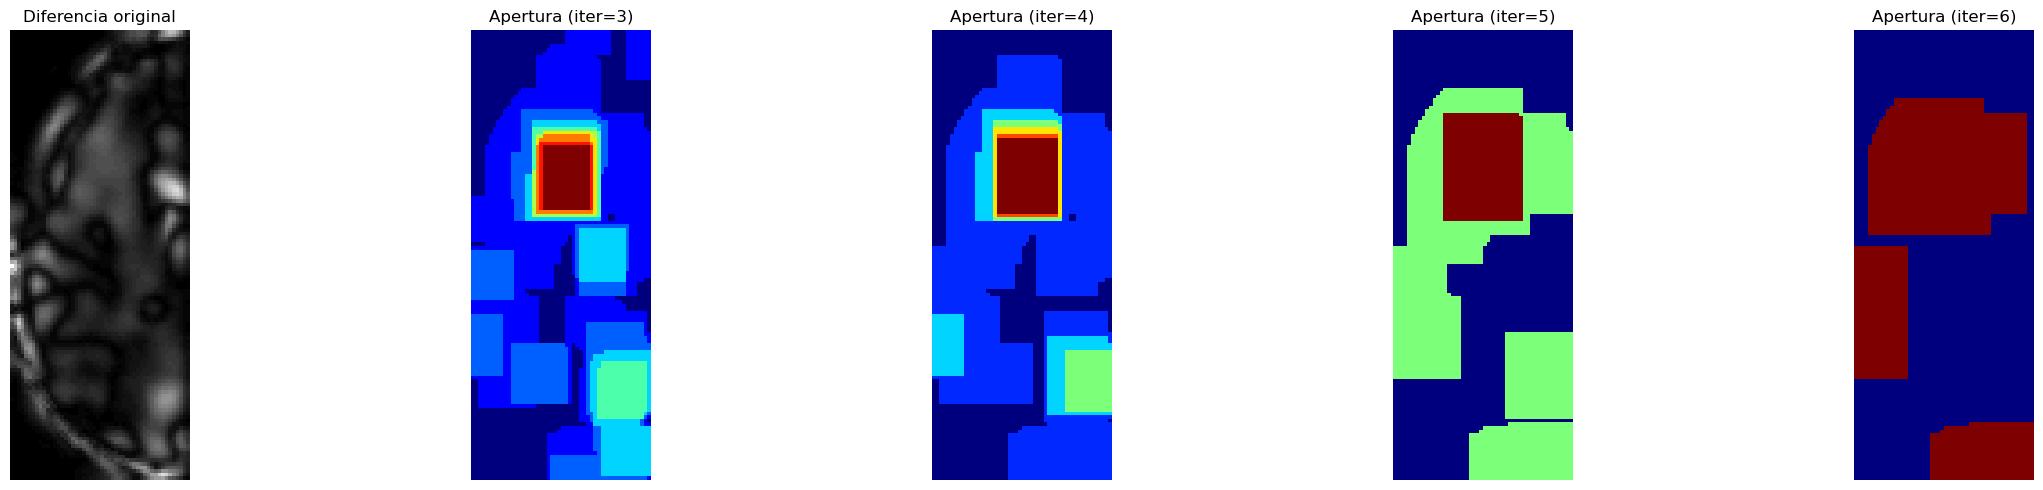

Archivo: N45.jpg


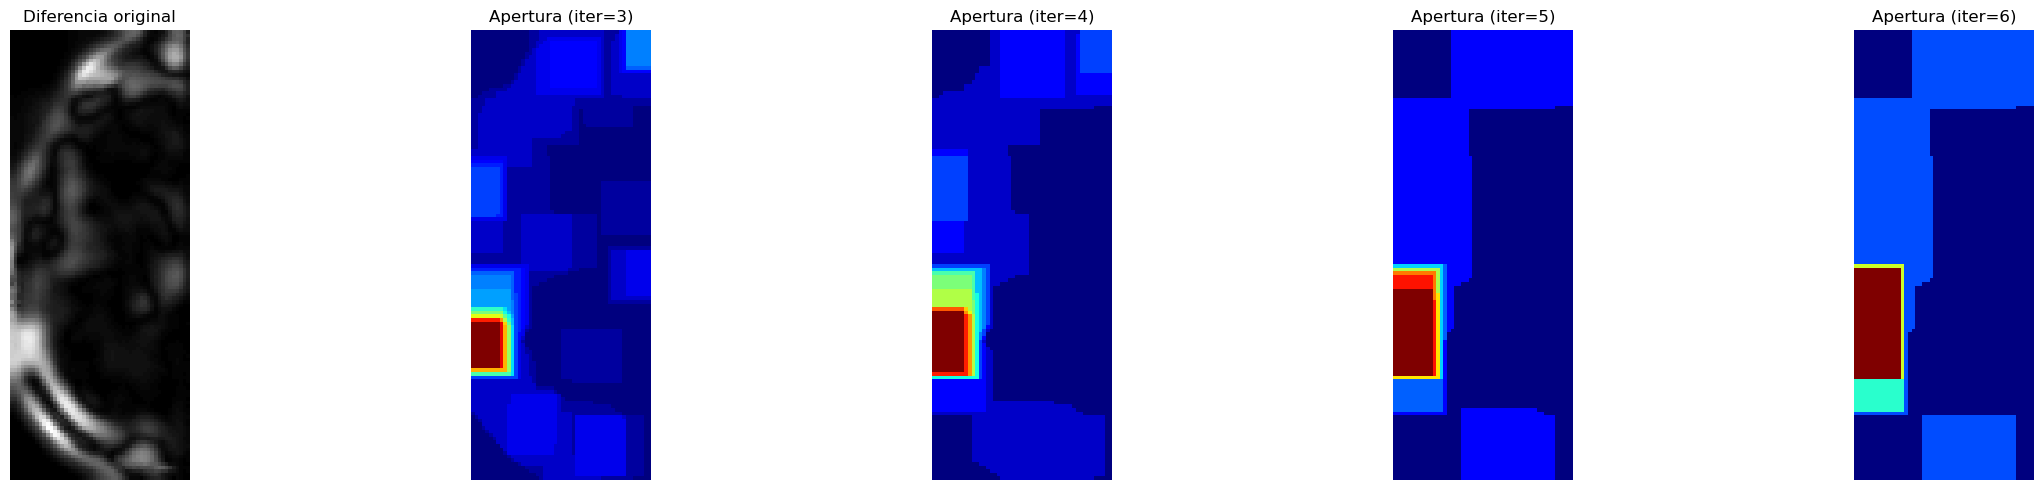

Archivo: N46.jpg


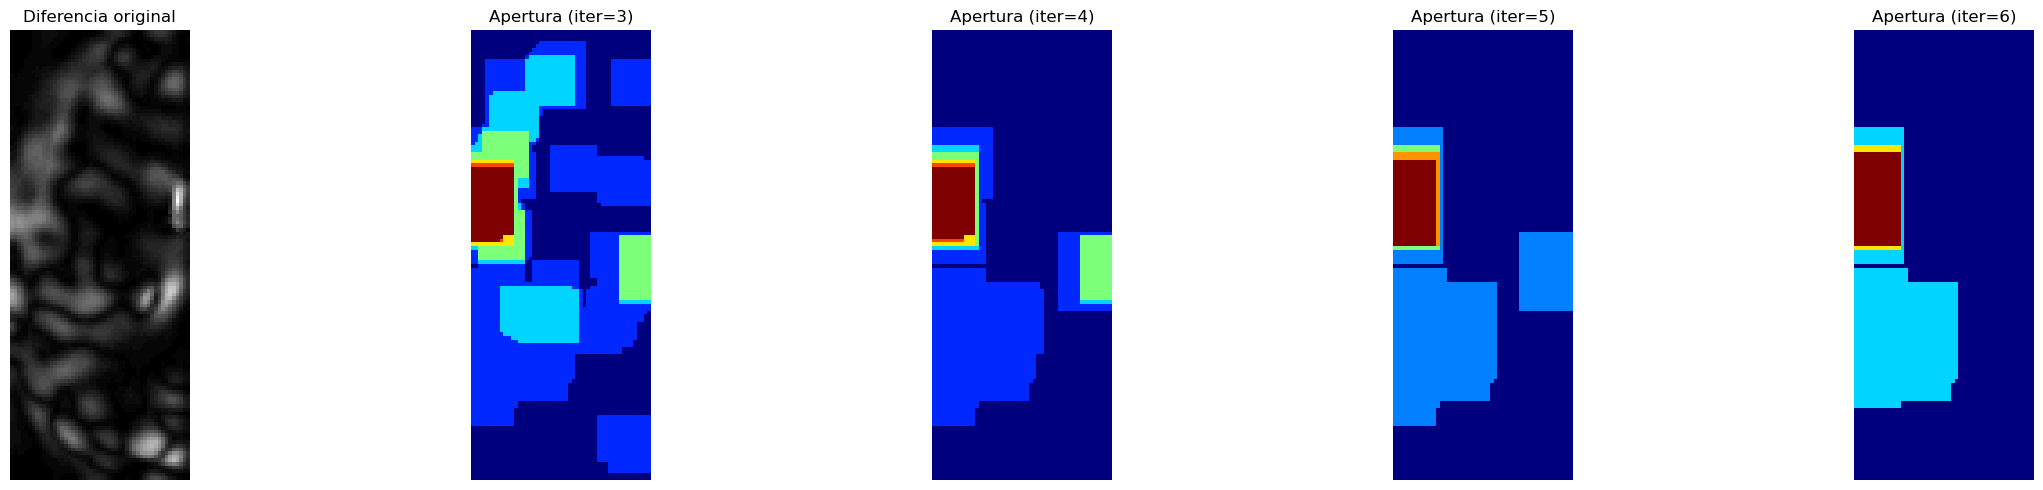

Archivo: N47.jpg


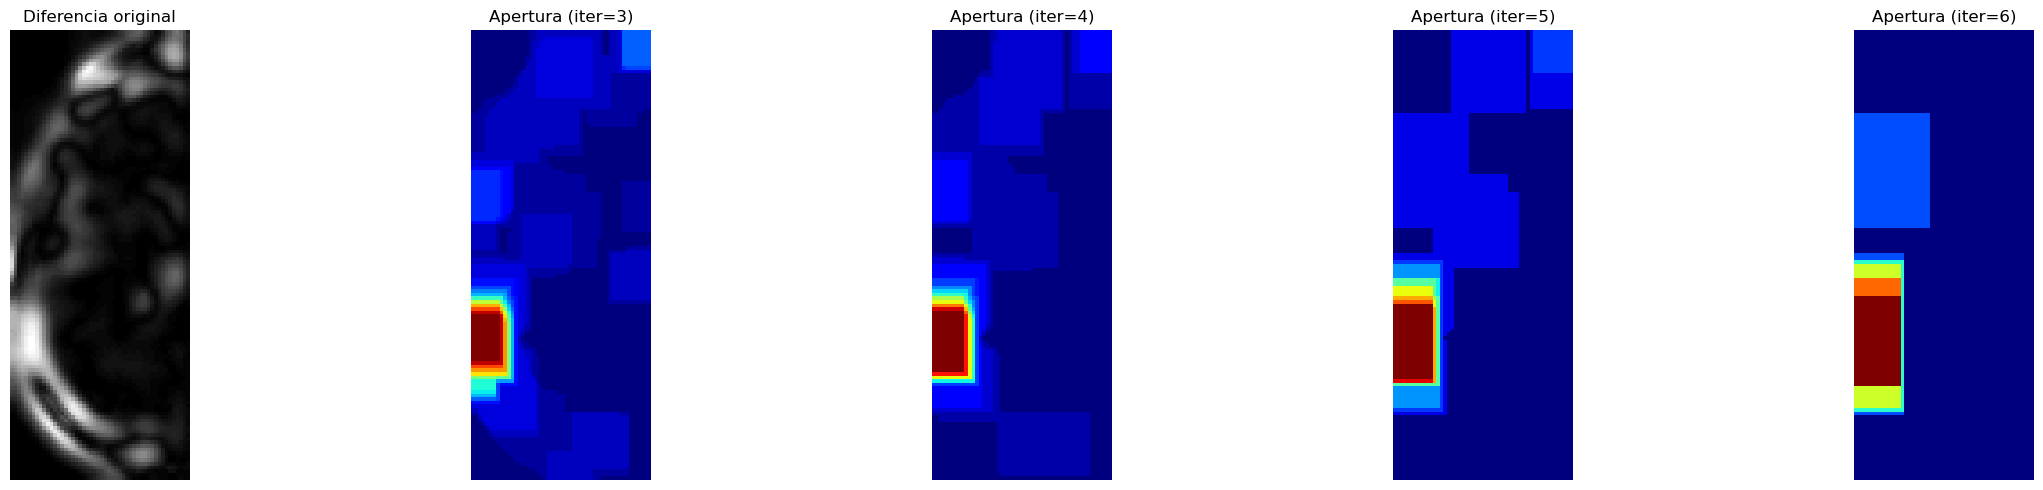

Archivo: N48.jpg


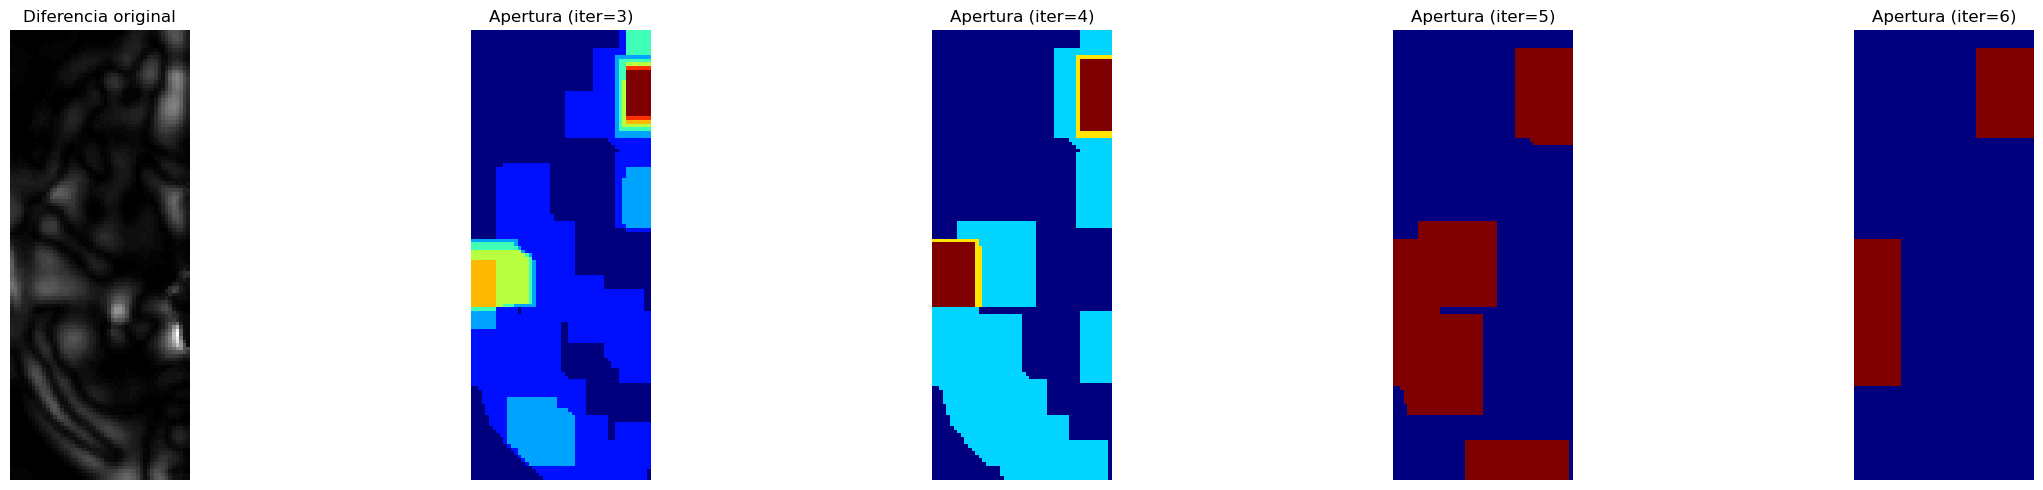

Archivo: N49.jpg


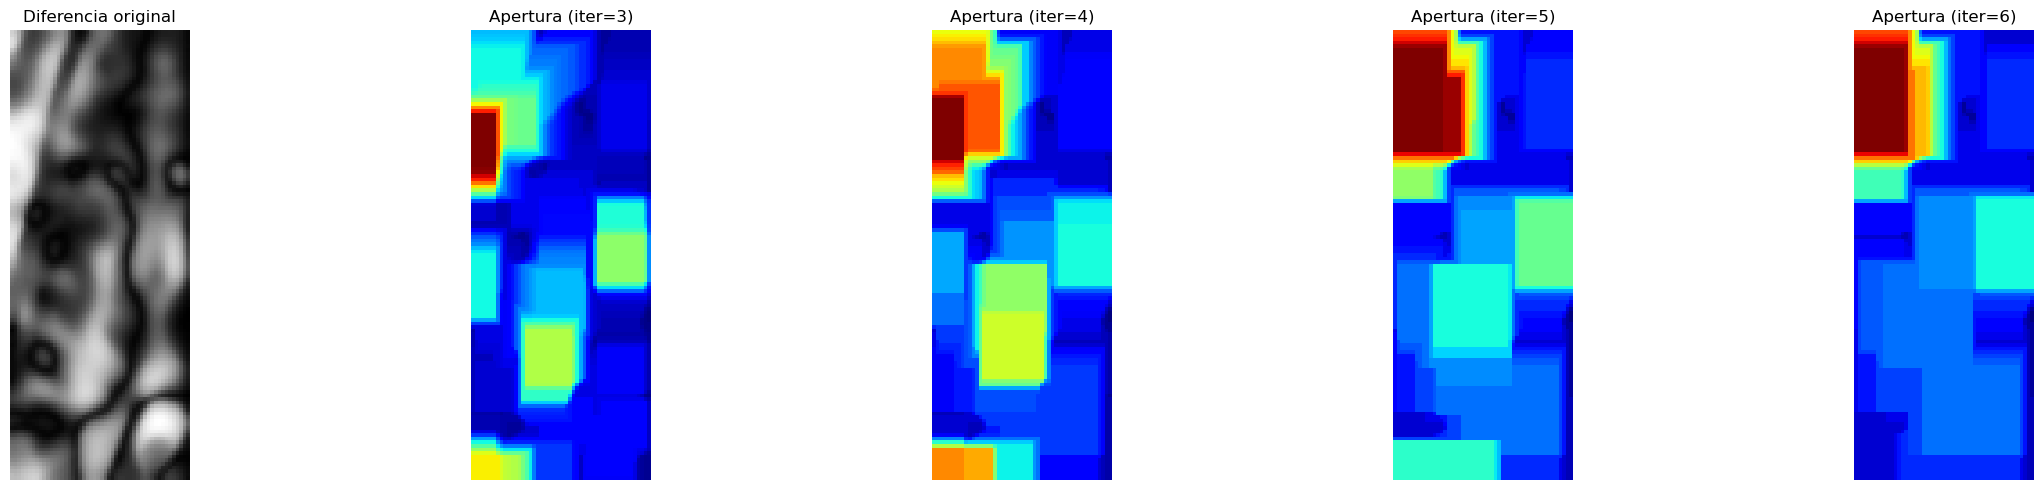

Archivo: N5.jpg


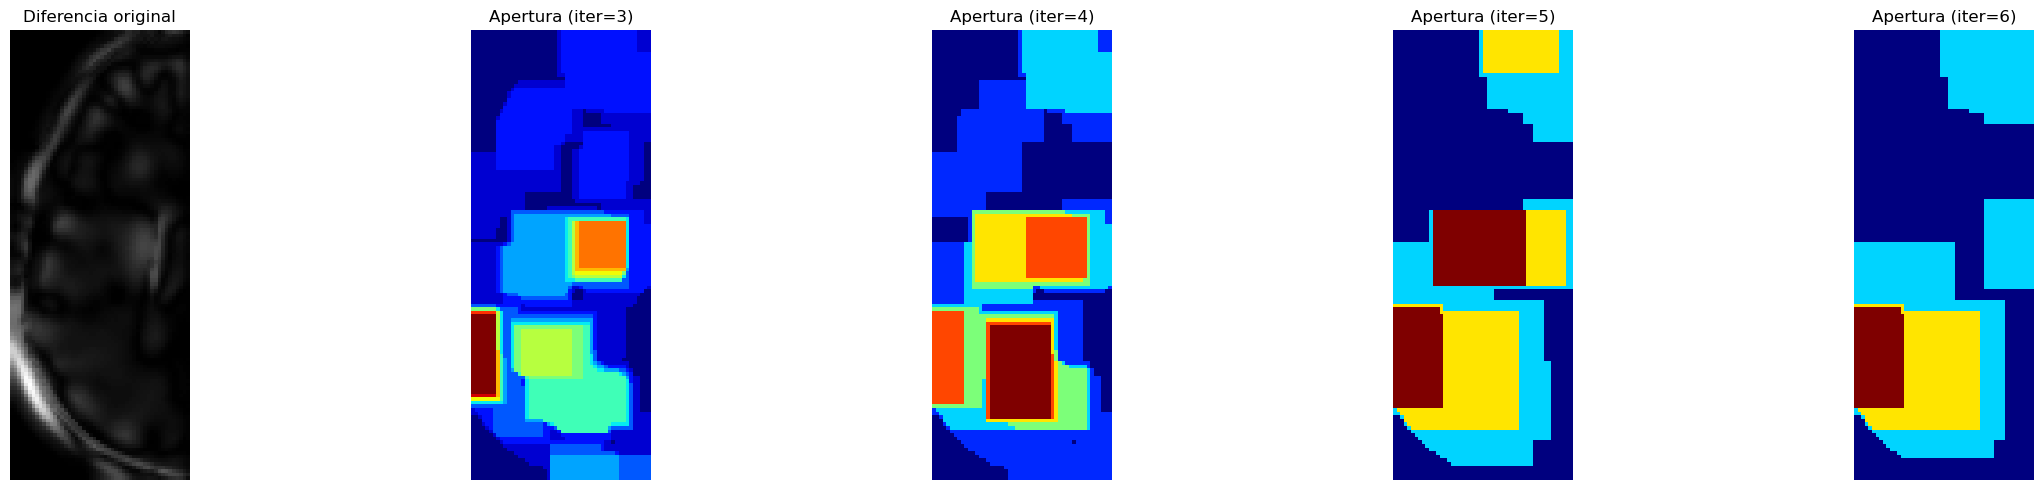

Archivo: N51.jpg


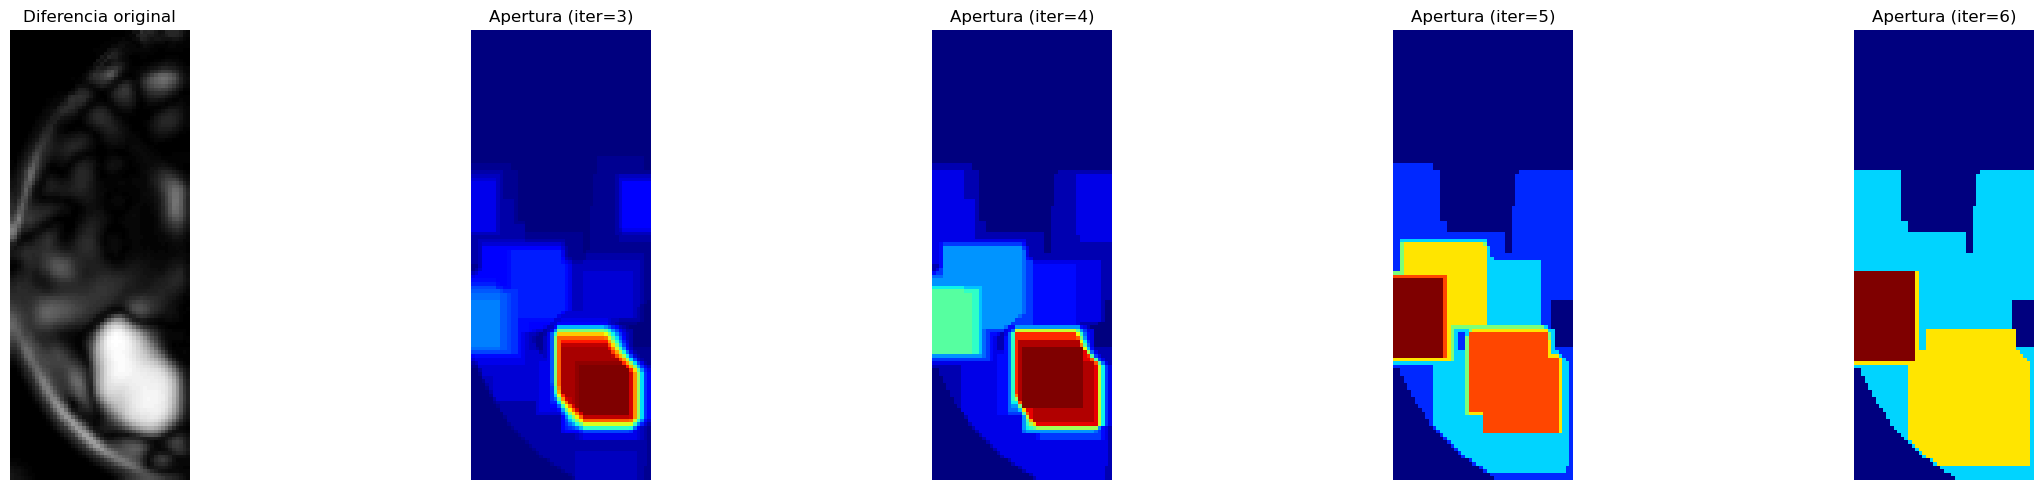

Archivo: N52.jpg


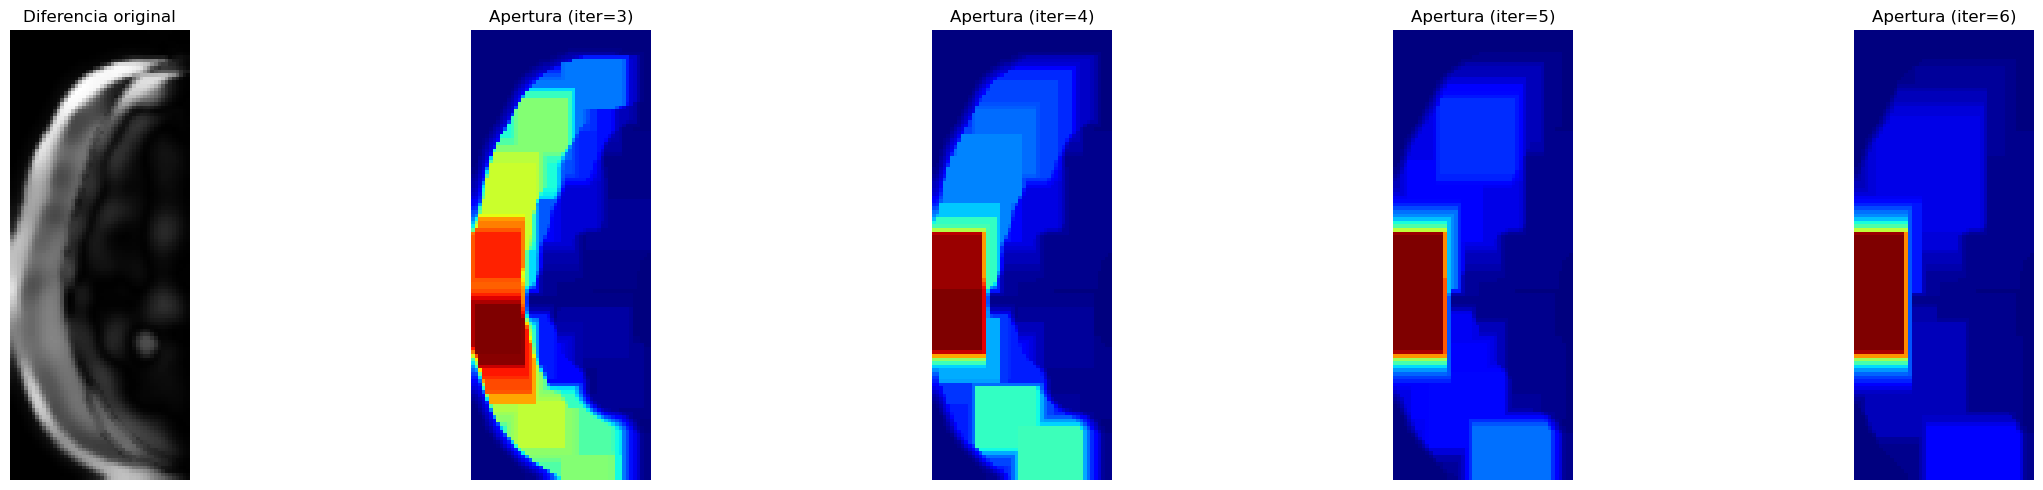

Archivo: N53.jpg


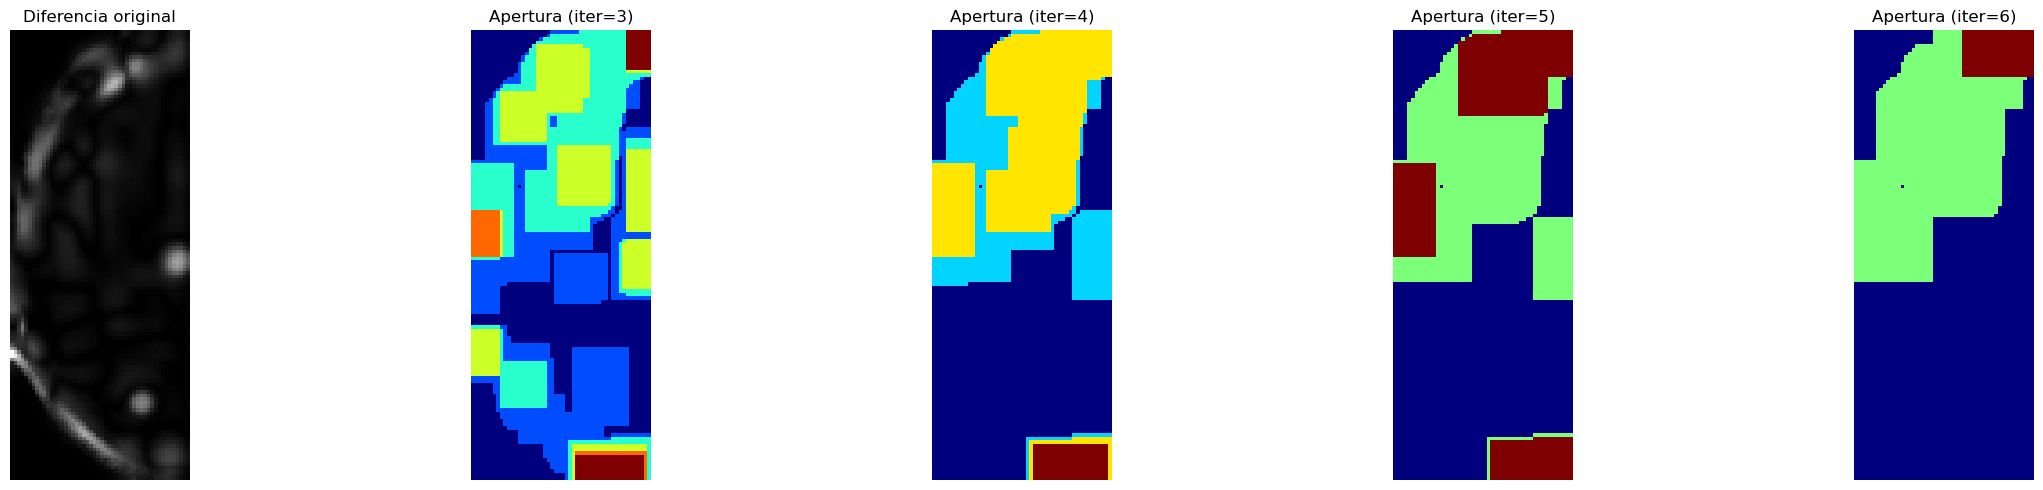

Archivo: N54.jpg


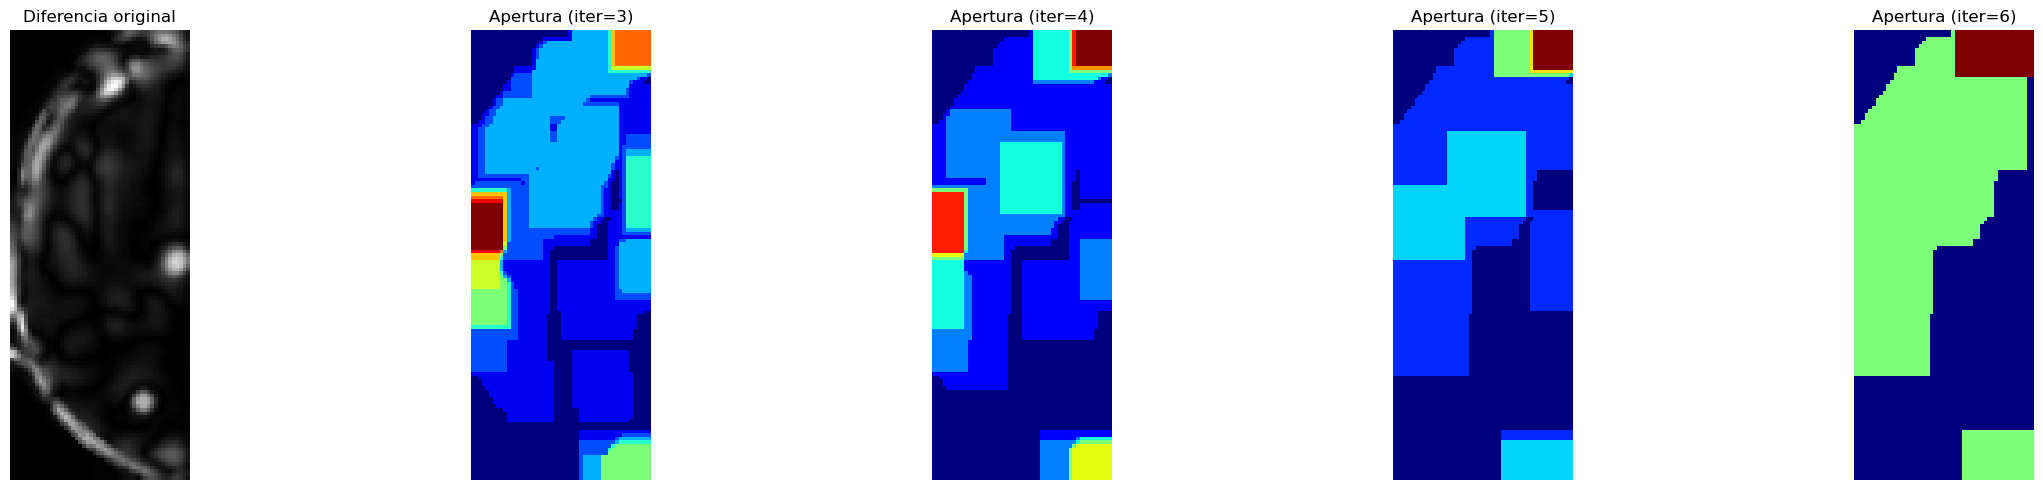

Archivo: N55.jpg


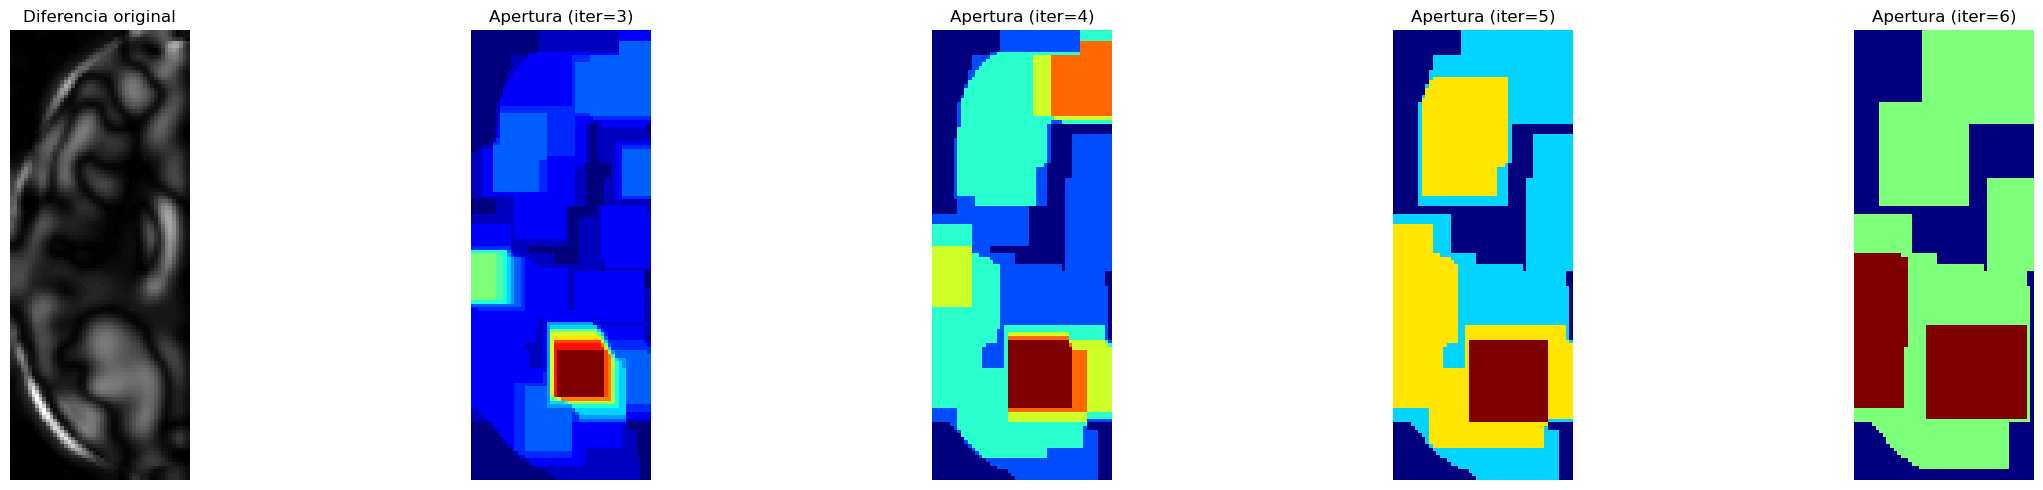

Archivo: N56.jpg


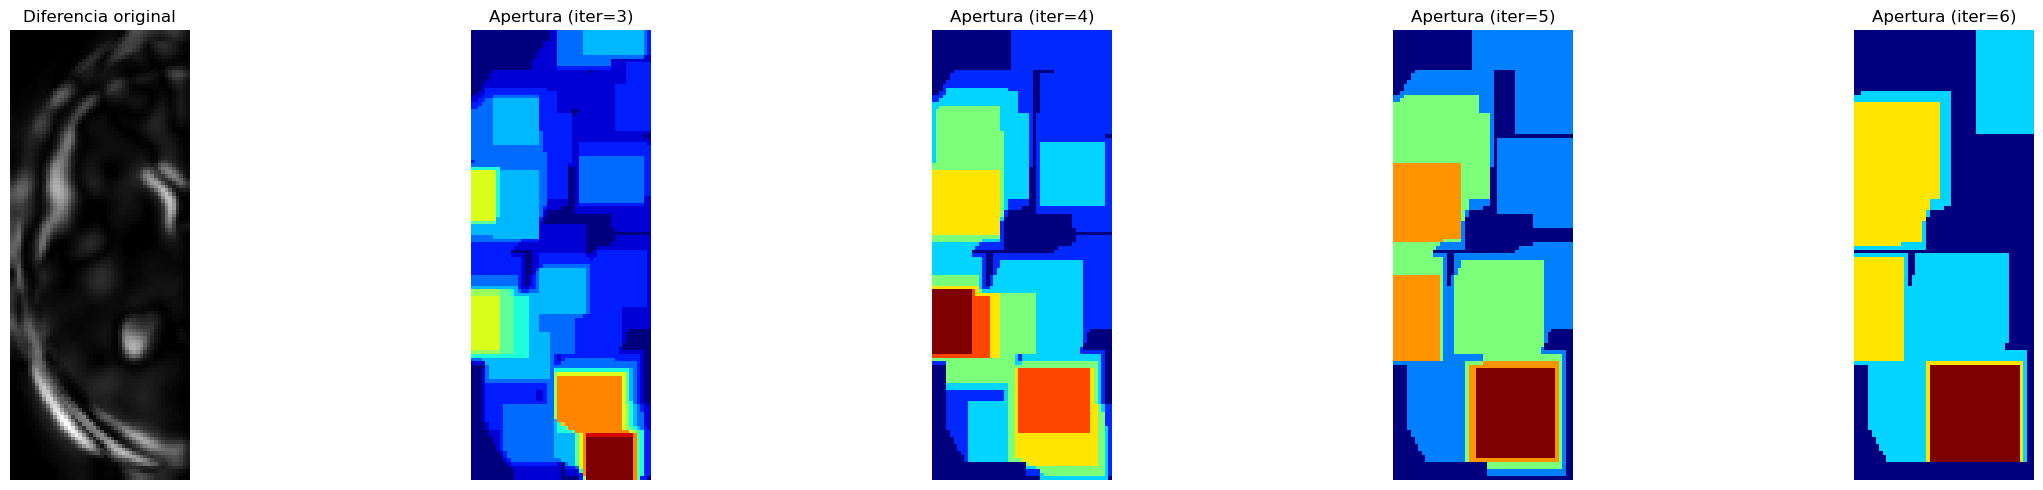

Archivo: N57.jpg


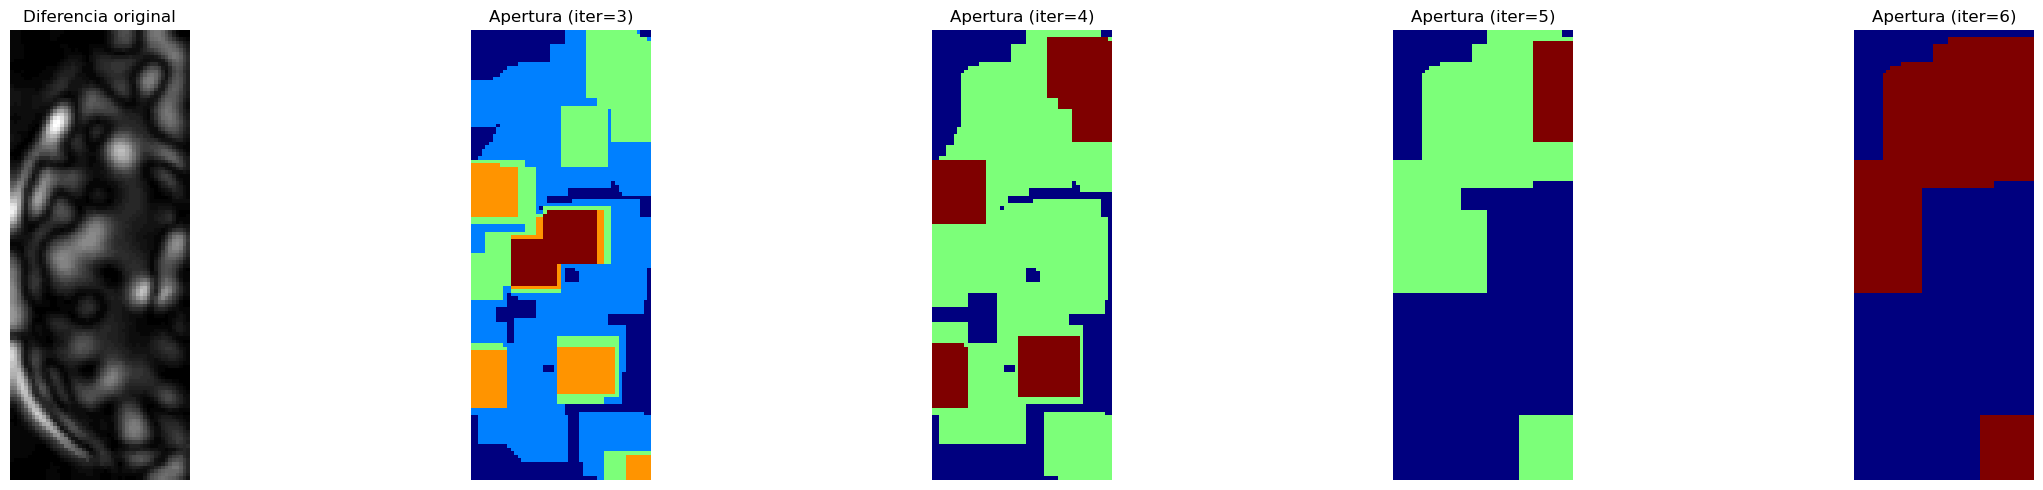

Archivo: N58.jpg


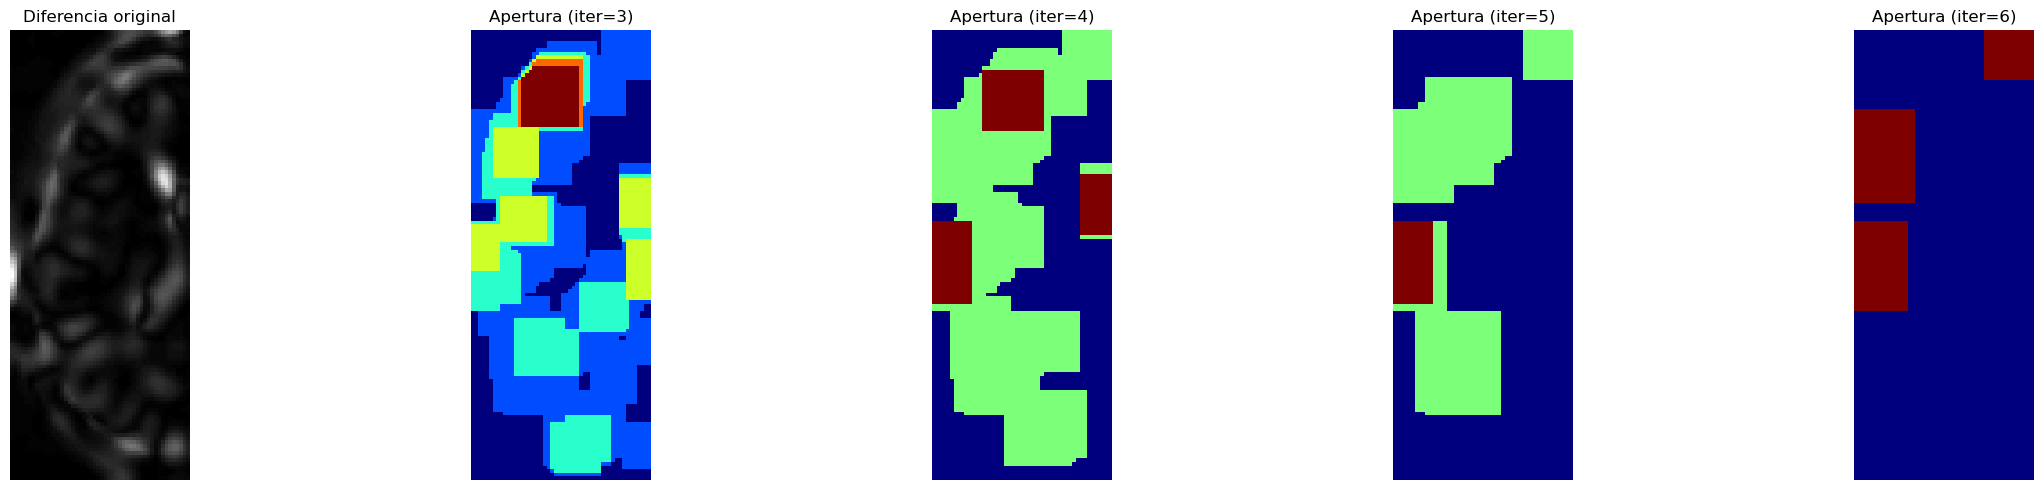

Archivo: N59.jpg


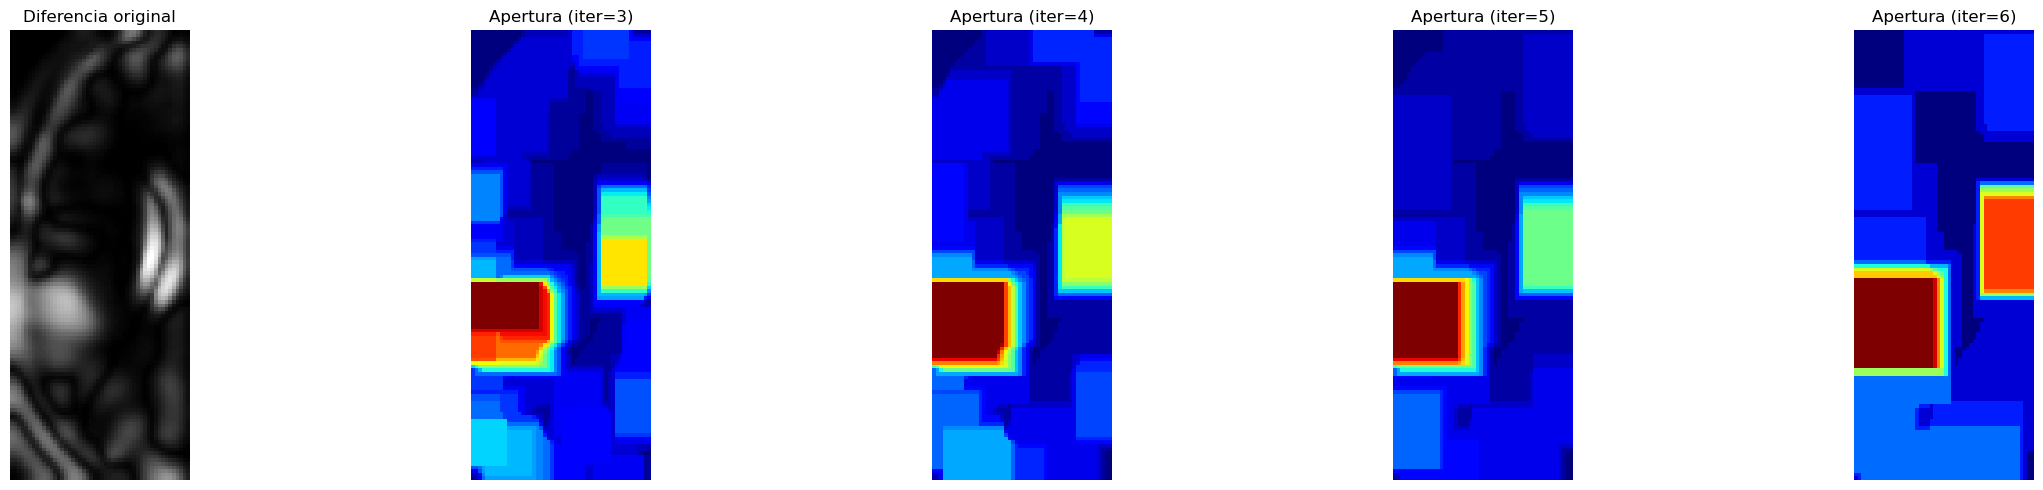

Archivo: N6.jpg


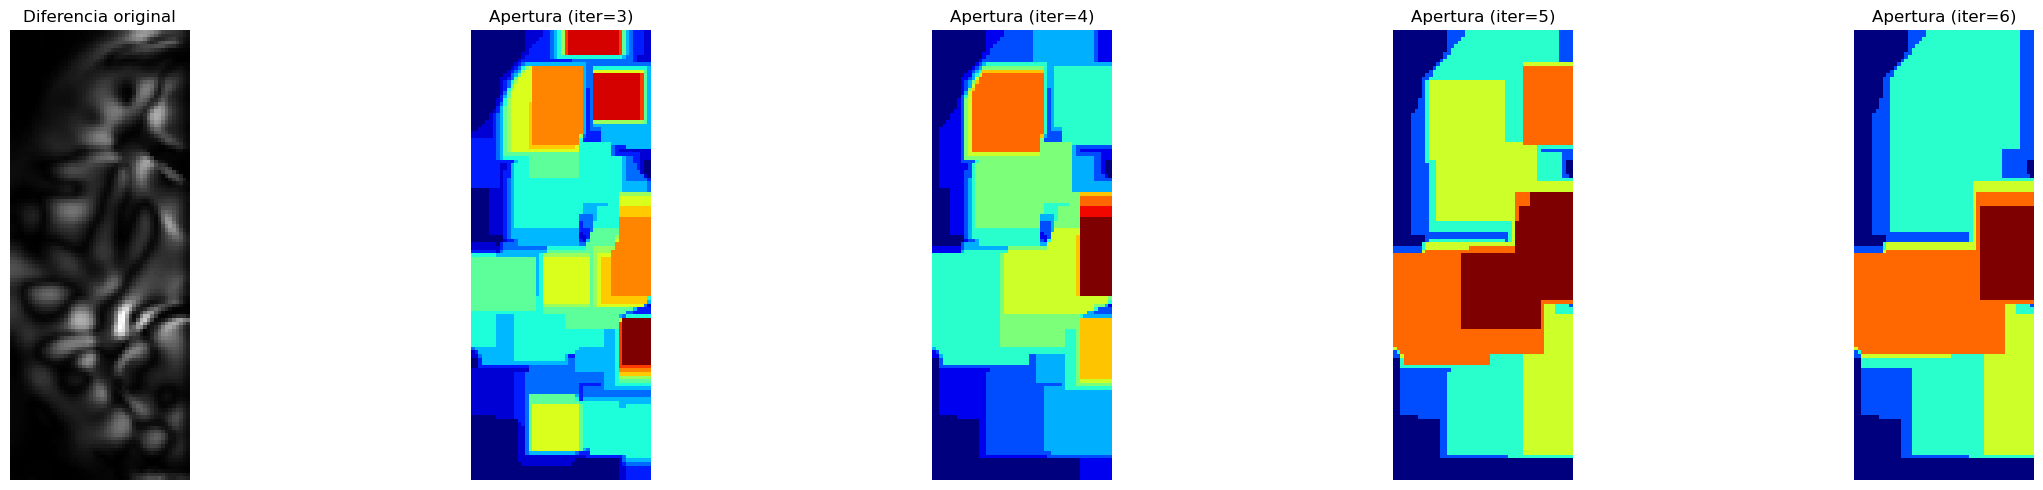

Archivo: N61.jpg


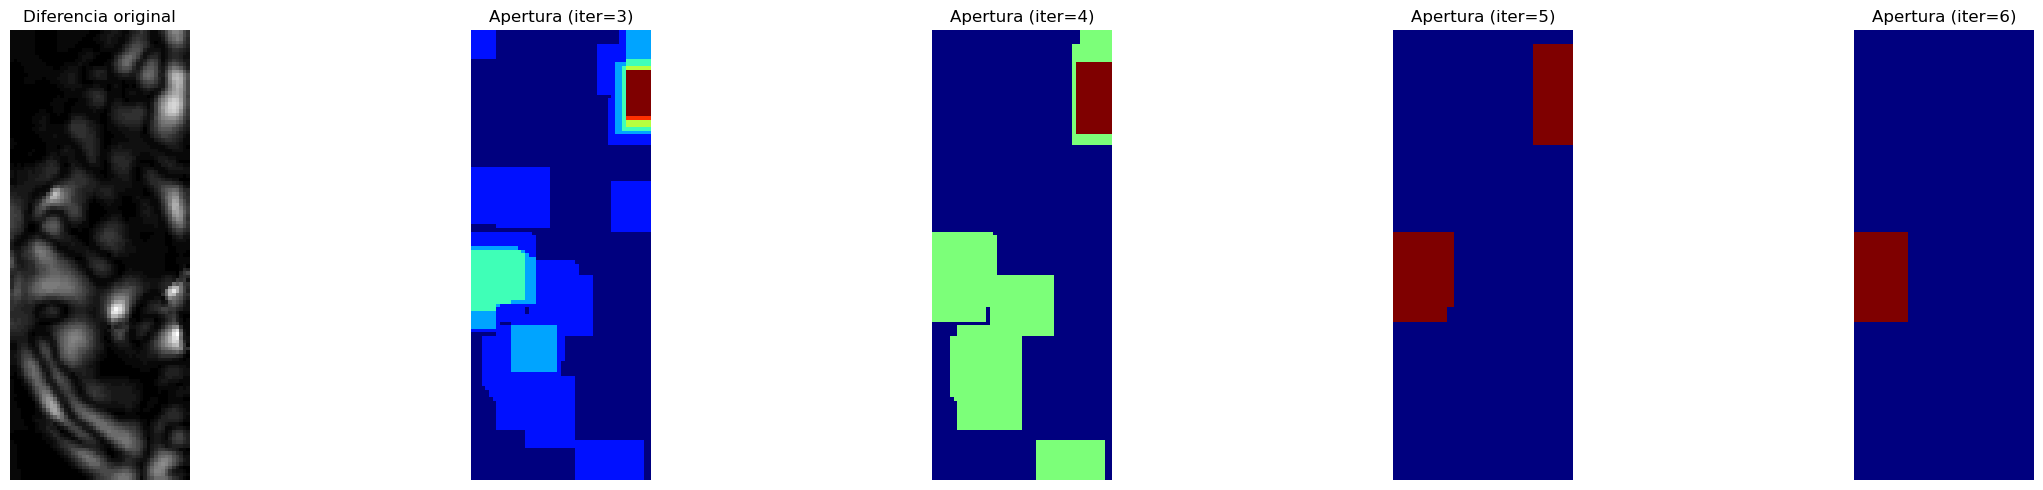

Archivo: N62.jpg


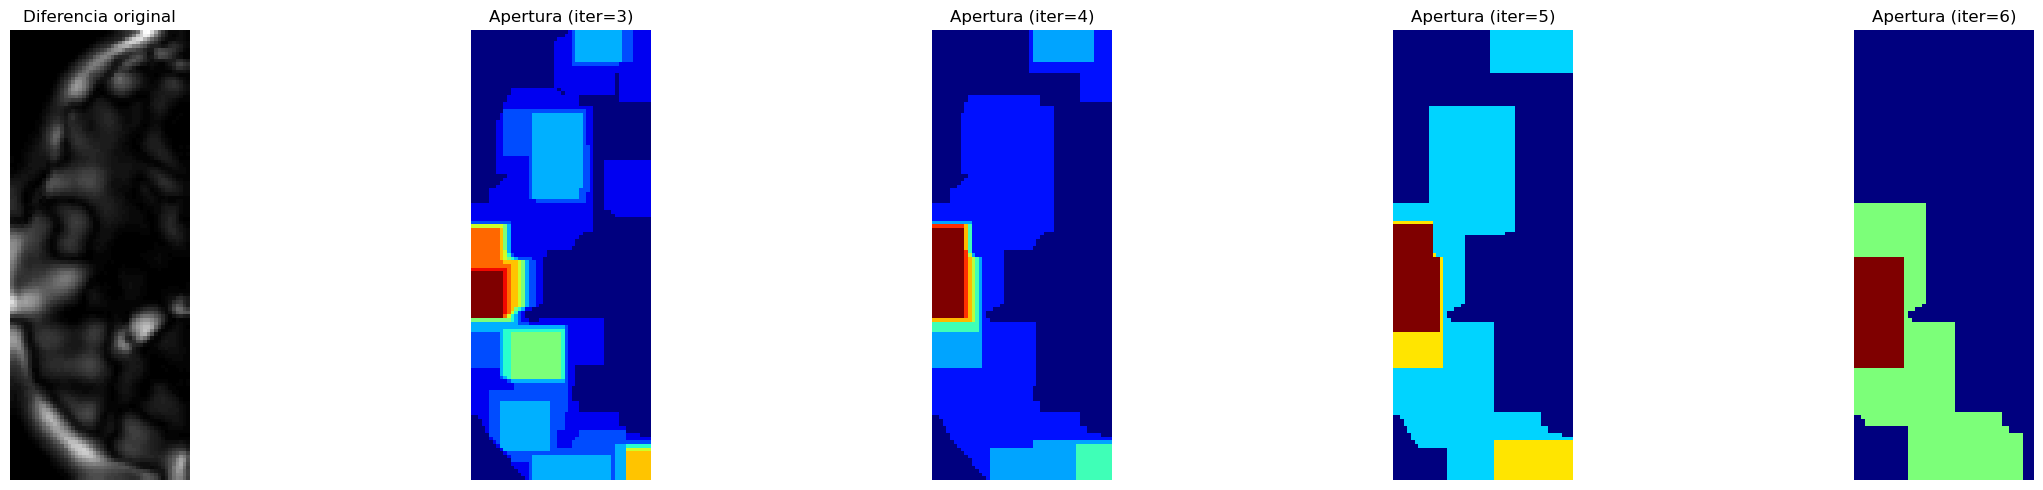

Archivo: N63.jpg


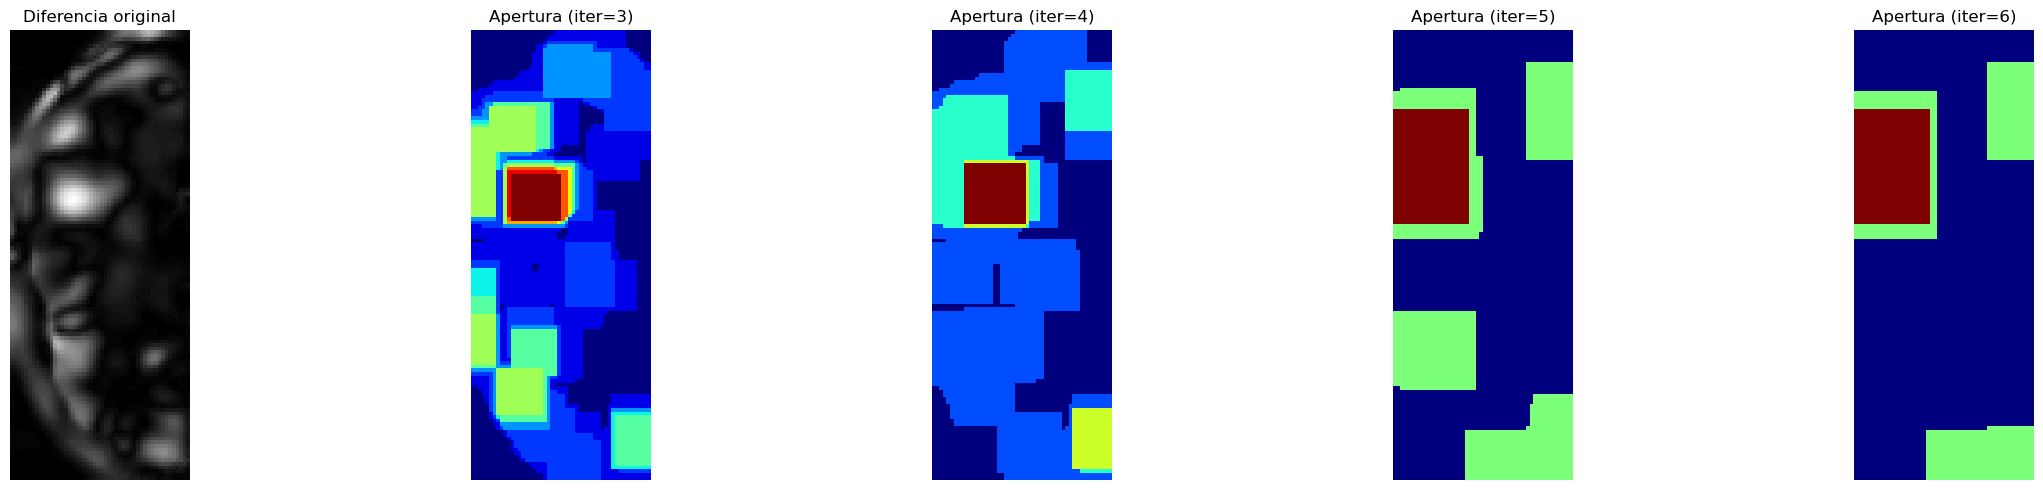

Archivo: N64.jpg


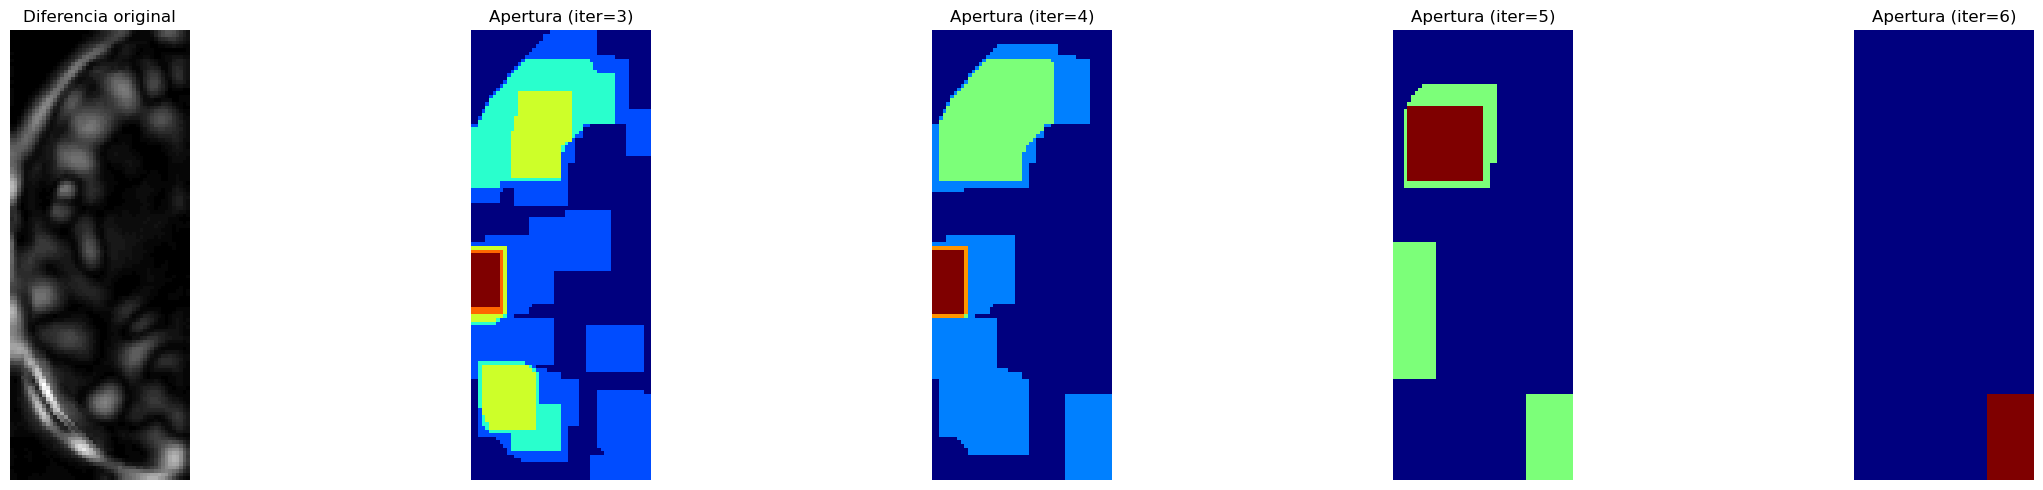

Archivo: N65.jpg


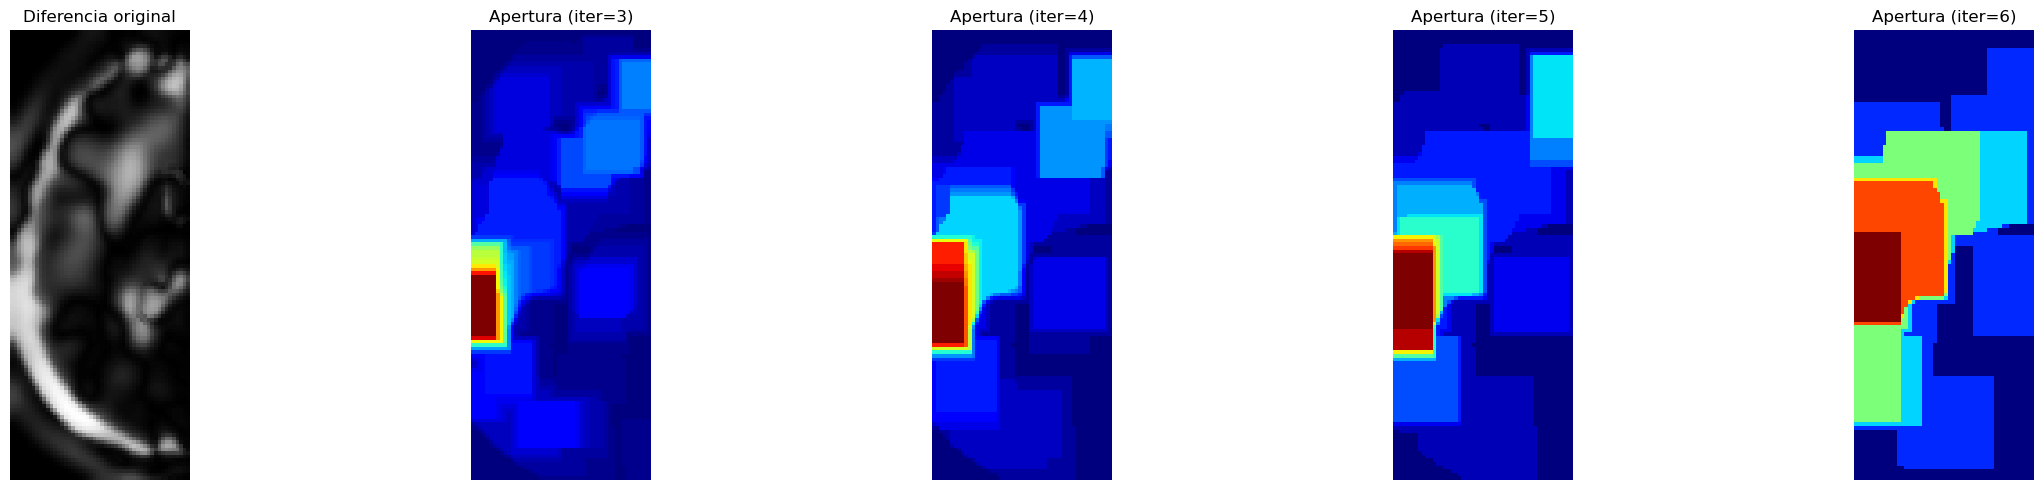

Archivo: N66.jpg


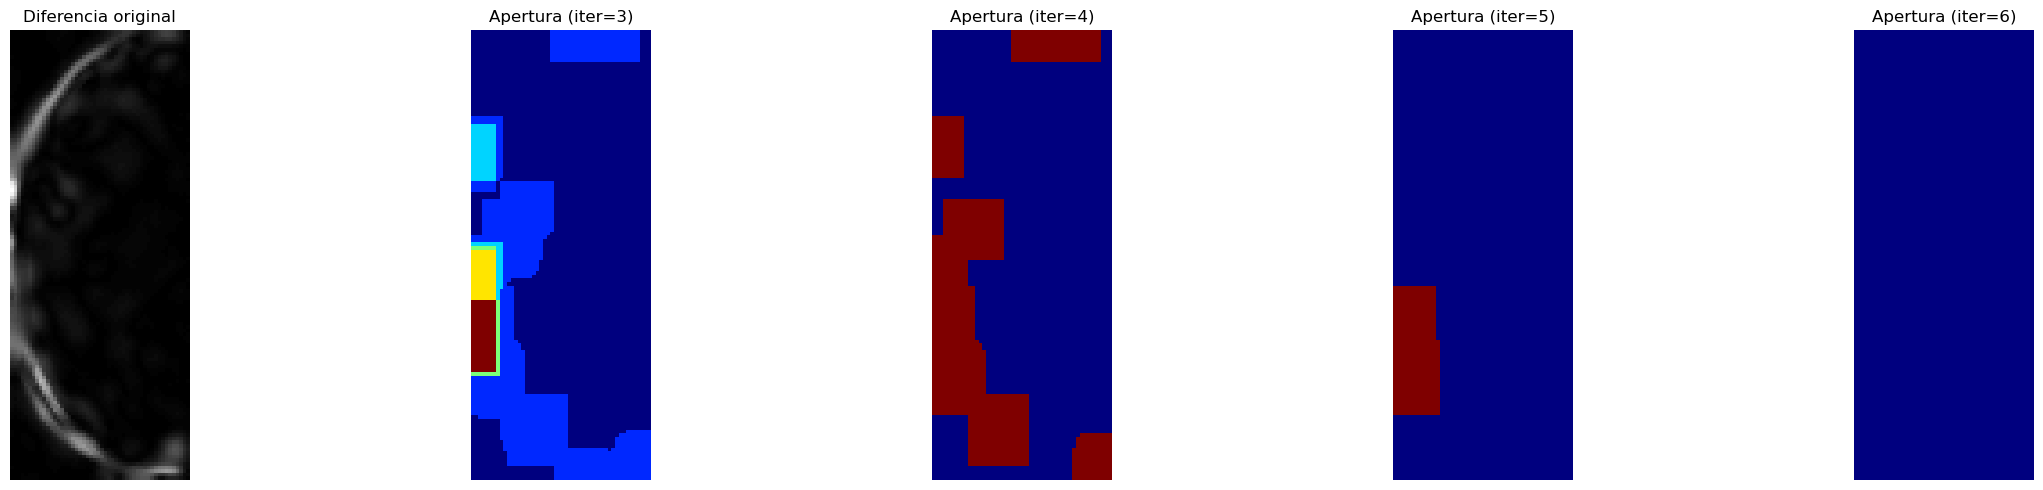

Archivo: N67.jpg


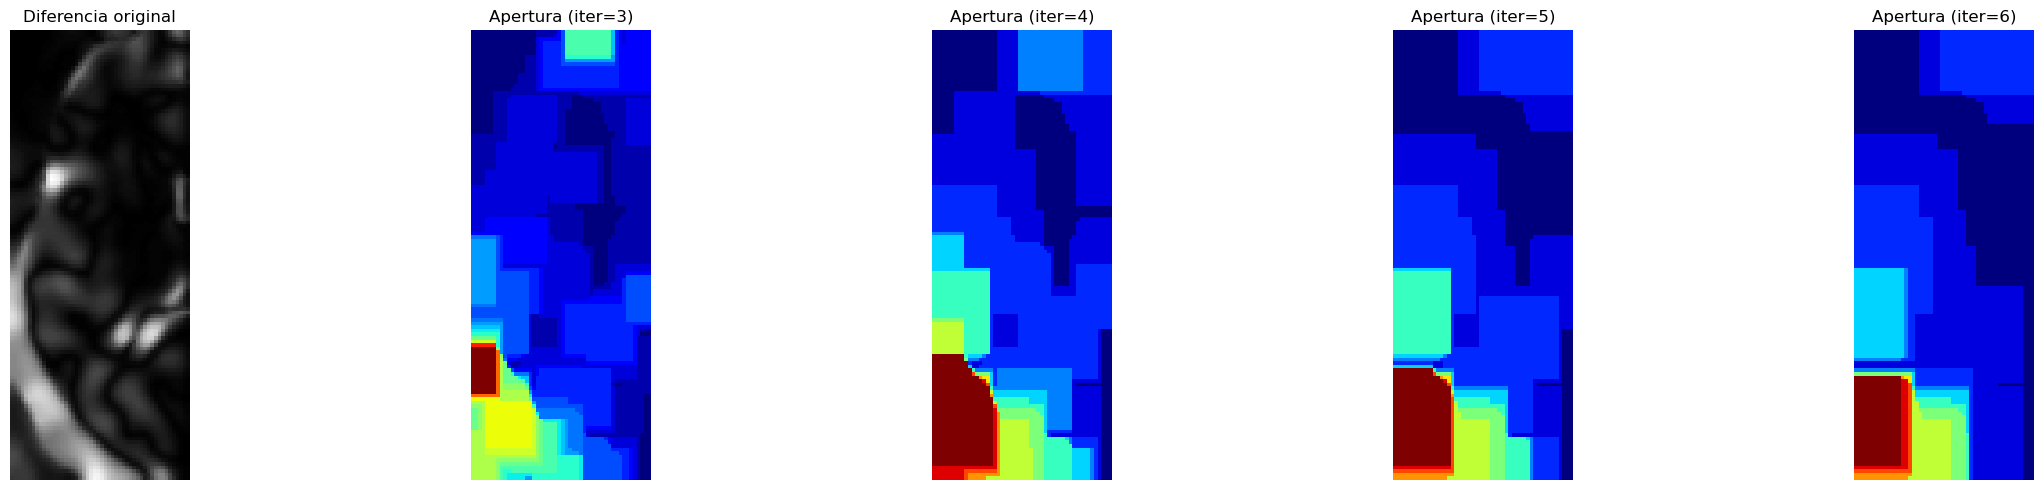

Archivo: N68.jpg


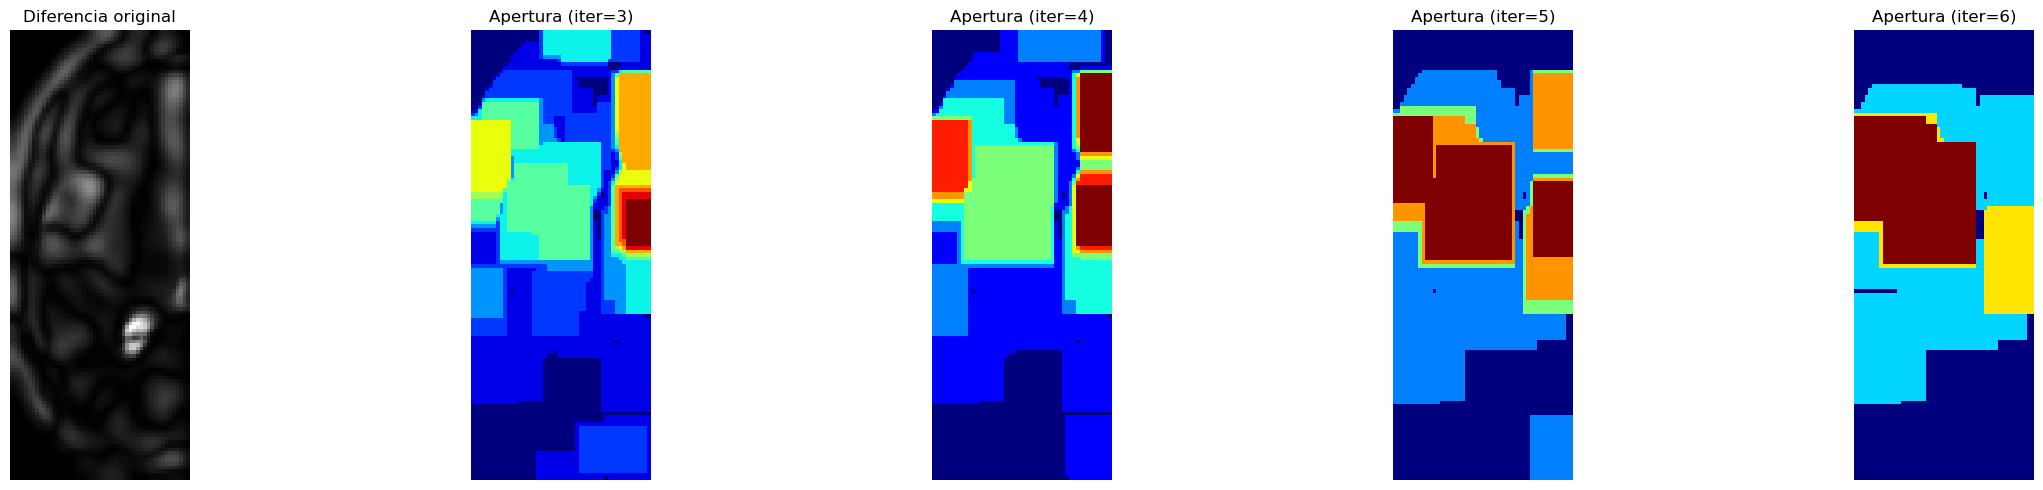

Archivo: N69.jpg


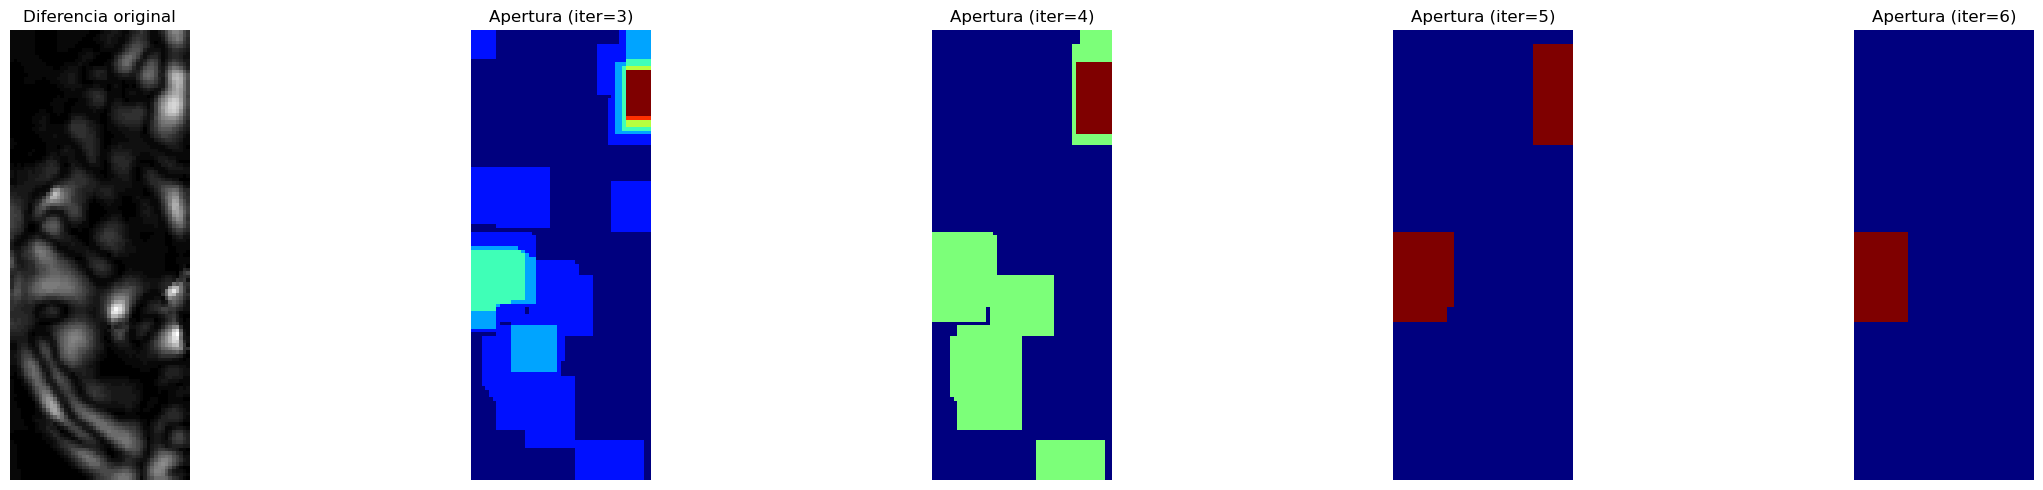

Archivo: N7.jpg


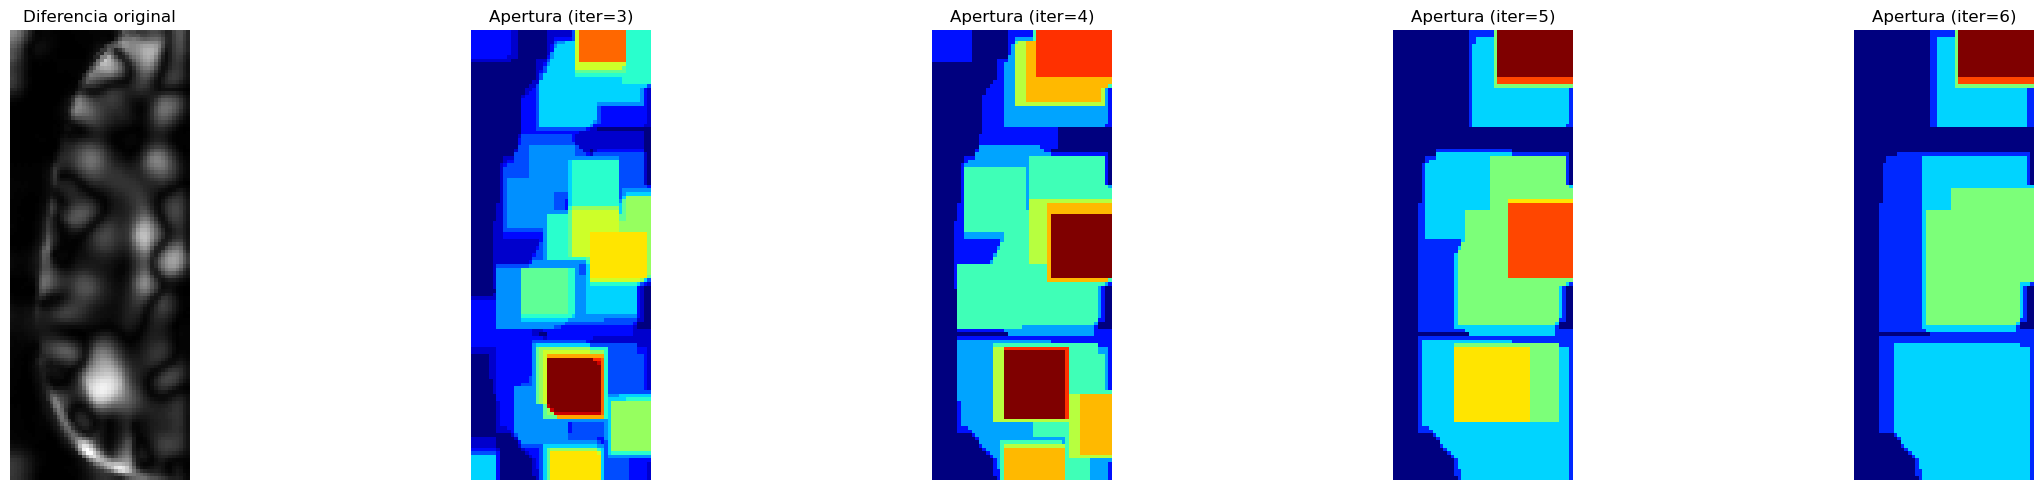

Archivo: N70.jpg


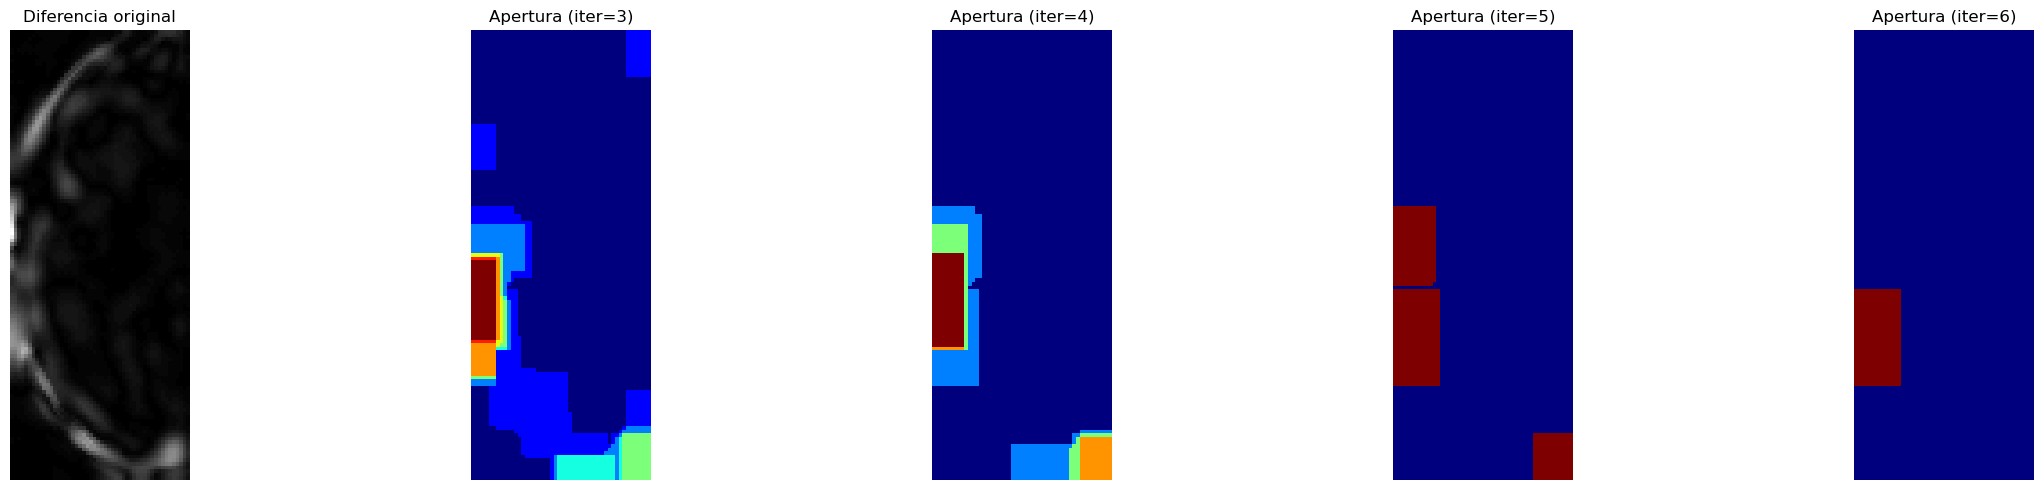

Archivo: N71.jpg


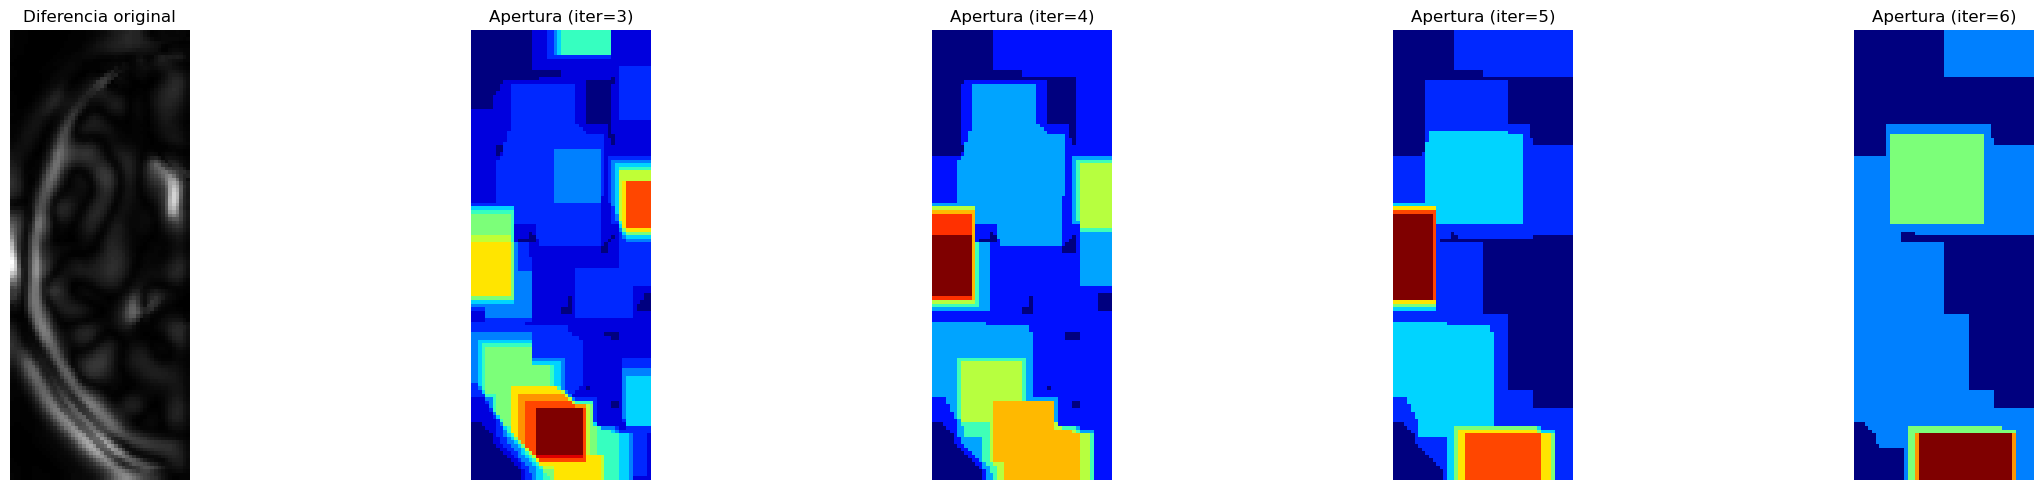

Archivo: N72.jpg


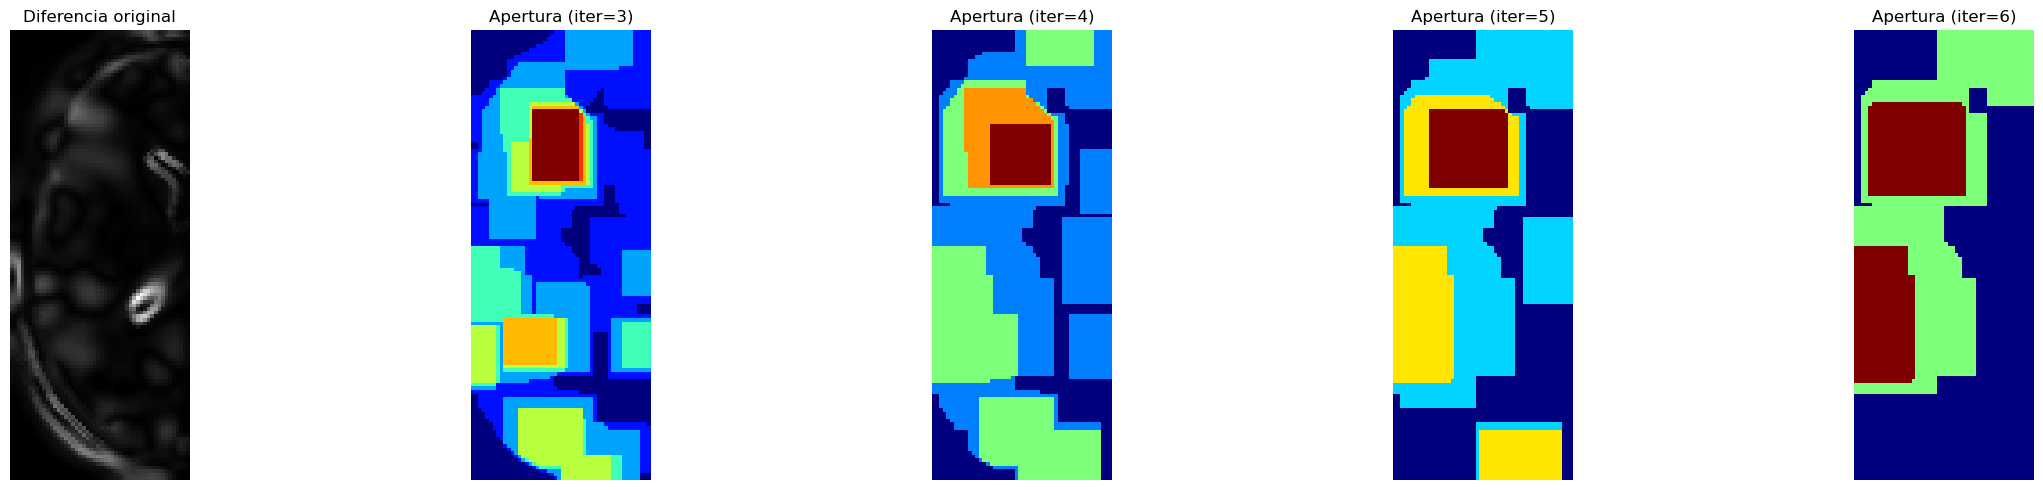

Archivo: N73.jpg


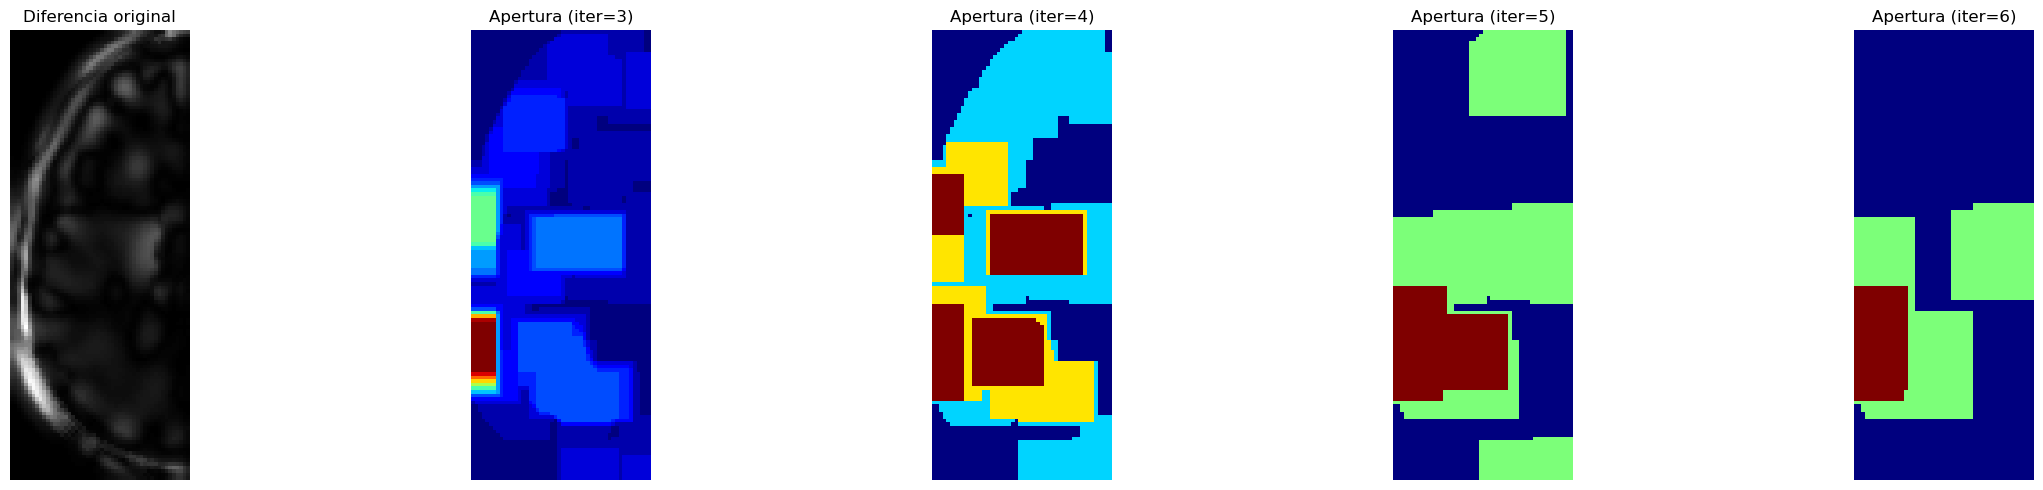

Archivo: N74.jpg


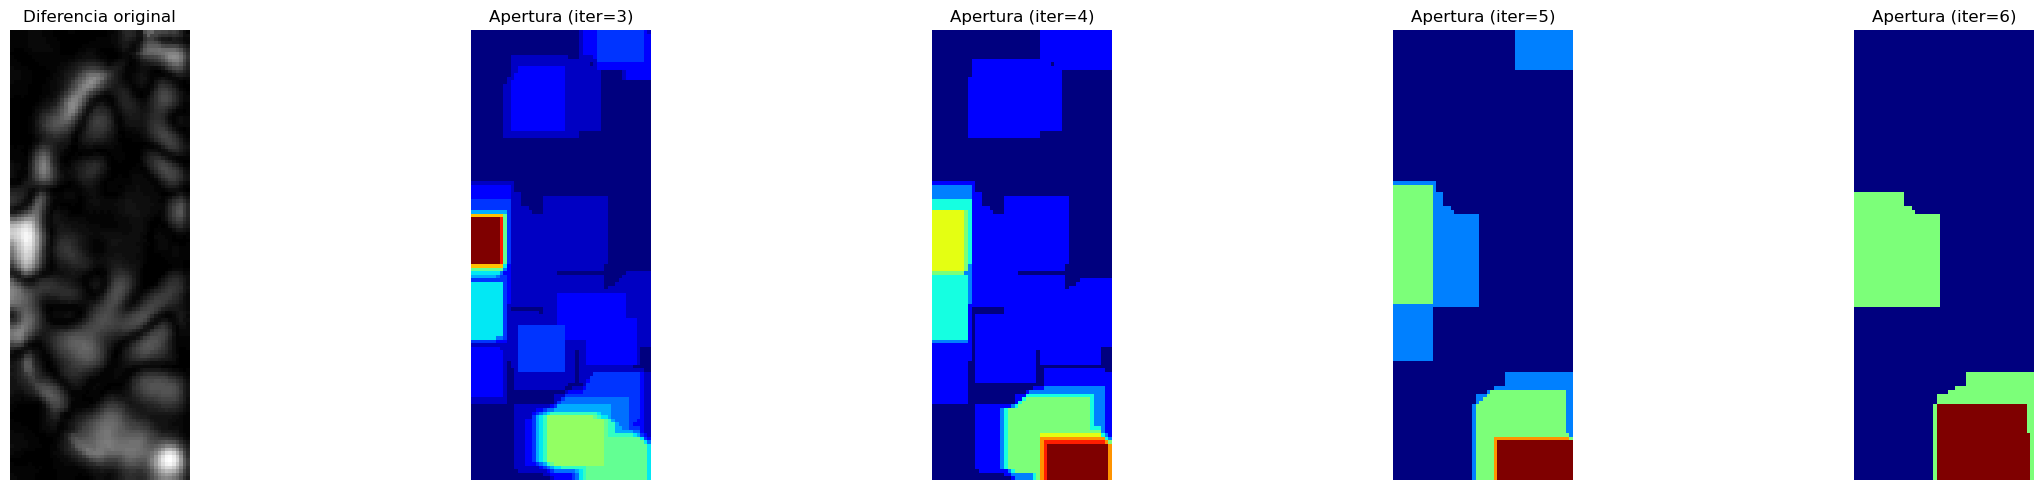

Archivo: N75.jpg


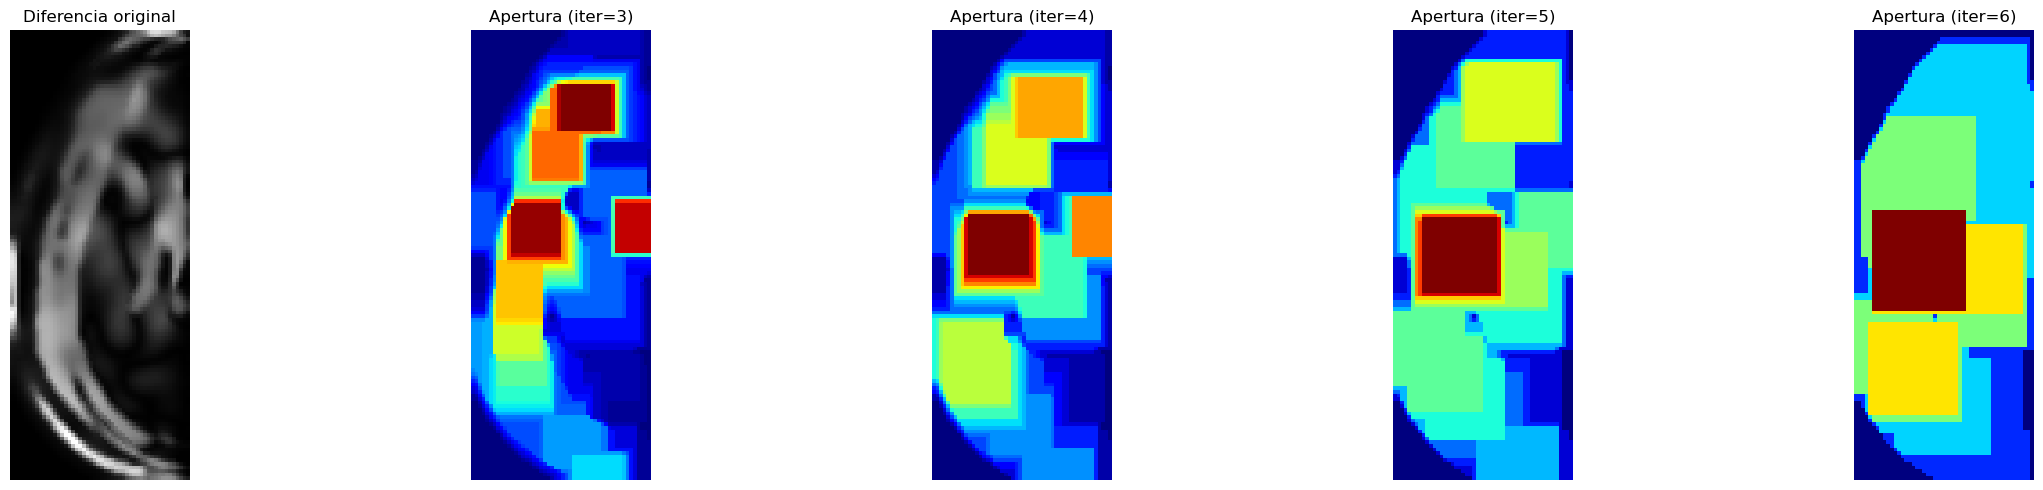

Archivo: N76.jpg


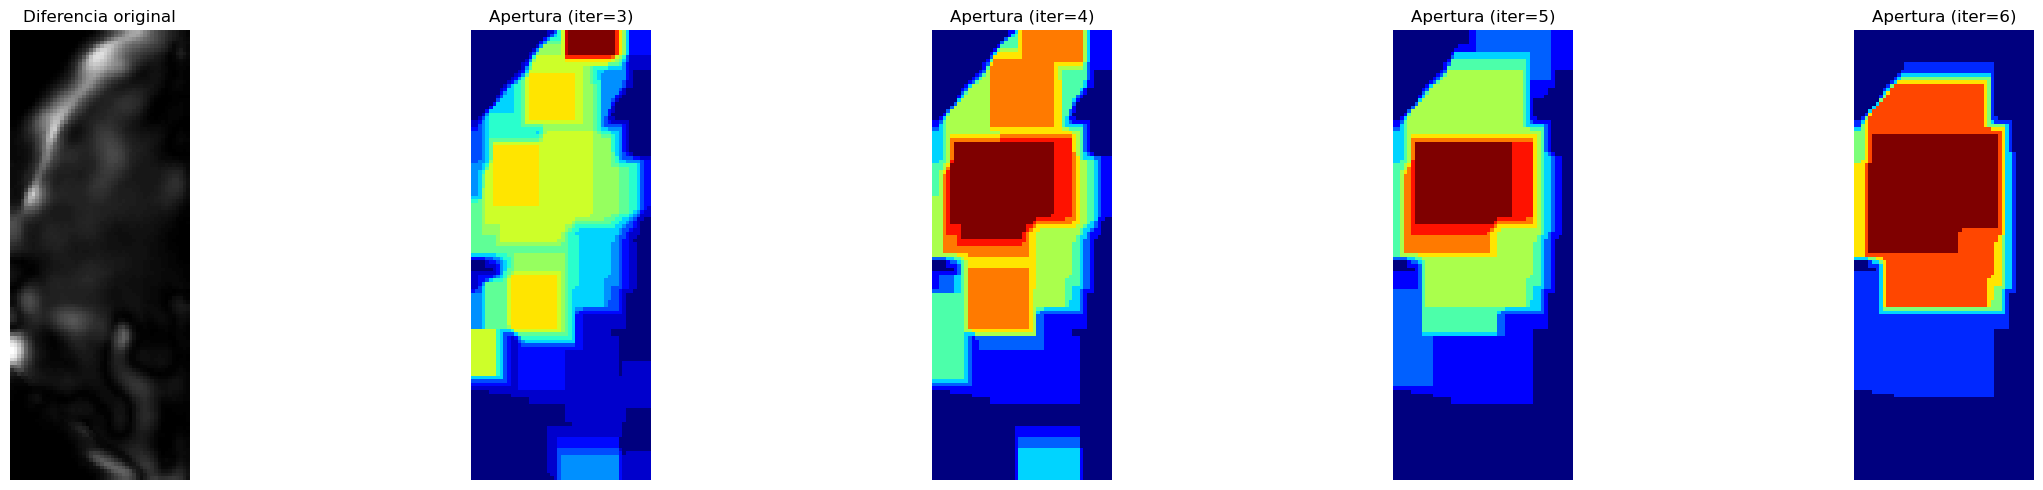

Archivo: N77.jpg


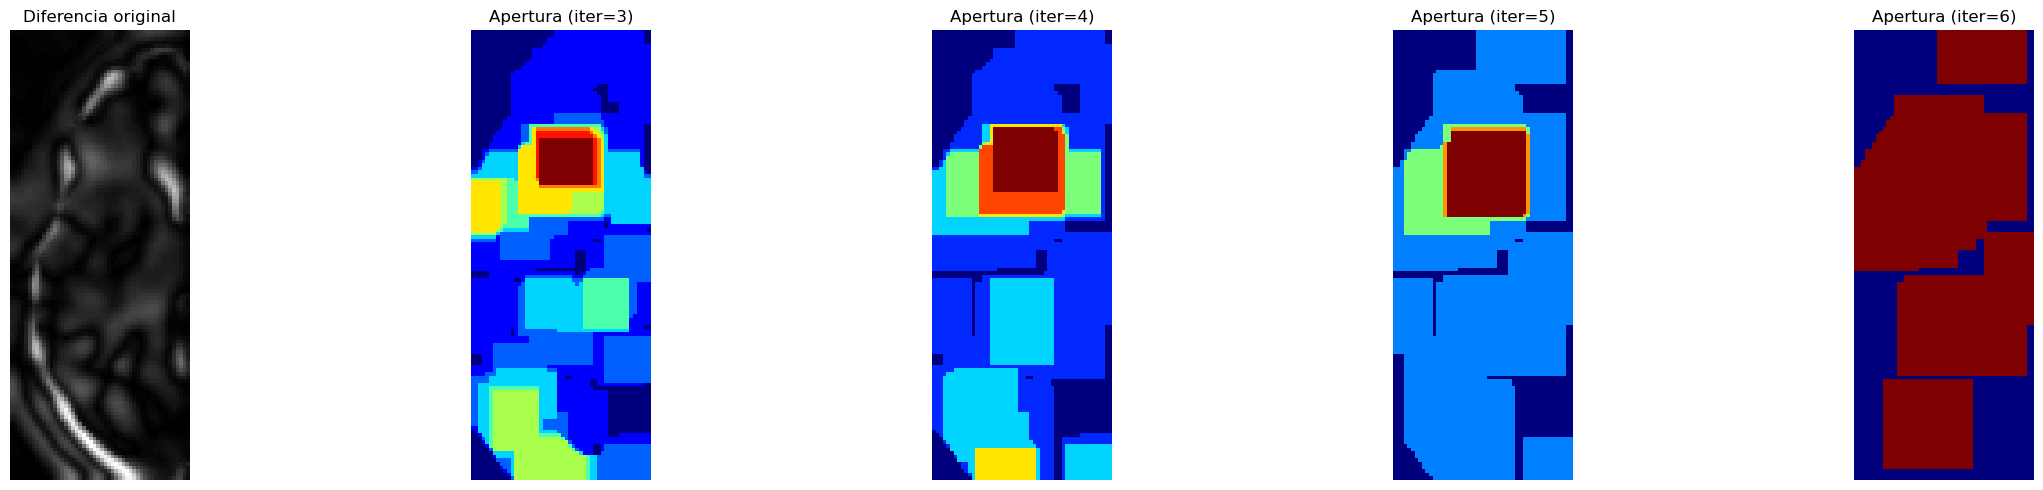

Archivo: N78.jpg


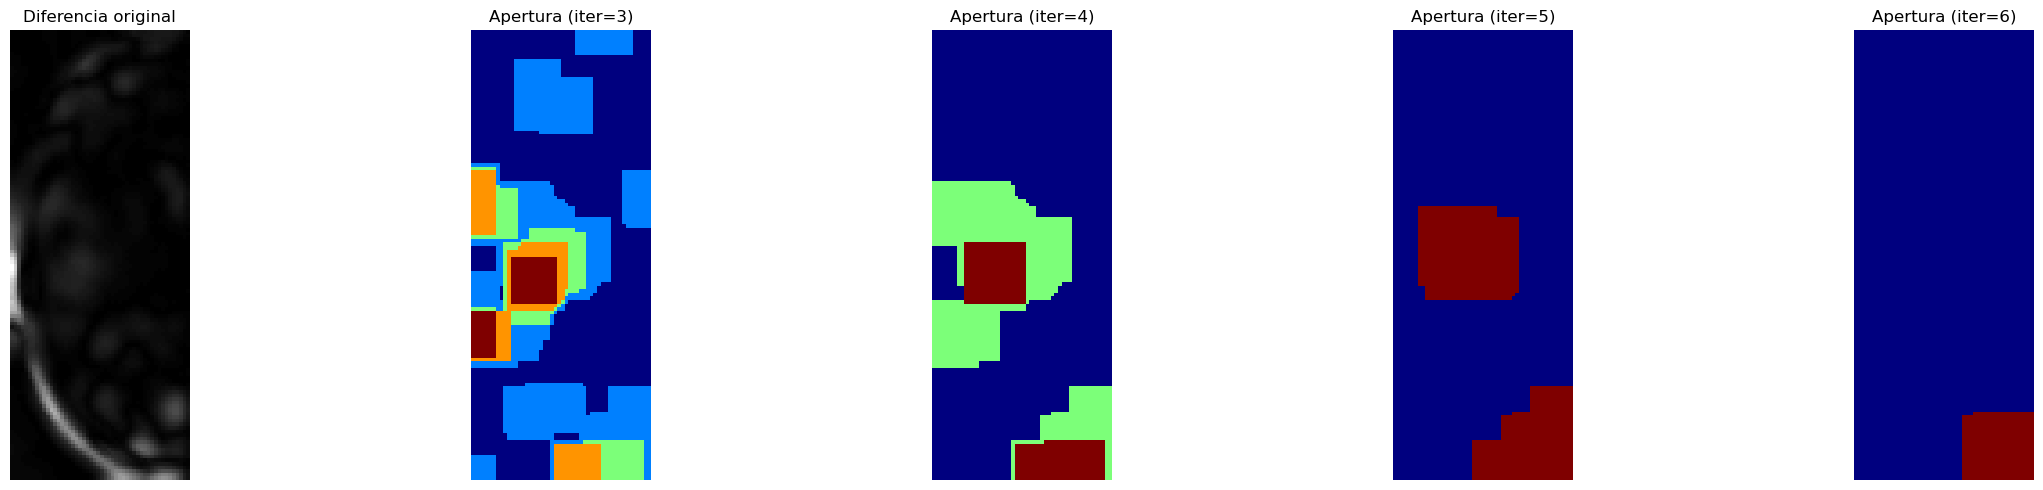

Archivo: N79.jpg


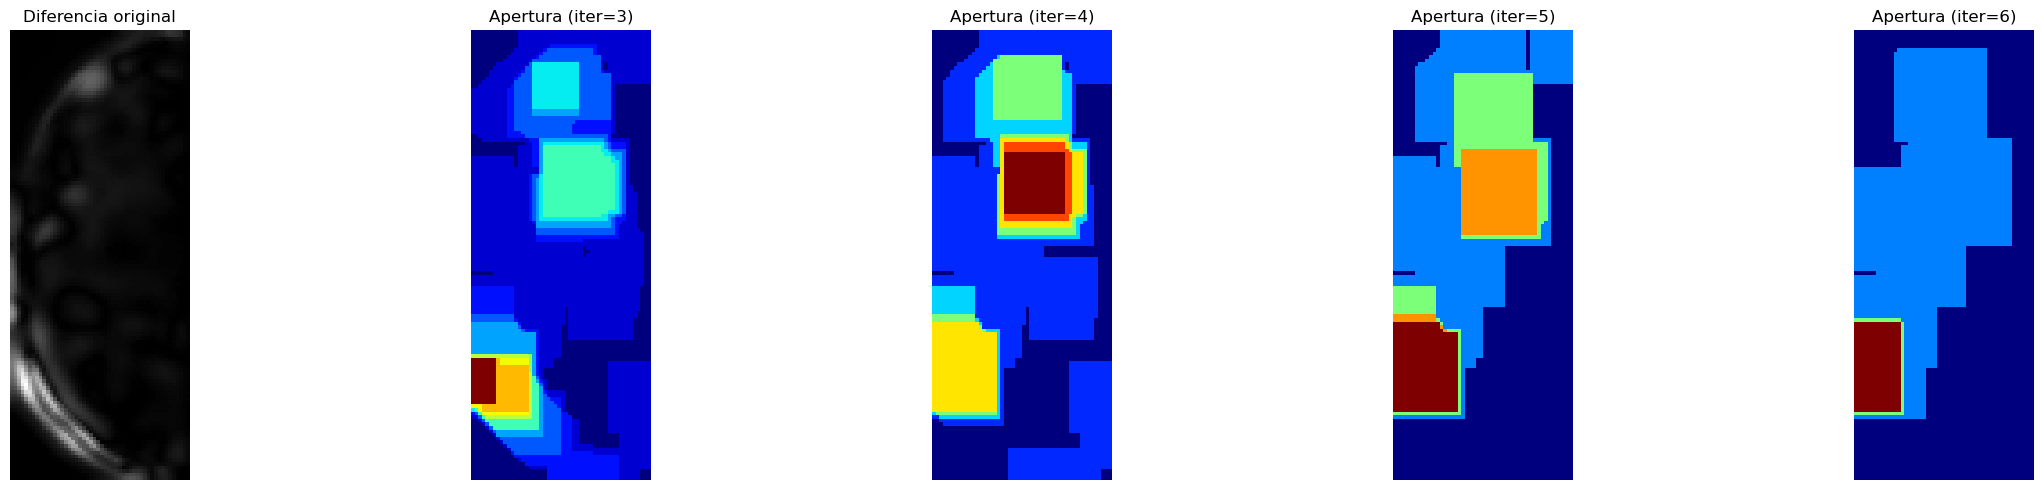

Archivo: N8.jpg


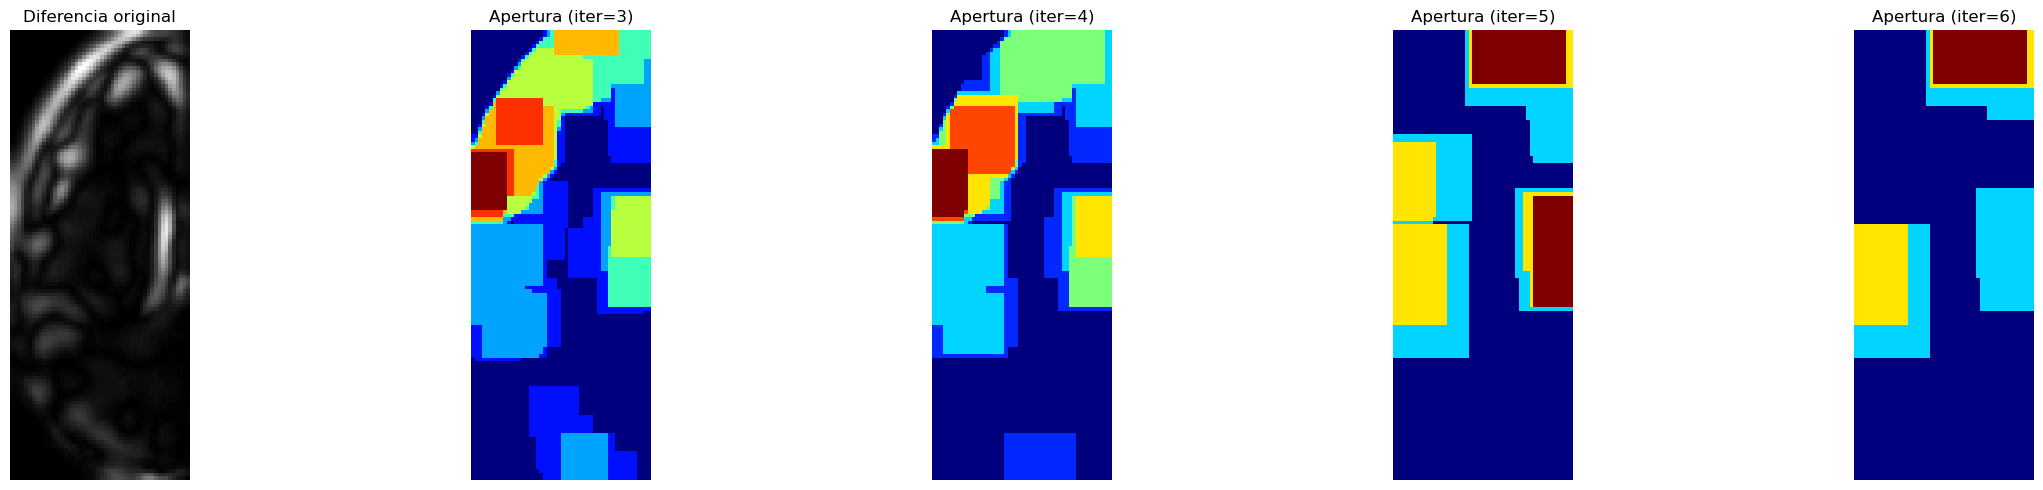

Archivo: N80.jpg


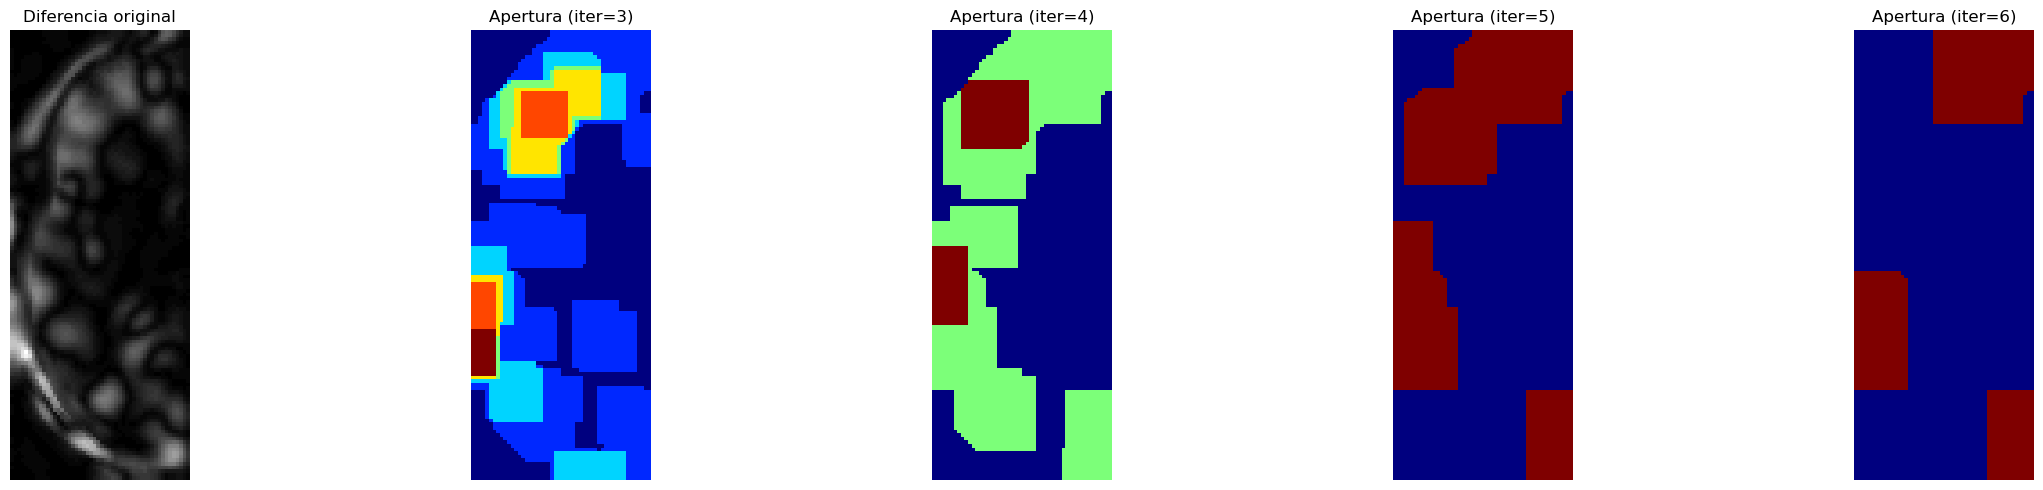

Archivo: N81.jpg


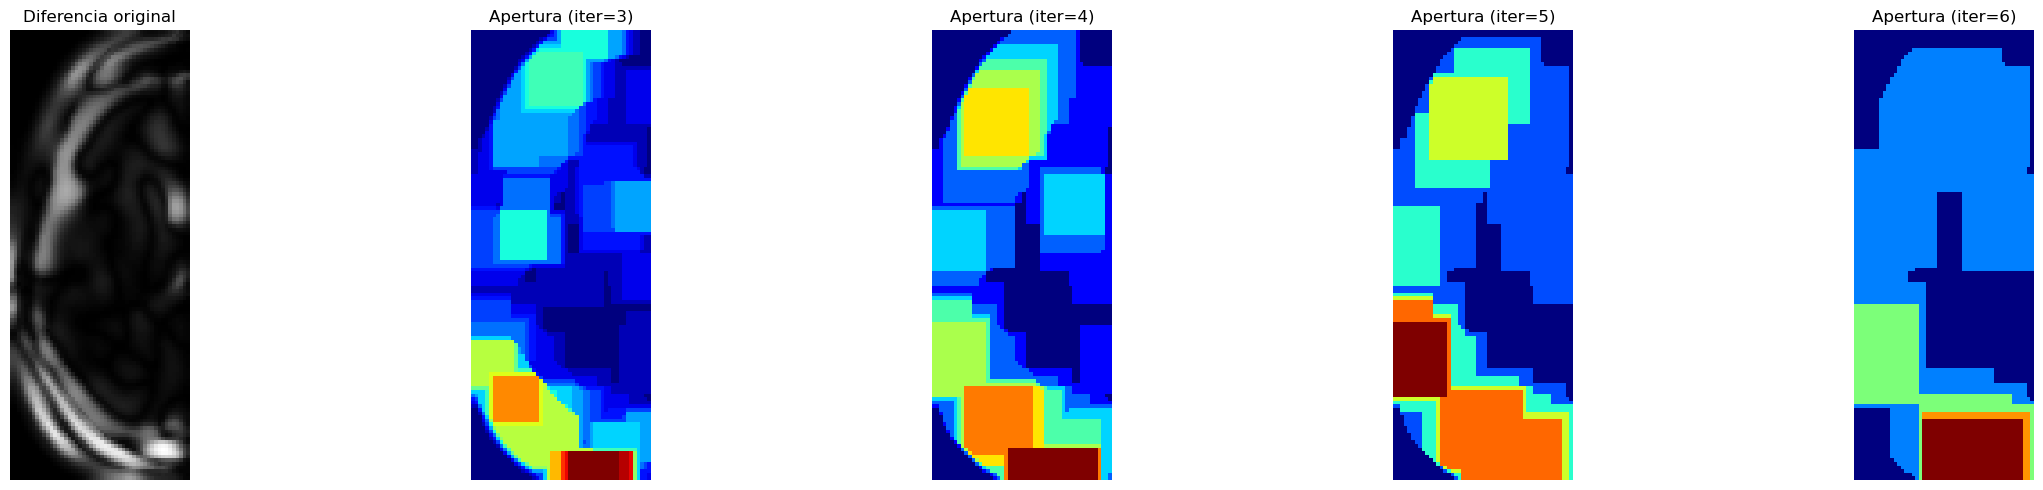

Archivo: N82.jpg


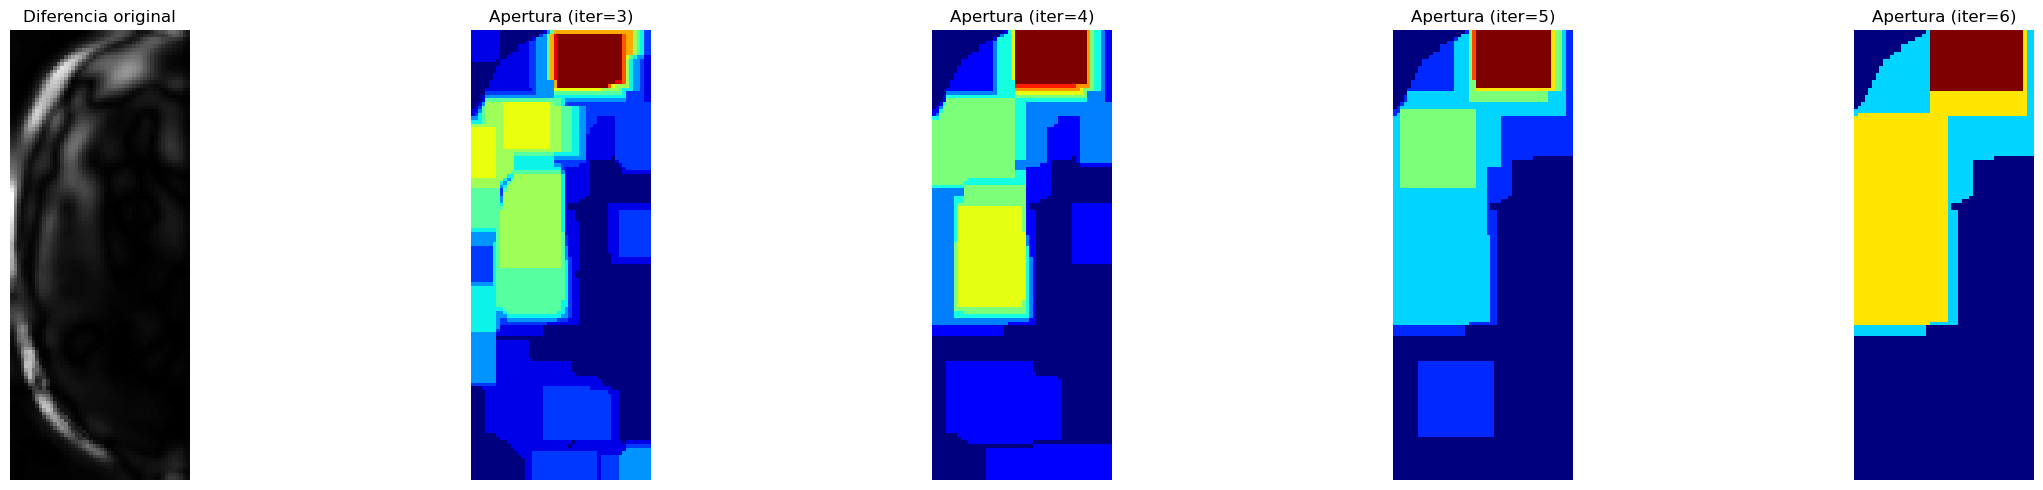

Archivo: N83.jpg


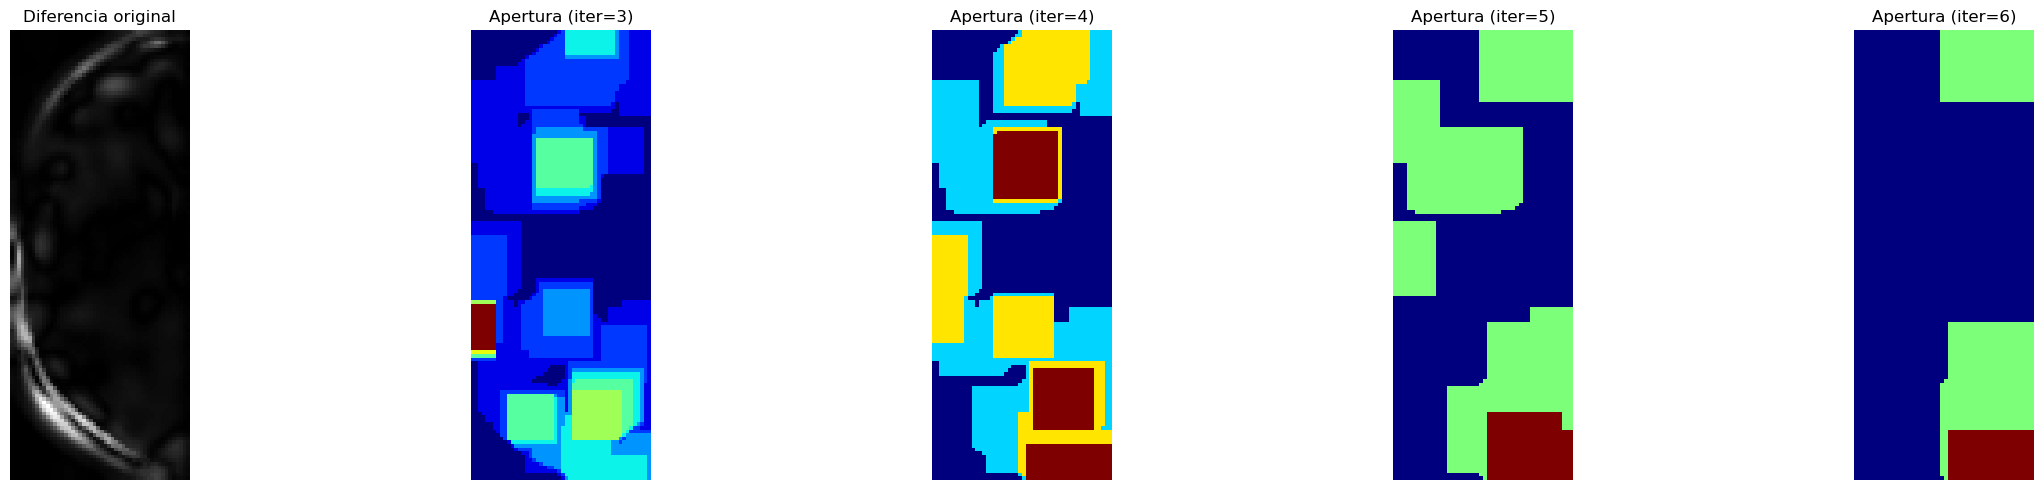

Archivo: N84.jpg


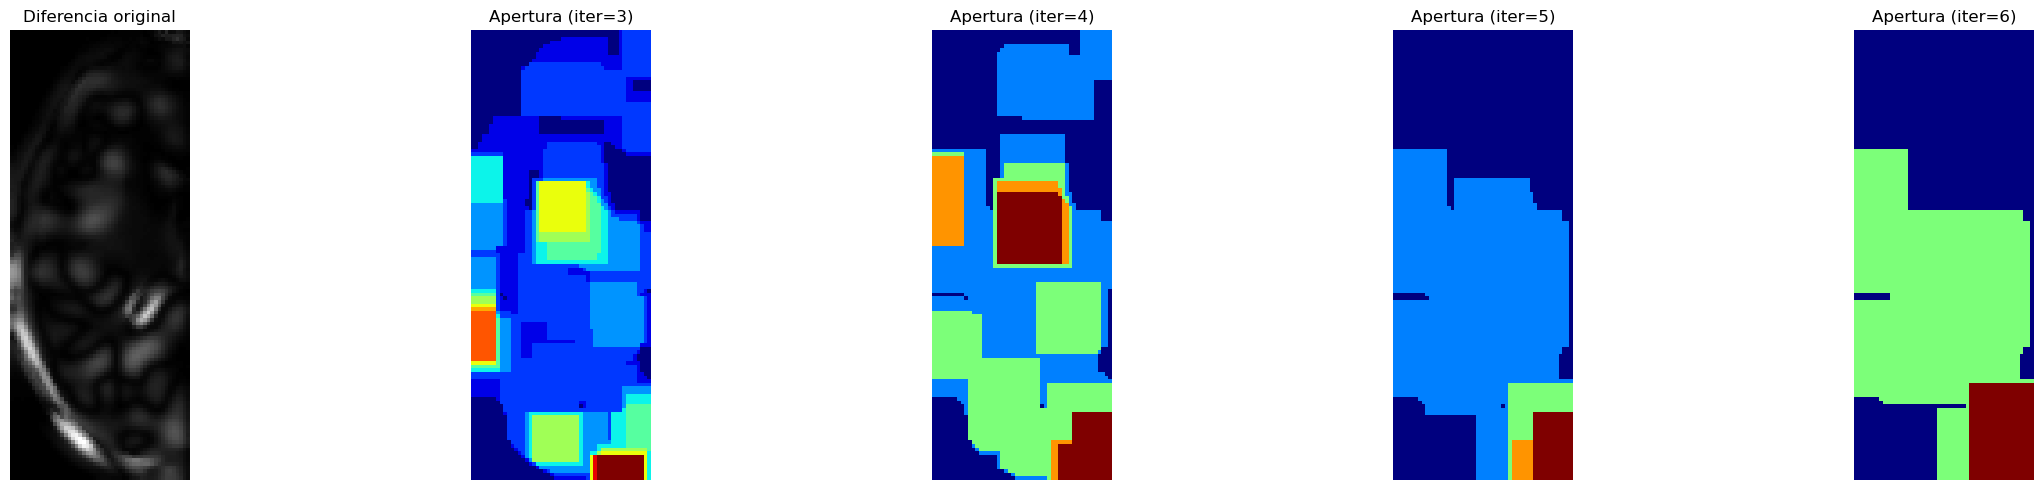

Archivo: N85.jpg


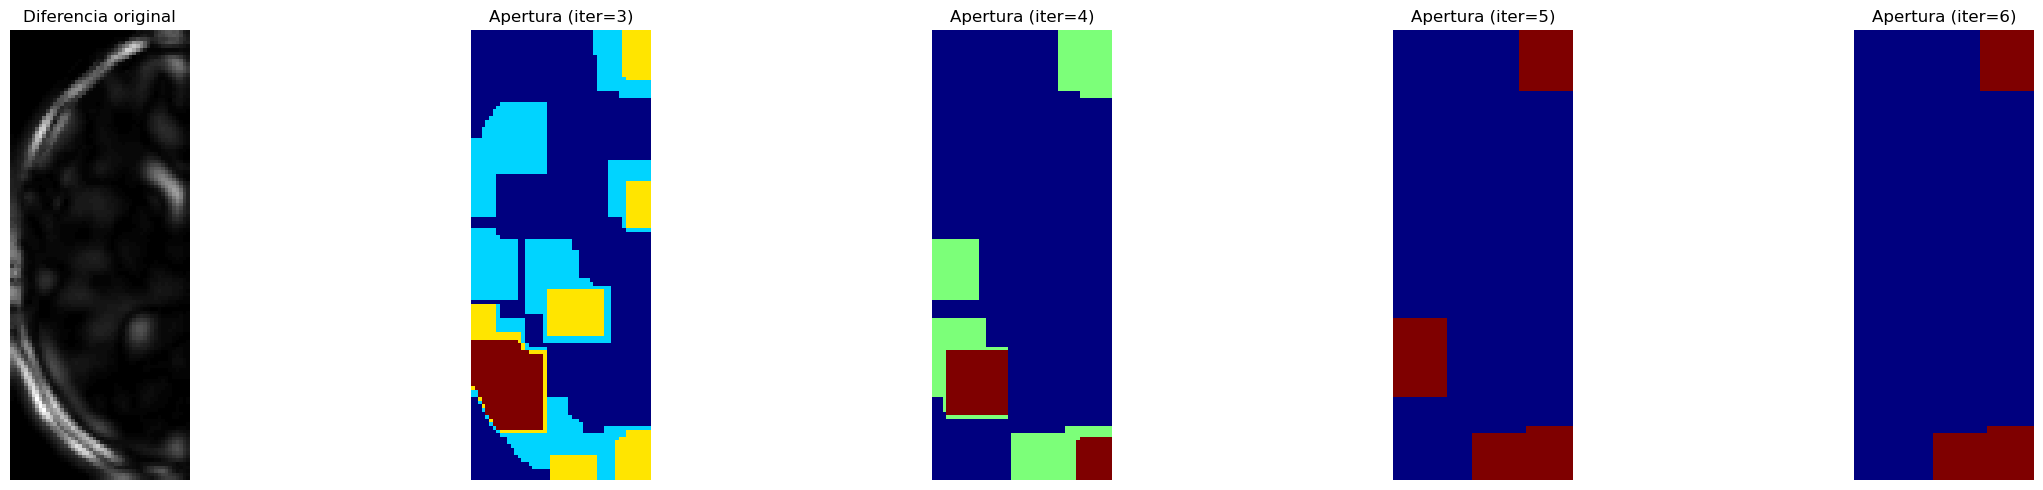

Archivo: N86.jpg


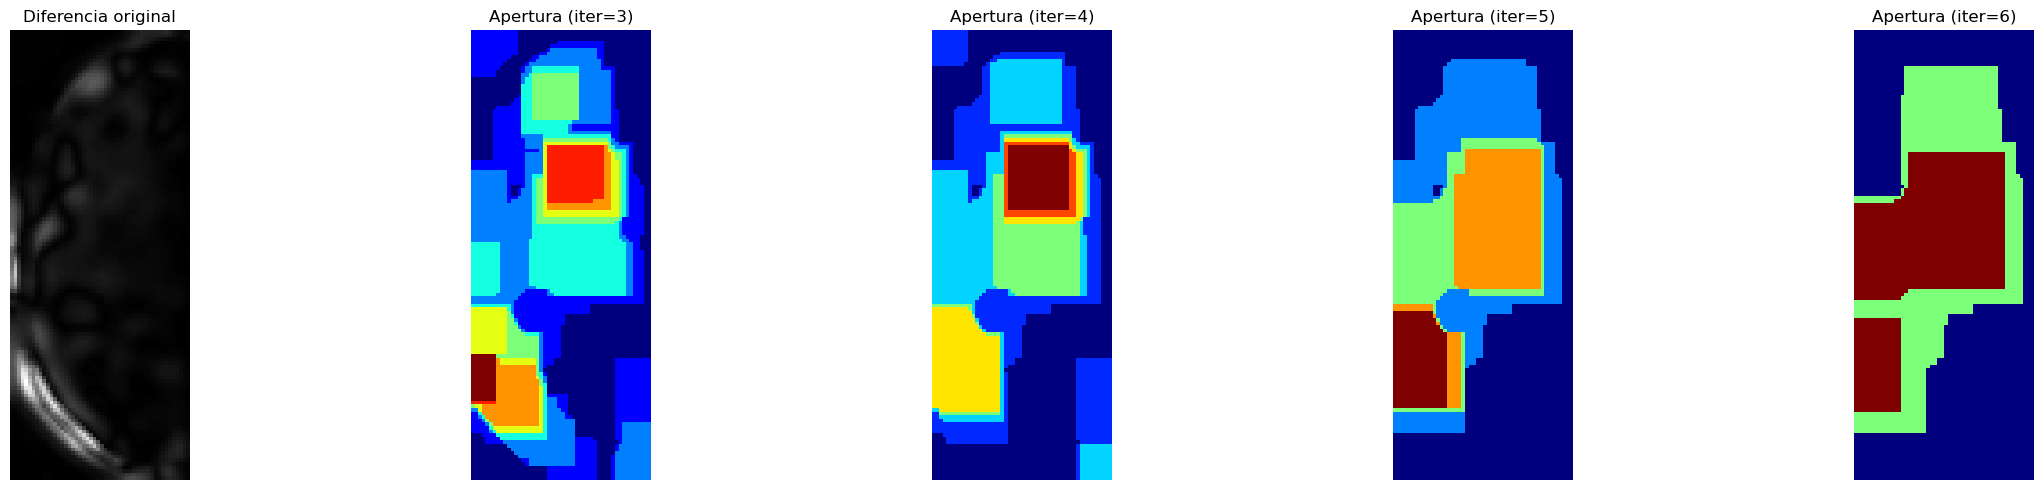

Archivo: N87.jpg


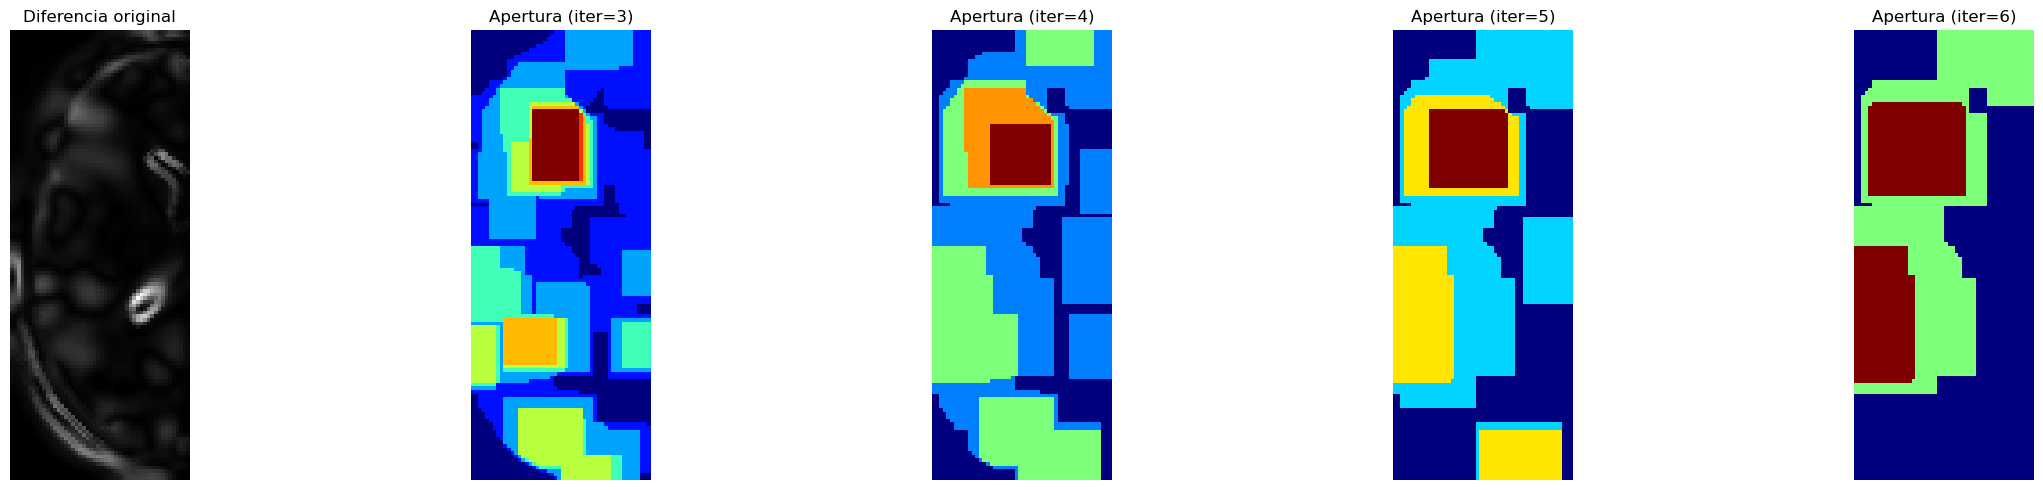

Archivo: N88.jpg


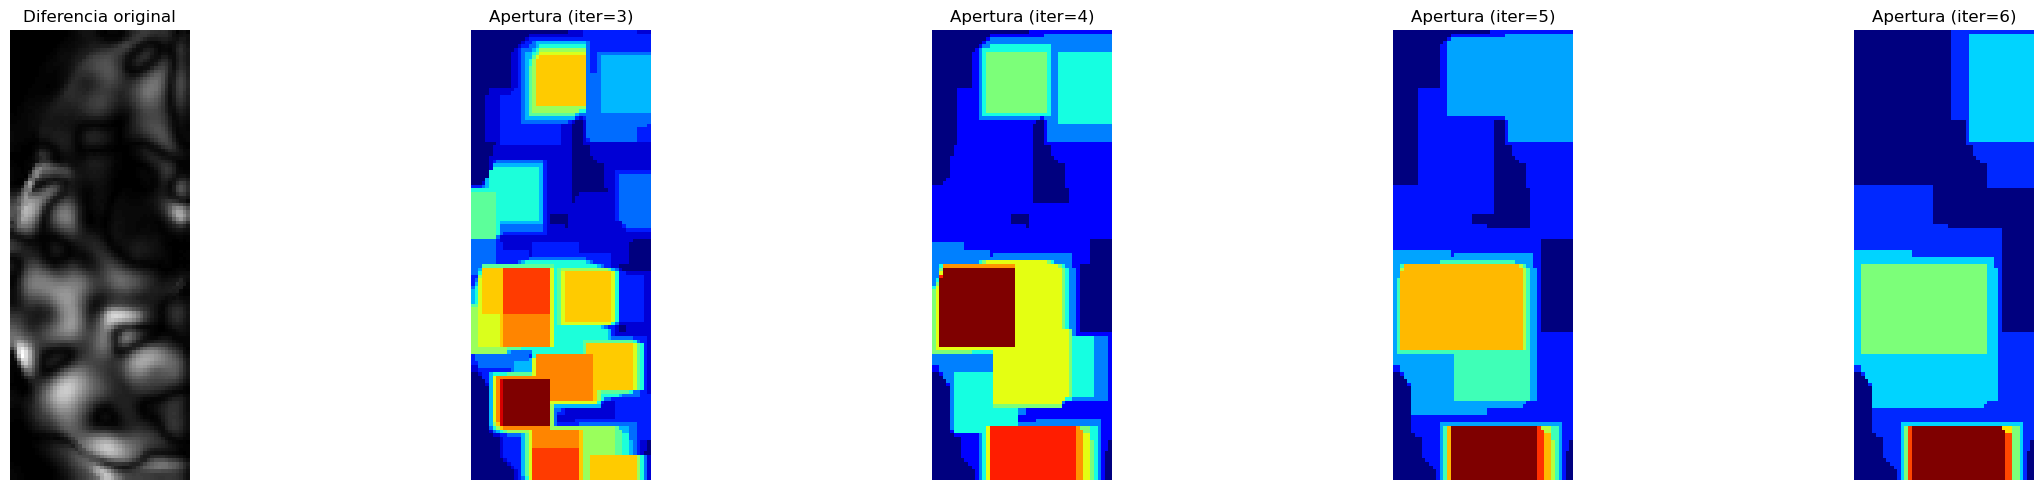

Archivo: N89.jpg


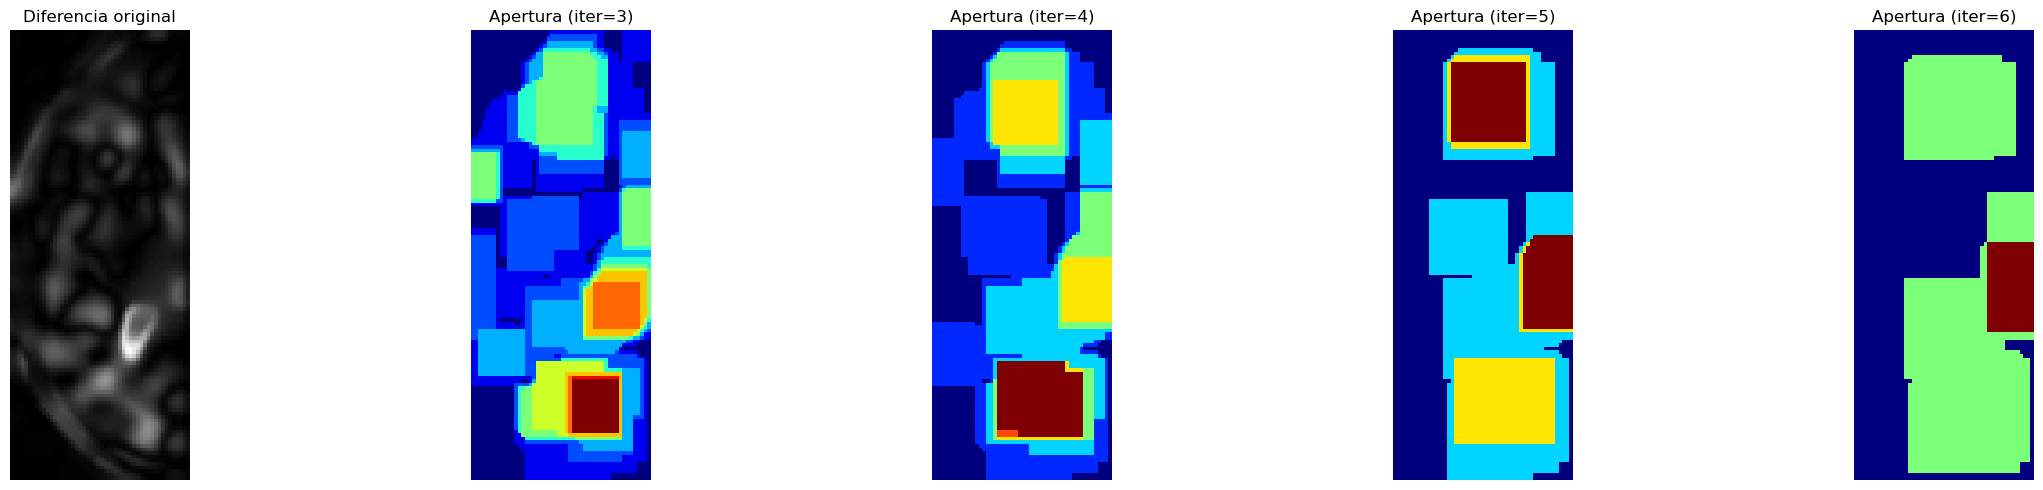

Archivo: N9.jpg


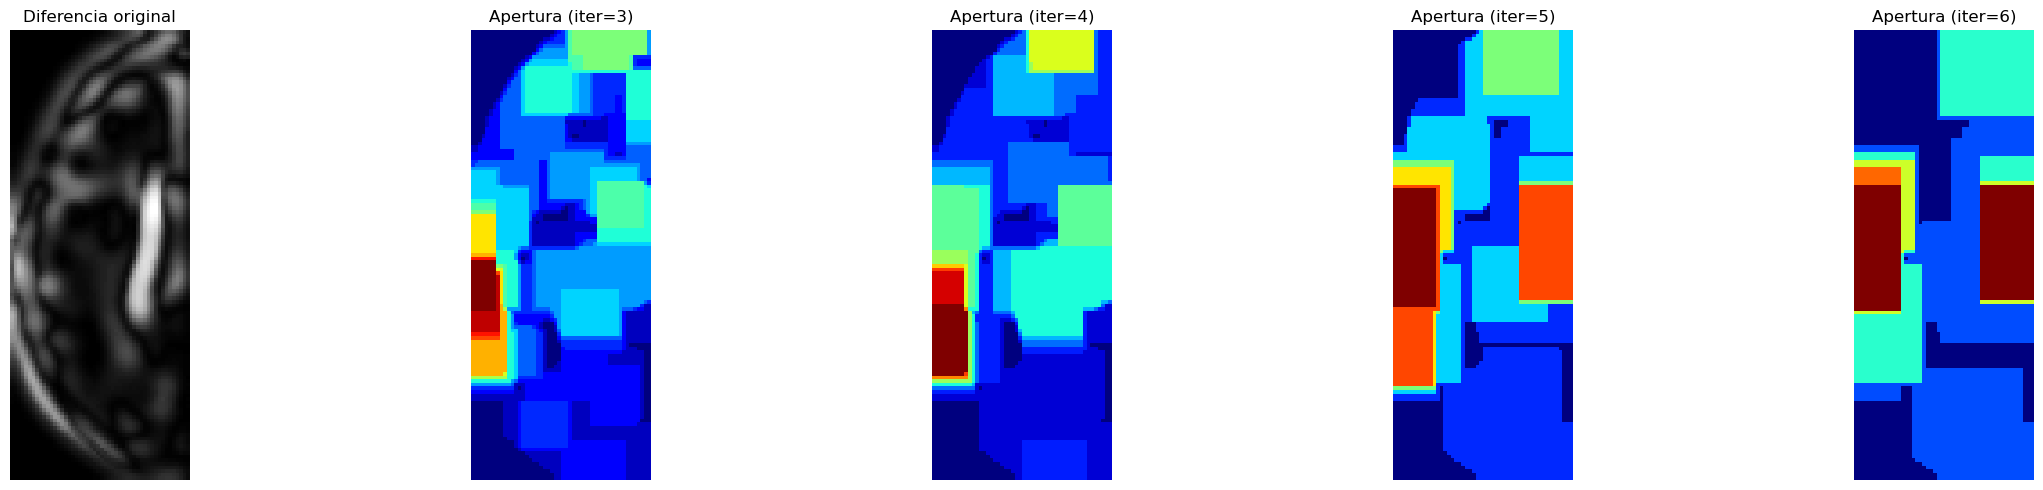

Archivo: N90.jpg


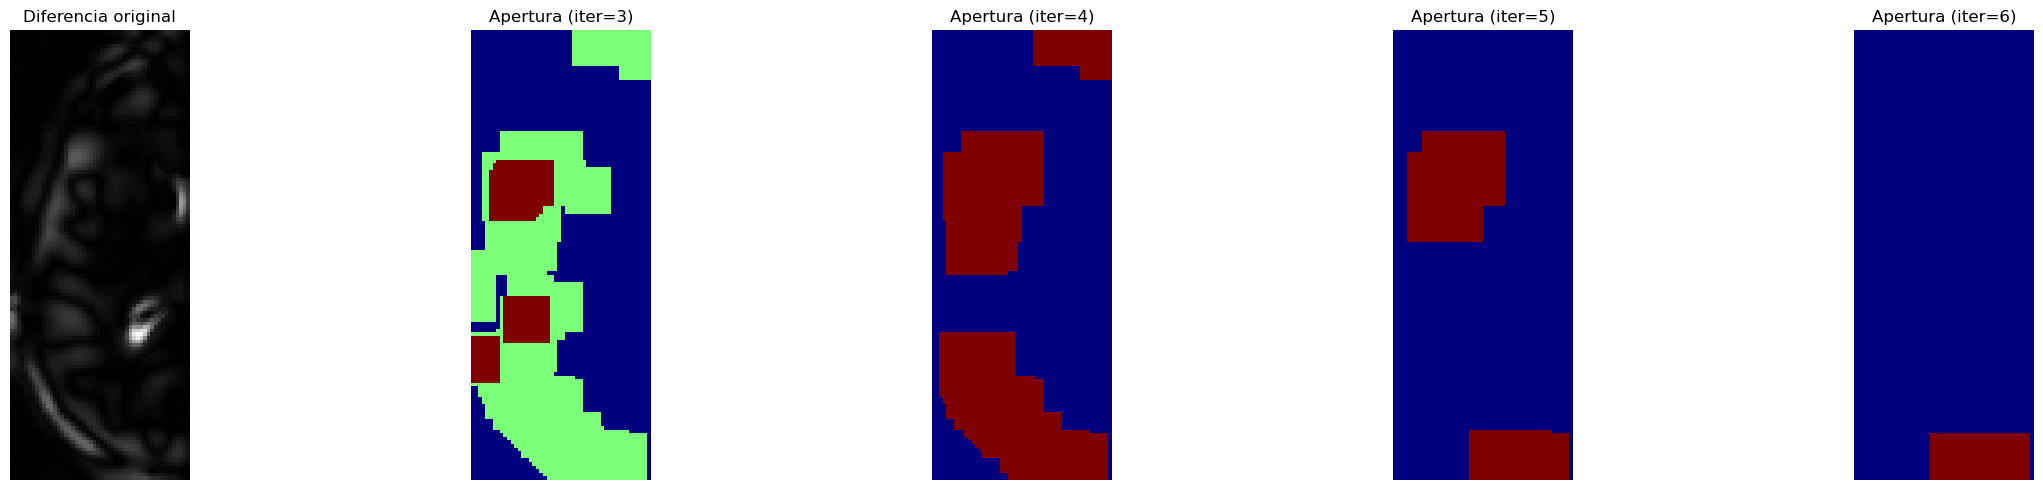

Archivo: N91.jpg


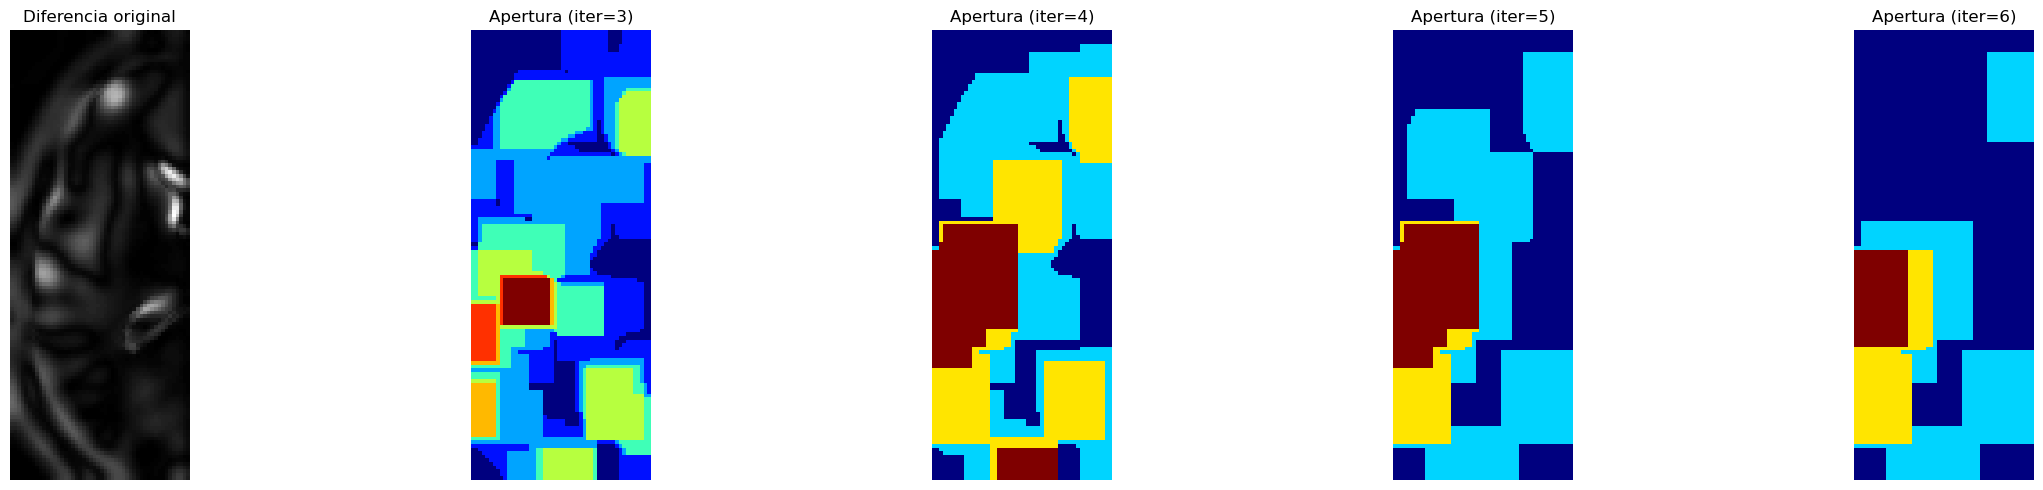

Archivo: N93.jpg


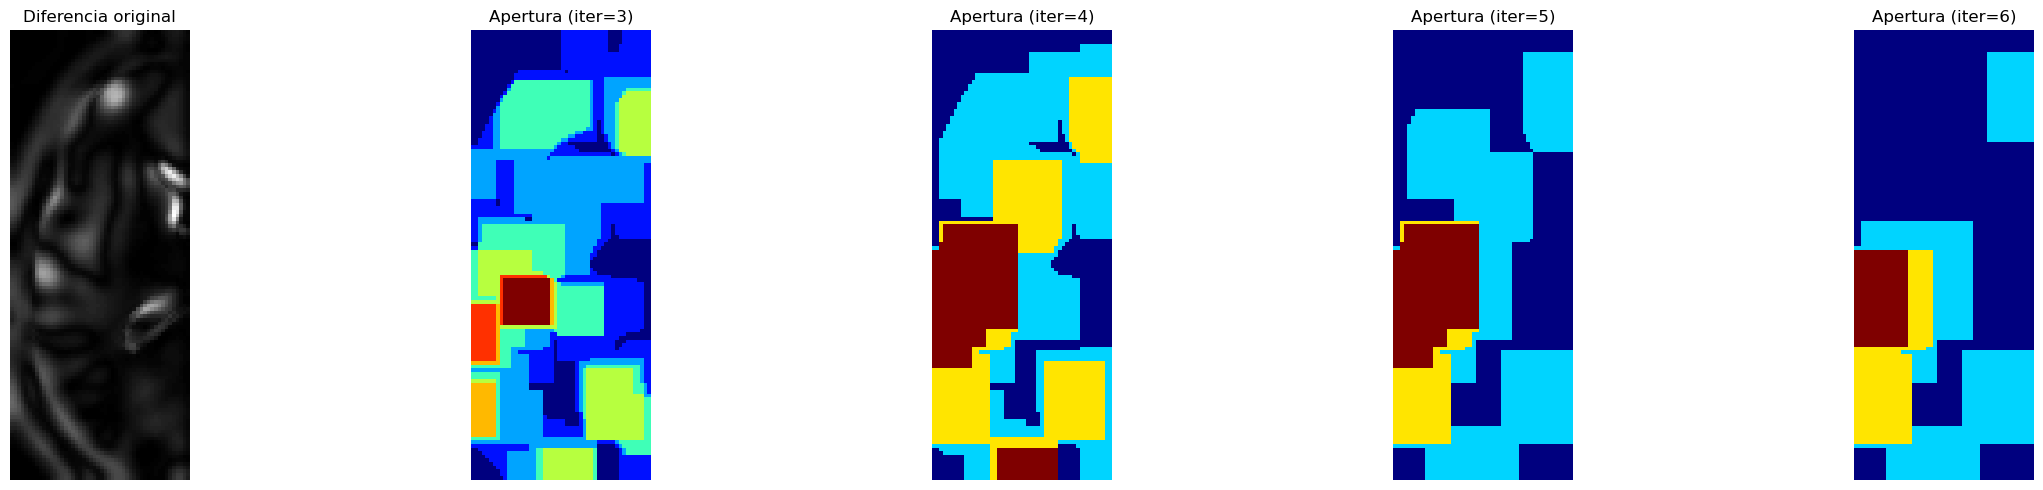

Archivo: N94.jpg


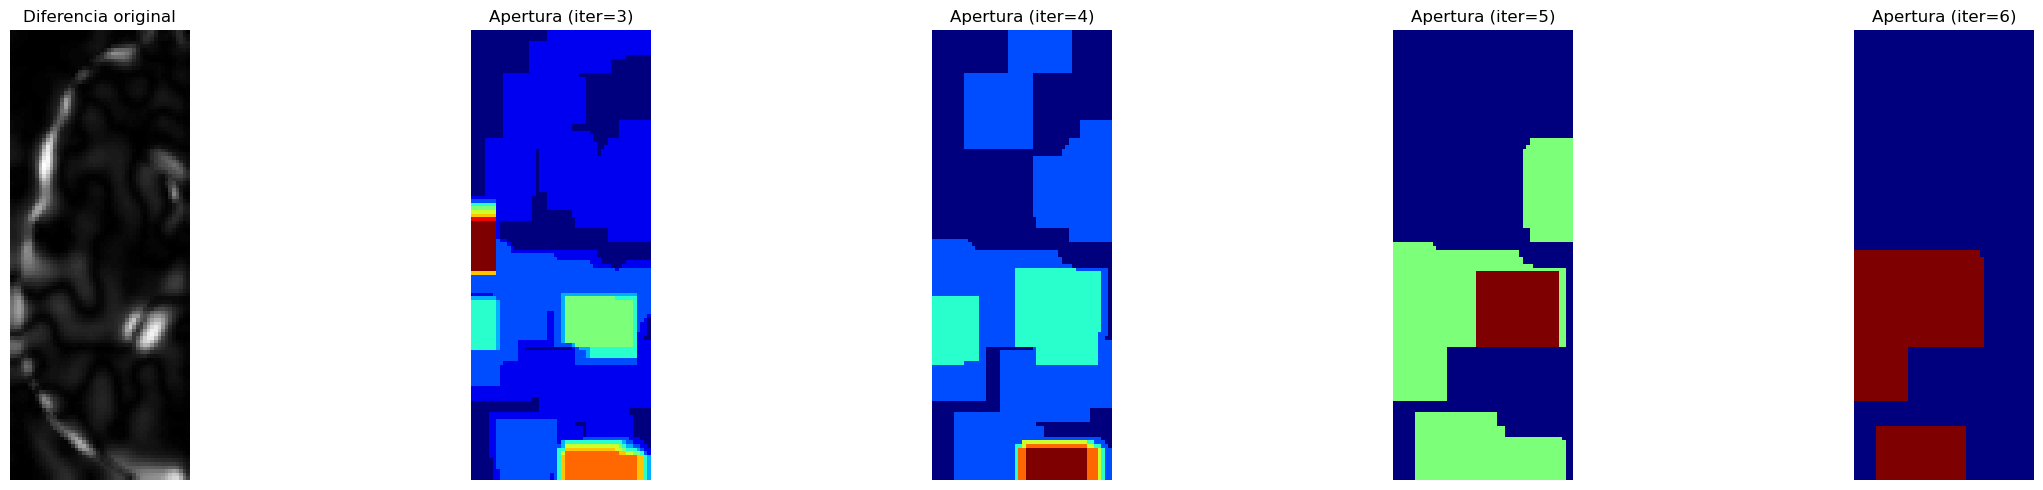

Archivo: N95.jpg


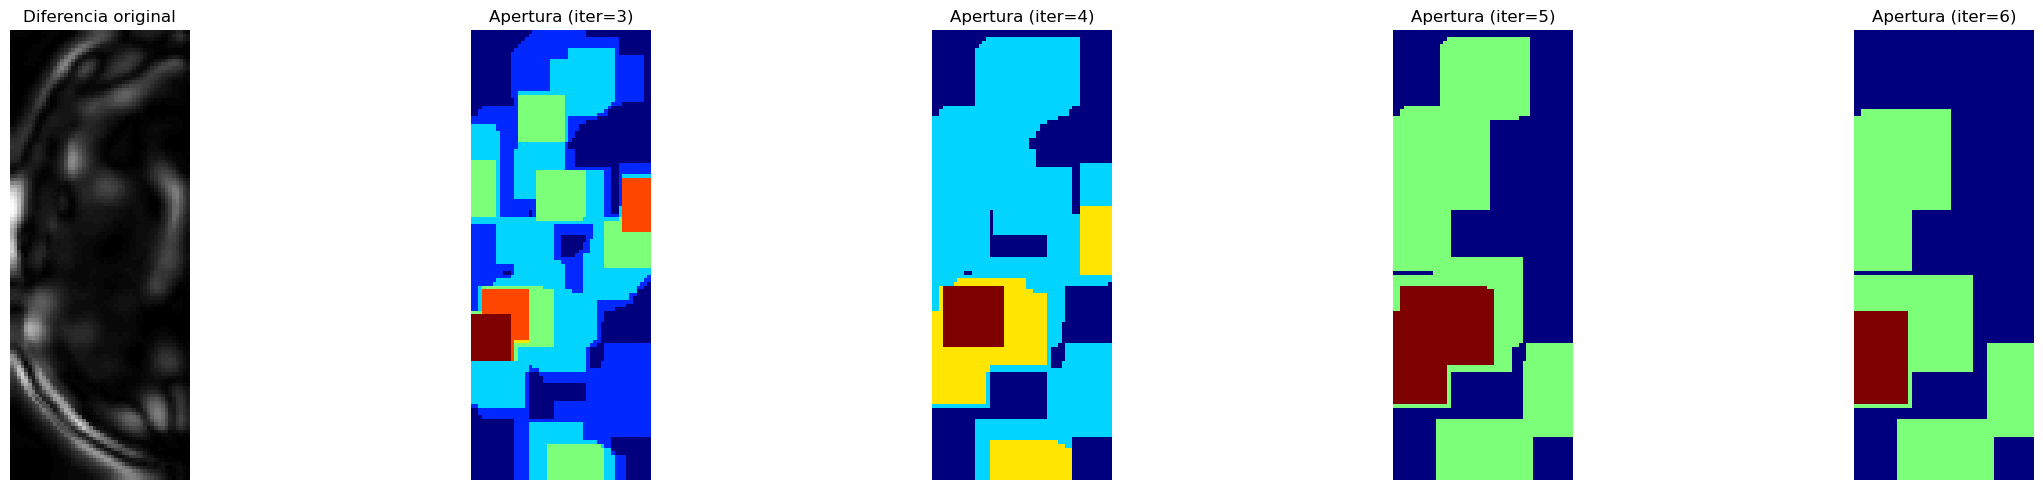

Archivo: N96.jpg


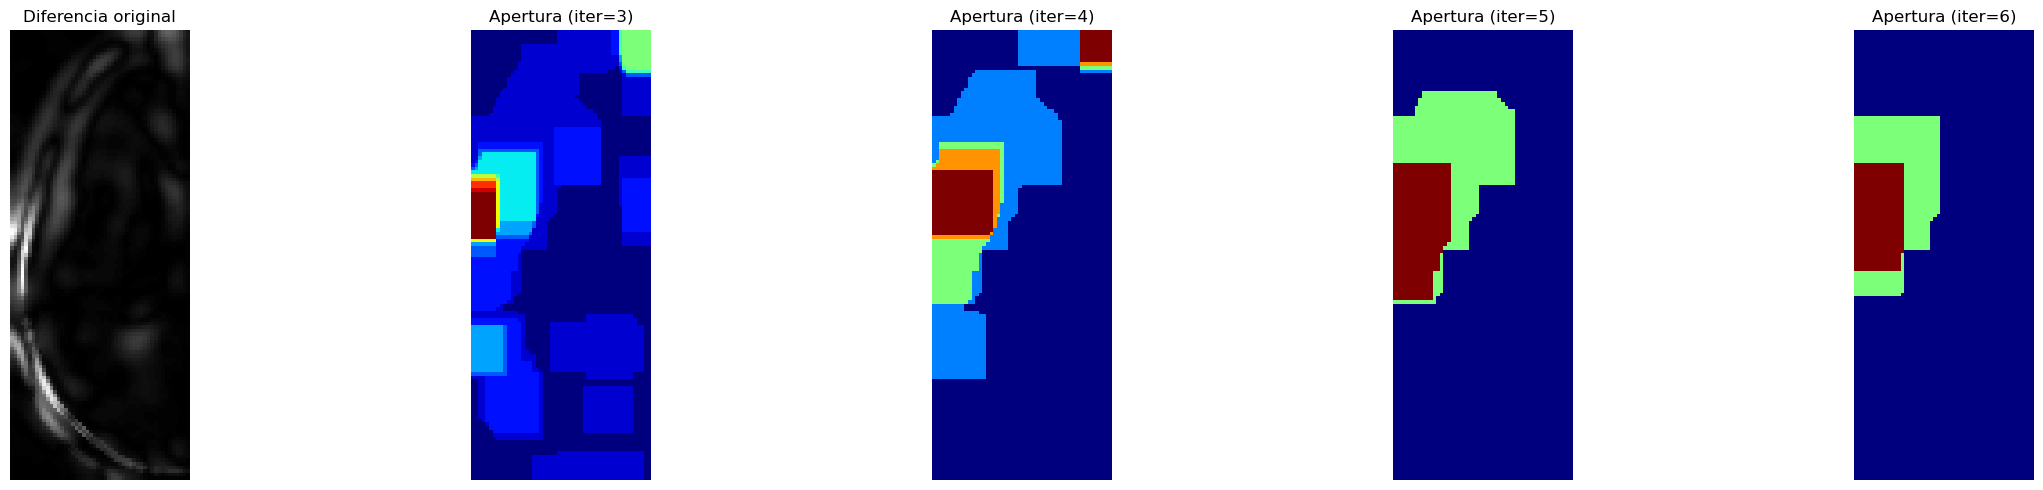

Archivo: N97.jpg


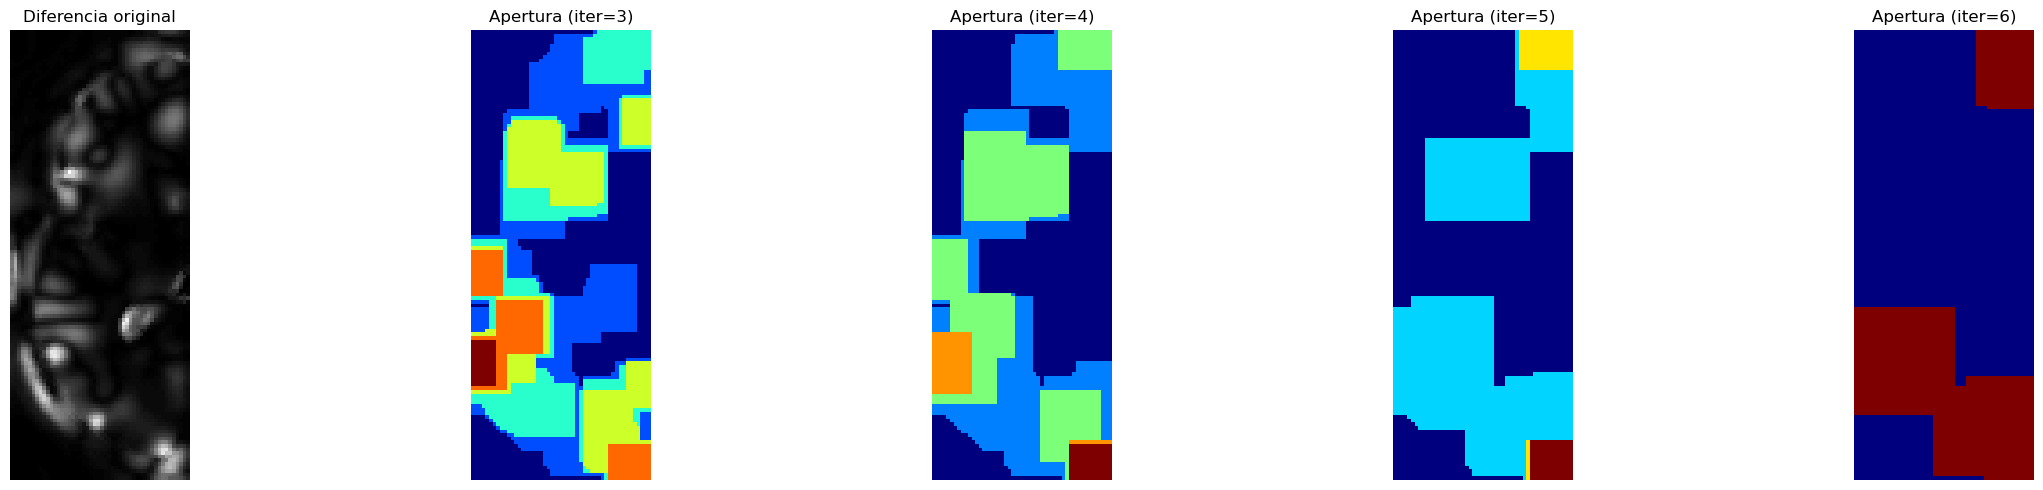

Archivo: N98.jpg


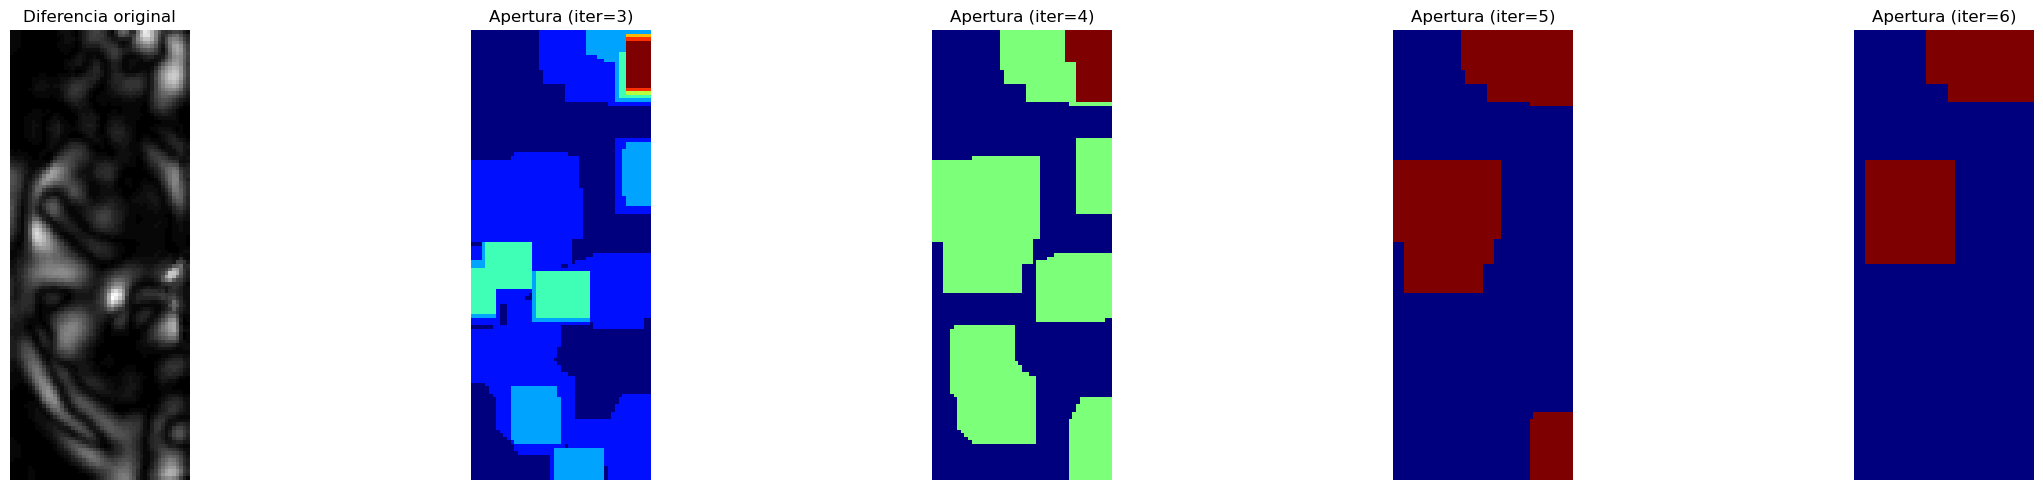

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Ruta de la carpeta con las imágenes
carpeta_imagenes = "../ProyectoFinalTumor/no_nuevo/"

# Ruta de la carpeta donde se guardarán las gráficas
carpeta_graficas = "./carpeta_graficasNo/"

# Crear la carpeta de gráficas si no existe
if not os.path.exists(carpeta_graficas):
    os.makedirs(carpeta_graficas)

# Obtener la lista de archivos en la carpeta
archivos = os.listdir(carpeta_imagenes)

# Iterar sobre los archivos
for archivo in archivos:
    # Comprobar si es un archivo de imagen
    if archivo.endswith(".jpg") or archivo.endswith(".png"):
        # Ruta completa de la imagen
        ruta_imagen = os.path.join(carpeta_imagenes, archivo)
        
        # Imprimir el nombre del archivo
        print("Archivo:", archivo)

        # Cargar la imagen
        imagen = cv2.imread(ruta_imagen, 0)
        imagen = cv2.normalize(imagen, None, 0, 255, cv2.NORM_MINMAX)

        # Eliminación de ruido con filtrado de media
        imagen = cv2.medianBlur(imagen, 5)

        # Mejora de la nitidez utilizando filtrado bilateral
        imagen = cv2.bilateralFilter(imagen, 9, 75, 75)

        # Obtener dimensiones de la imagen
        alto, ancho = imagen.shape

        # Dividir la imagen en mitades
        mitad_izquierda = imagen[:, :ancho // 2]
        mitad_derecha = imagen[:, ancho // 2:]

        # Aplicar efecto espejo vertical a la mitad derecha
        mitad_derecha_espejo = cv2.flip(mitad_derecha, 1)

        # Calcular la diferencia entre las mitades izquierda y derecha
        # diferencia = cv2.subtract(mitad_izquierda, mitad_derecha_espejo)
        diferencia = np.abs(mitad_izquierda.astype(np.int) - mitad_derecha_espejo.astype(np.int))
        
        # Convertir la imagen de diferencia a CV_8U
        diferencia = cv2.convertScaleAbs(diferencia)

        d = 3
        sigmaColor = 200
        sigmaSpace = 1000

        # Aplicar el filtro bilateral
        diferencia = cv2.bilateralFilter(diferencia, d, sigmaColor, sigmaSpace)

        # Aplicar una apertura para resaltar las zonas claras
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
        
        # Valores de apertura a probar
        valores_apertura = [3, 4, 5, 6]

        # Crear un subplot de 1x5
        fig, axs = plt.subplots(1, 5, figsize=(25, 5))

        # Mostrar la diferencia original al inicio del subplot
        axs[0].imshow(diferencia, cmap='gray')
        axs[0].set_title('Diferencia original')
        axs[0].axis('off')

        # Iterar sobre los valores de apertura
        for i, valor_apertura in enumerate(valores_apertura):
            # Aplicar apertura con el valor actual
            apertura = cv2.morphologyEx(diferencia, cv2.MORPH_OPEN, kernel, iterations=valor_apertura)

            # Mostrar la imagen de apertura en el subplot correspondiente
            axs[i+1].imshow(apertura, cmap='jet')
            axs[i+1].set_title(f'Apertura (iter={valor_apertura})')
            axs[i+1].axis('off')

        # Ajustar el espaciado entre subplots
        plt.tight_layout()

        # Guardar la figura en una nueva carpeta
        nombre_grafica = "graf" + archivo
        ruta_grafica = os.path.join(carpeta_graficas, nombre_grafica)
        plt.savefig(ruta_grafica)
        
        # Mostrar la gráfica en pantalla
        plt.show()
